# Multi-Type-TD-TSR Demo Notebook
## 1. Install all the prerequisite


In [1]:
# install dependencies: 
!pip install pyyaml==5.1
!pip install torch==1.7
!pip install torchvision==0.8.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

# install detectron2: (Colab has CUDA 10.1 + torch 1.7)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions

!sudo apt install tesseract-ocr 
!pip install pytesseract

import torch, torchvision
torch.__version__
assert torch.__version__.startswith("1.7")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

     |████████████████████████████████| 276kB 25.1MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44074 sha256=f38d4364565e94d0f6456b9c07438f18c16b1038c2085013c0bd25f476925a65
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 776.8MB 24kB/s 
ERROR: torchvision 0.9.1+cu101 has requirement torch==1.8.1, but you'll have torch 1.7.0 which is incompatible.
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.0 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
     |████████████████████████████████| 12.7MB 10.5MB/s 
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling t

## 2. Clone the Repository 

In [7]:
!git clone https://github.com/Psarpei/Multi-Type-TD-TSR.git
!mv Multi-Type-TD-TSR/ Multi_Type_TD_TSR

Cloning into 'Multi_Type_TD_TSR'...
remote: Enumerating objects: 220, done.
remote: Counting objects: 100% (220/220), done.
remote: Compressing objects: 100% (209/209), done.
remote: Total 220 (delta 125), reused 35 (delta 10), pack-reused 0
Receiving objects: 100% (220/220), 17.02 MiB | 25.01 MiB/s, done.
Resolving deltas: 100% (125/125), done.


## 3. Download Table Detection Weights and Configuration File

In [4]:
!gdown --id 11FgFTy0MyVUMGd00T_InEDaarB4qAlP8
!gdown --id 1WBk6kHHyvyEzoPBsRr2BvFY51zURjd4R
!gdown --id 1PfA2uws919gc893-x9uMIz06zWEko8nF 

Downloading...
From: https://drive.google.com/uc?id=11FgFTy0MyVUMGd00T_InEDaarB4qAlP8
To: /content/model_final.pth
1.10GB [00:12, 85.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WBk6kHHyvyEzoPBsRr2BvFY51zURjd4R
To: /content/All_X152.yaml
100% 534/534 [00:00<00:00, 824kB/s]
Downloading...
From: https://drive.google.com/uc?id=1PfA2uws919gc893-x9uMIz06zWEko8nF
To: /content/Base-RCNN-FPN.yaml
100% 1.36k/1.36k [00:00<00:00, 1.25MB/s]


## 4. Import Everything

In [5]:
import detectron2
import Multi_Type_TD_TSR.google_colab.deskew as deskew
import Multi_Type_TD_TSR.google_colab.table_detection as table_detection
import Multi_Type_TD_TSR.google_colab.table_structure_recognition_all as tsra
import Multi_Type_TD_TSR.google_colab.table_structure_recognition_lines as tsrl
import Multi_Type_TD_TSR.google_colab.table_structure_recognition_wol as tsrwol
import Multi_Type_TD_TSR.google_colab.table_structure_recognition_lines_wol as tsrlwol
import Multi_Type_TD_TSR.google_colab.table_xml as txml
import Multi_Type_TD_TSR.google_colab.table_ocr as tocr
import pandas as pd
import os
import json
import itertools
import random
from detectron2.utils.logger import setup_logger
# import some common libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data import DatasetCatalog, MetadataCatalog
from google.colab.patches import cv2_imshow
setup_logger()

SyntaxError: ignored

## 5. Initialize Table Detection Detector

In [2]:
#create detectron config
cfg = get_cfg()

#set yaml
cfg.merge_from_file('/content/All_X152.yaml')

#set model weights
cfg.MODEL.WEIGHTS = '/content/model_final.pth' # Set path model .pth

predictor = DefaultPredictor(cfg) 

#Table Rotation

ORIGINAL IMAGE:


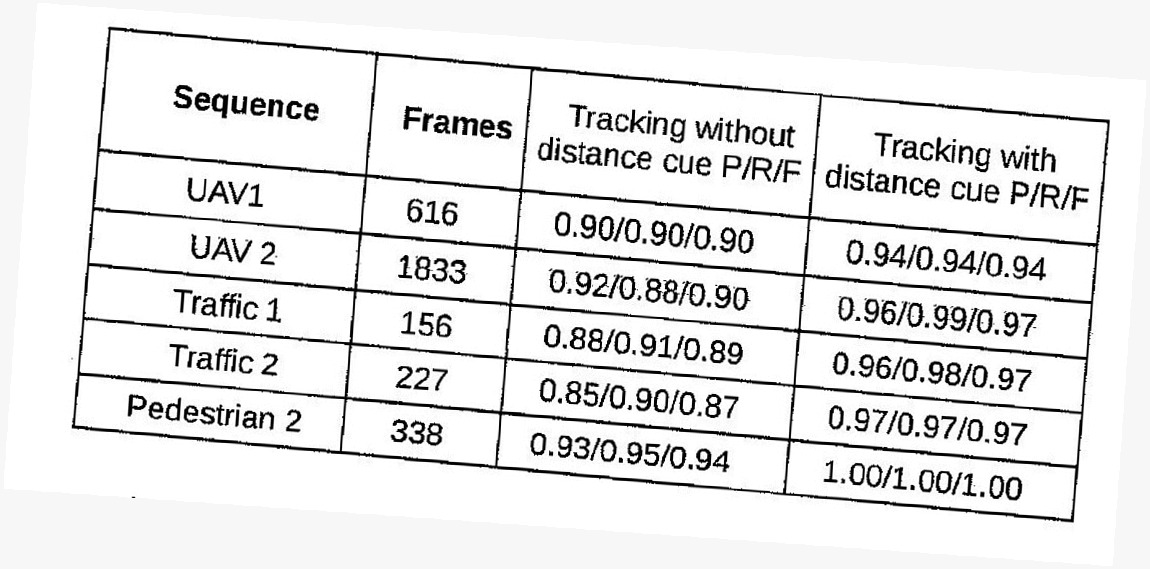


DESKEWED IMAGE:


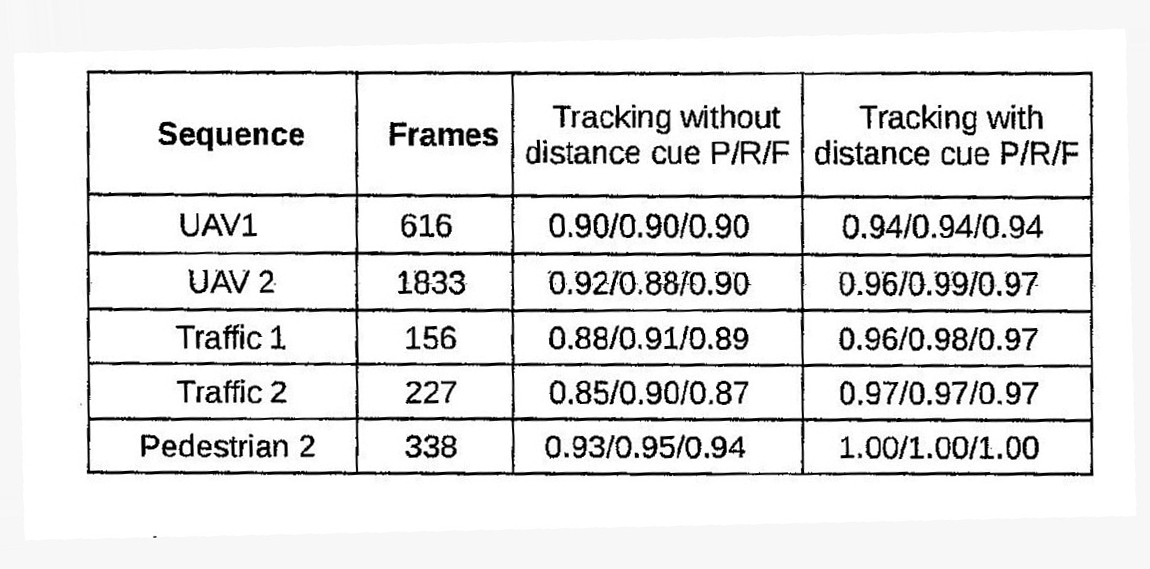

In [ ]:
# path to the image scan of the document
file = "/content/Multi_Type_TD_TSR/images/rotated_example.jpeg" 

# load the image from disk
original_image = cv2.imread(file)
deskewed_image = deskew.deskewImage(original_image)

print("ORIGINAL IMAGE:")
cv2_imshow(original_image)

print()

print("DESKEWED IMAGE:")
cv2_imshow(deskewed_image)

# Table Detection

TABLE DETECTION:


/usr/local/lib/python3.7/dist-packages/detectron2/modeling/roi_heads/fast_rcnn.py:154: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()


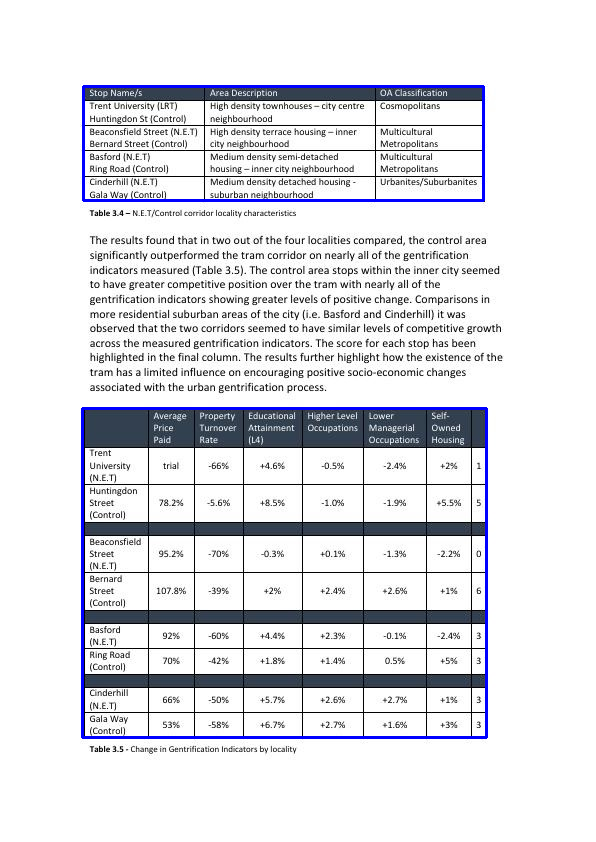

In [ ]:
document_img = cv2.imread("/content/Multi_Type_TD_TSR/images/color_invariance_example.jpg")
table_detection.plot_prediction(document_img, predictor)


TABLE 0 :


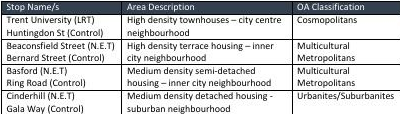


TABLE 1 :


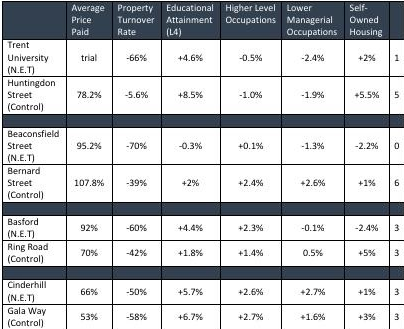

In [ ]:
table_list, table_coords = table_detection.make_prediction(document_img, predictor)

#Table Structure Recognition Partially Bordered Tables
# with Color Invariance Pre-Processing

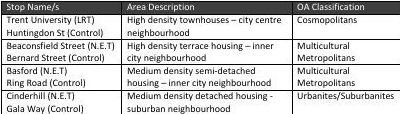

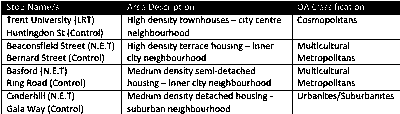

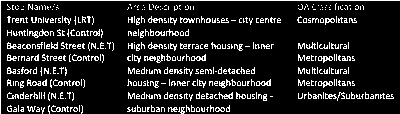

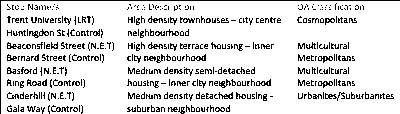

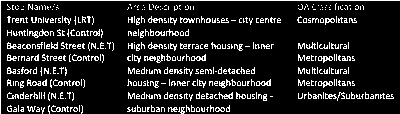

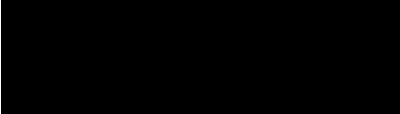

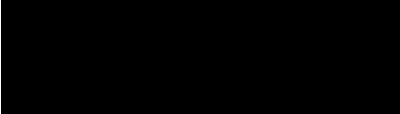

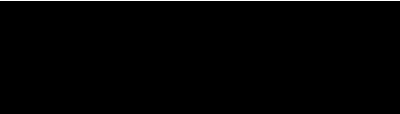

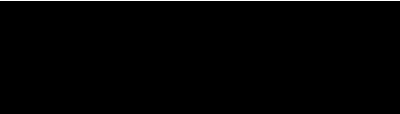

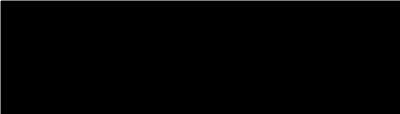

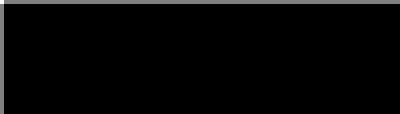

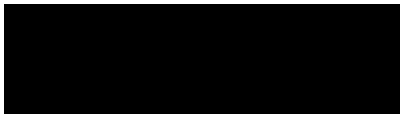

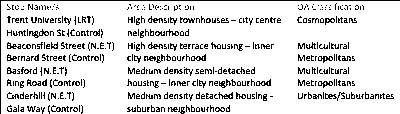

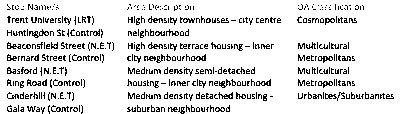

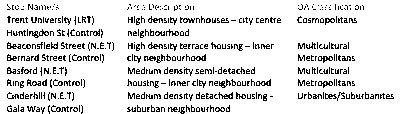

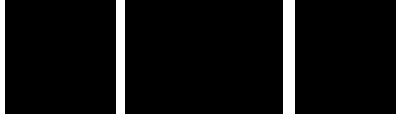

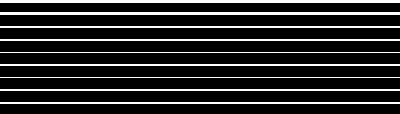

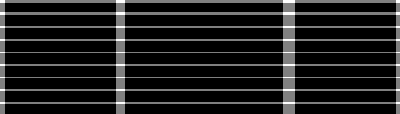

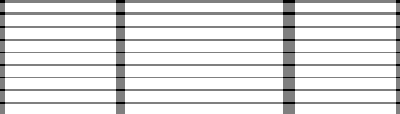

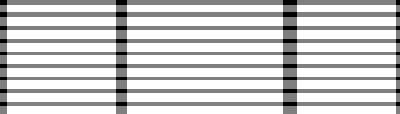

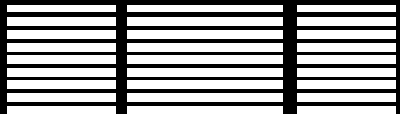

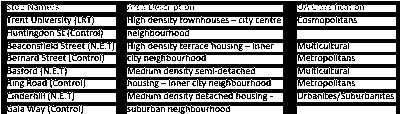

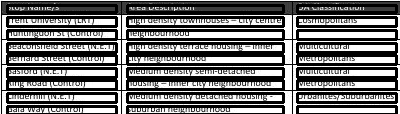

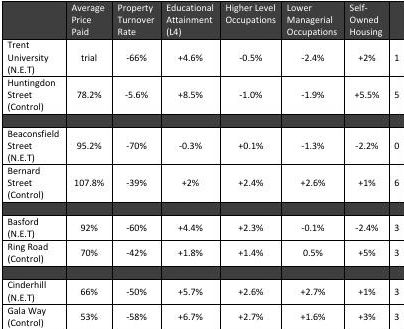

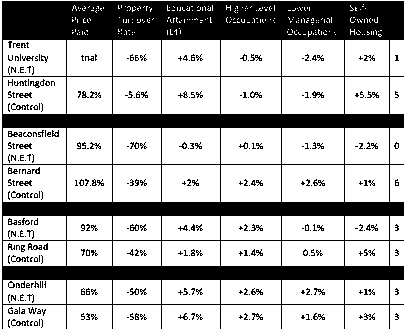

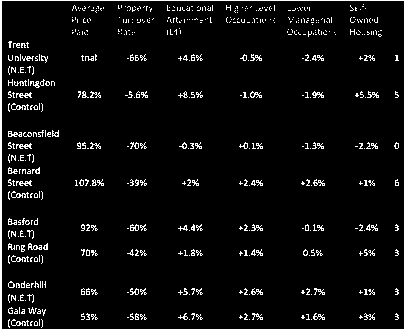

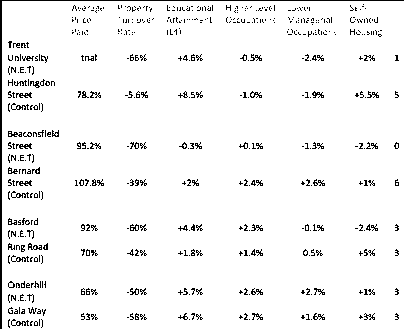

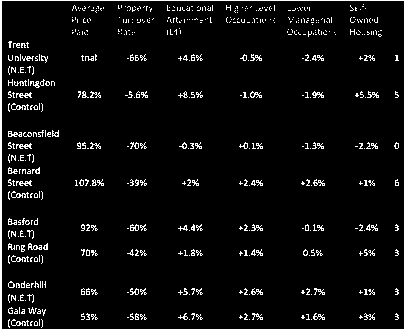

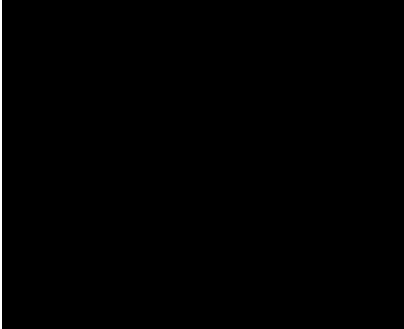

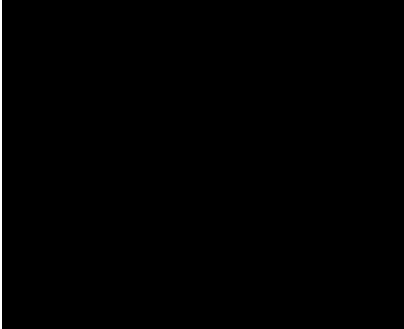

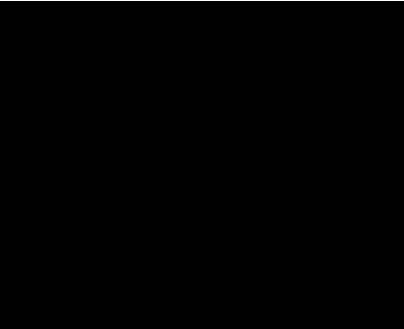

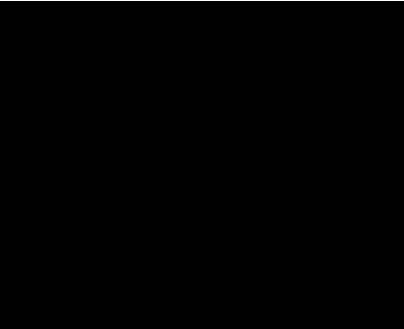

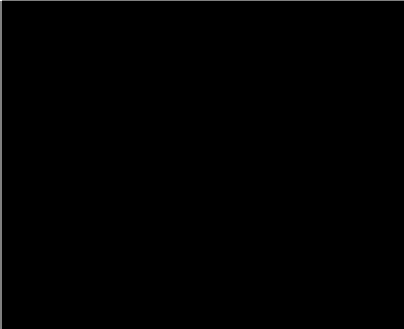

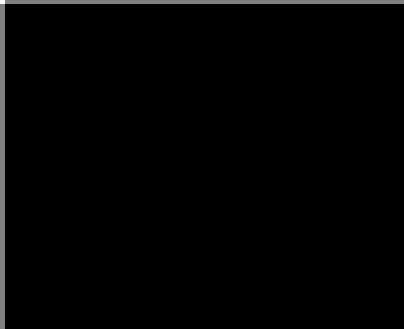

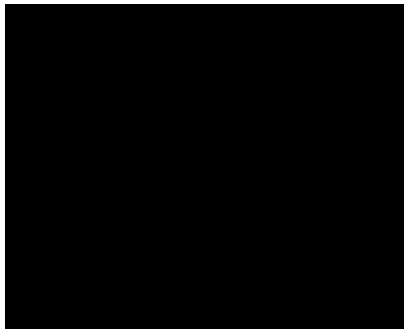

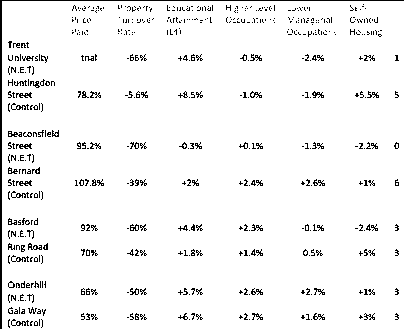

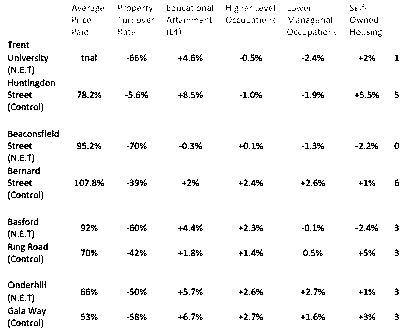

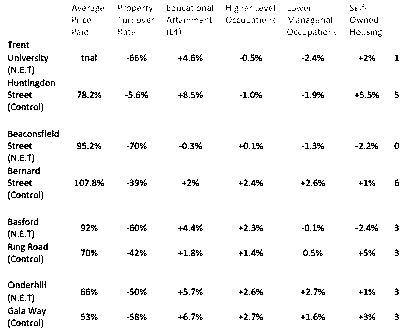

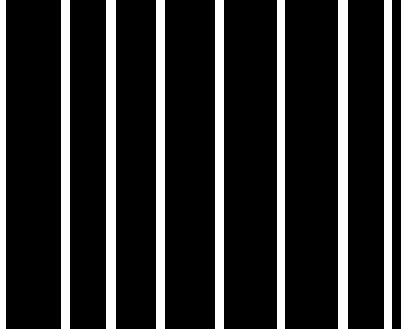

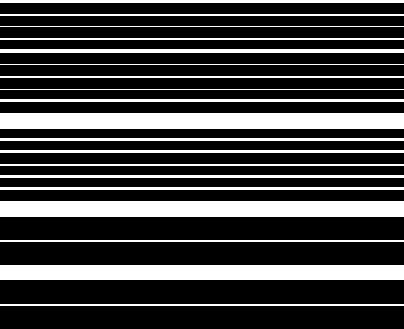

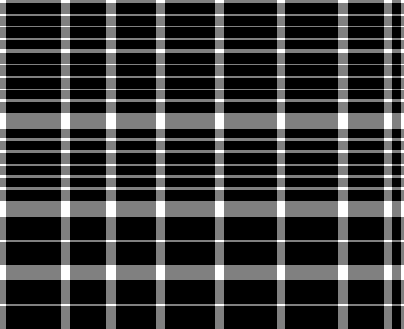

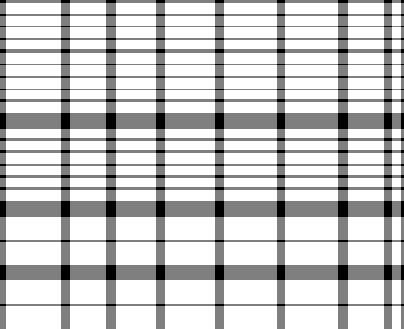

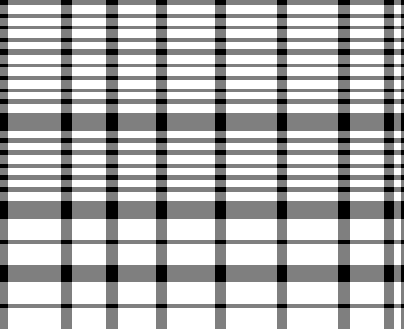

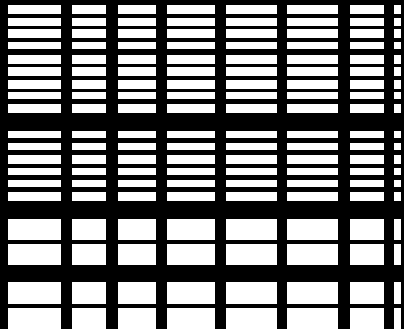

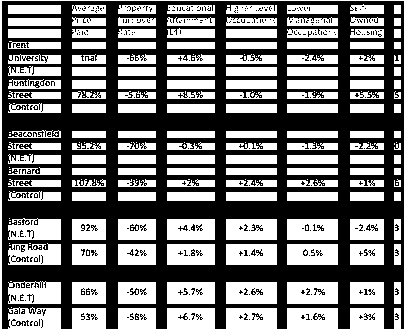

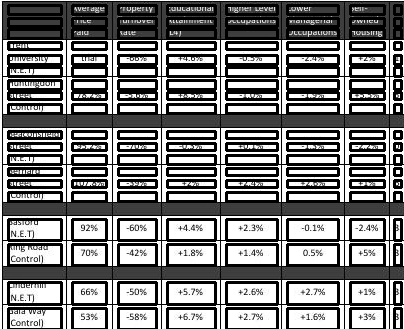

In [ ]:
list_table_boxes = []

for table in table_list:
    finalboxes, output_img = tsra.recognize_structure(table)
    list_table_boxes.append(finalboxes)

# XML Output 

In [ ]:
txml.output_to_xml(table_coords, list_table_boxes)

#Table Structure Recognition Bordered Tables

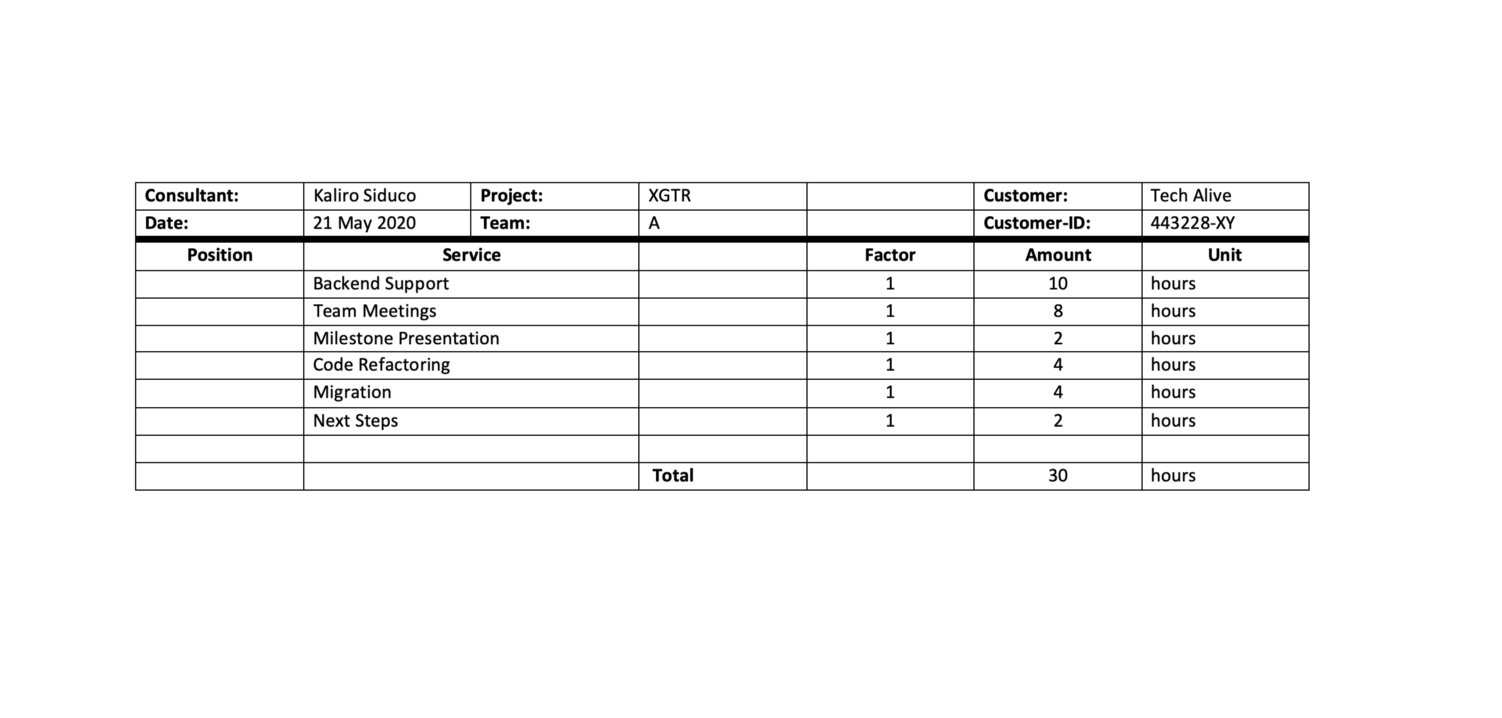

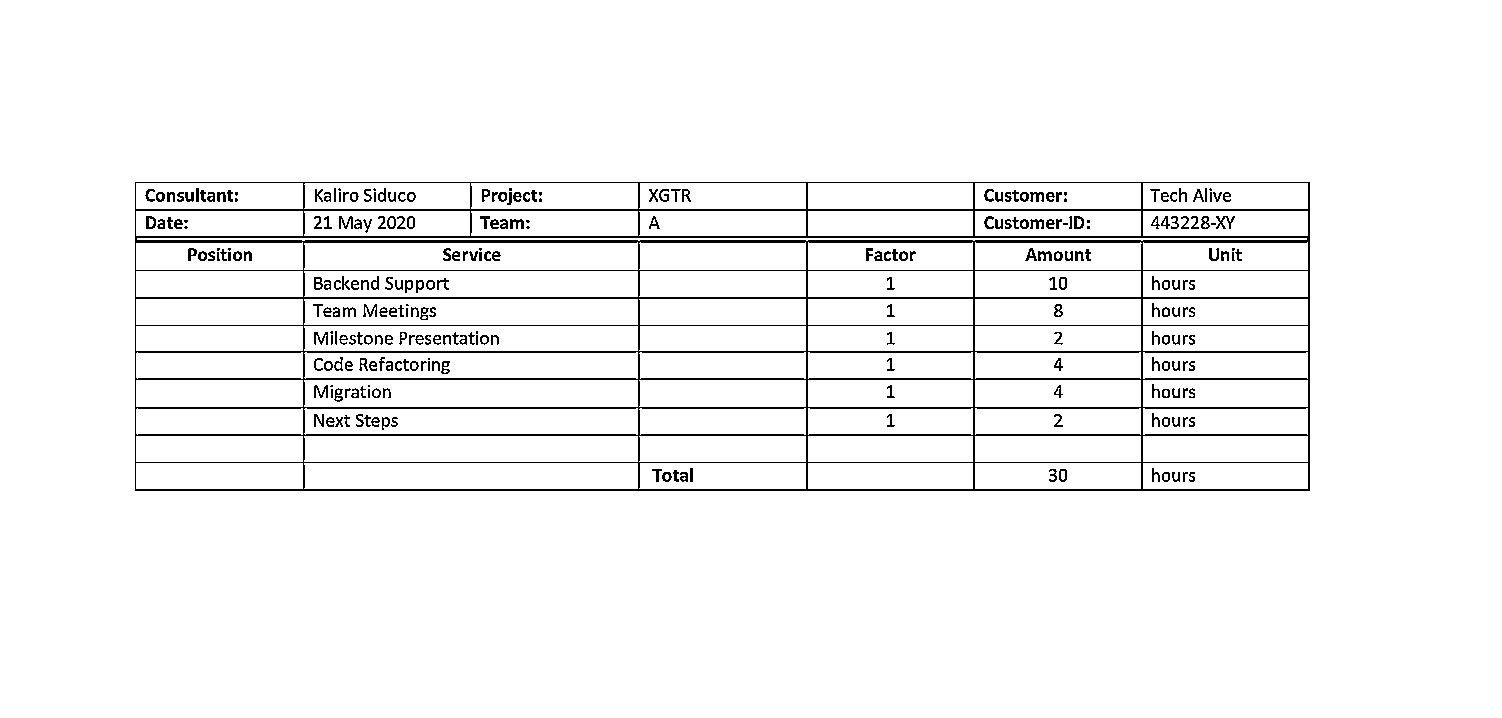

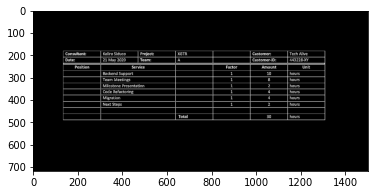

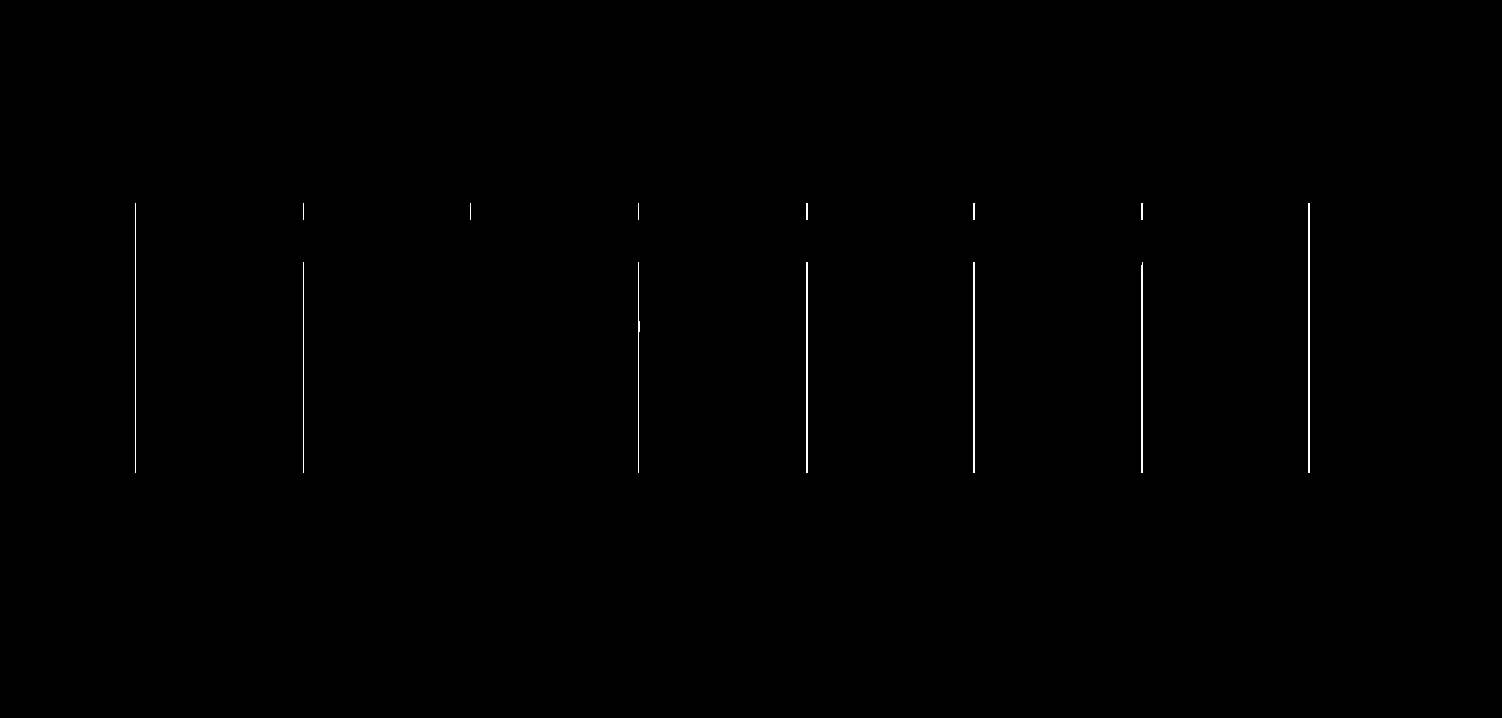

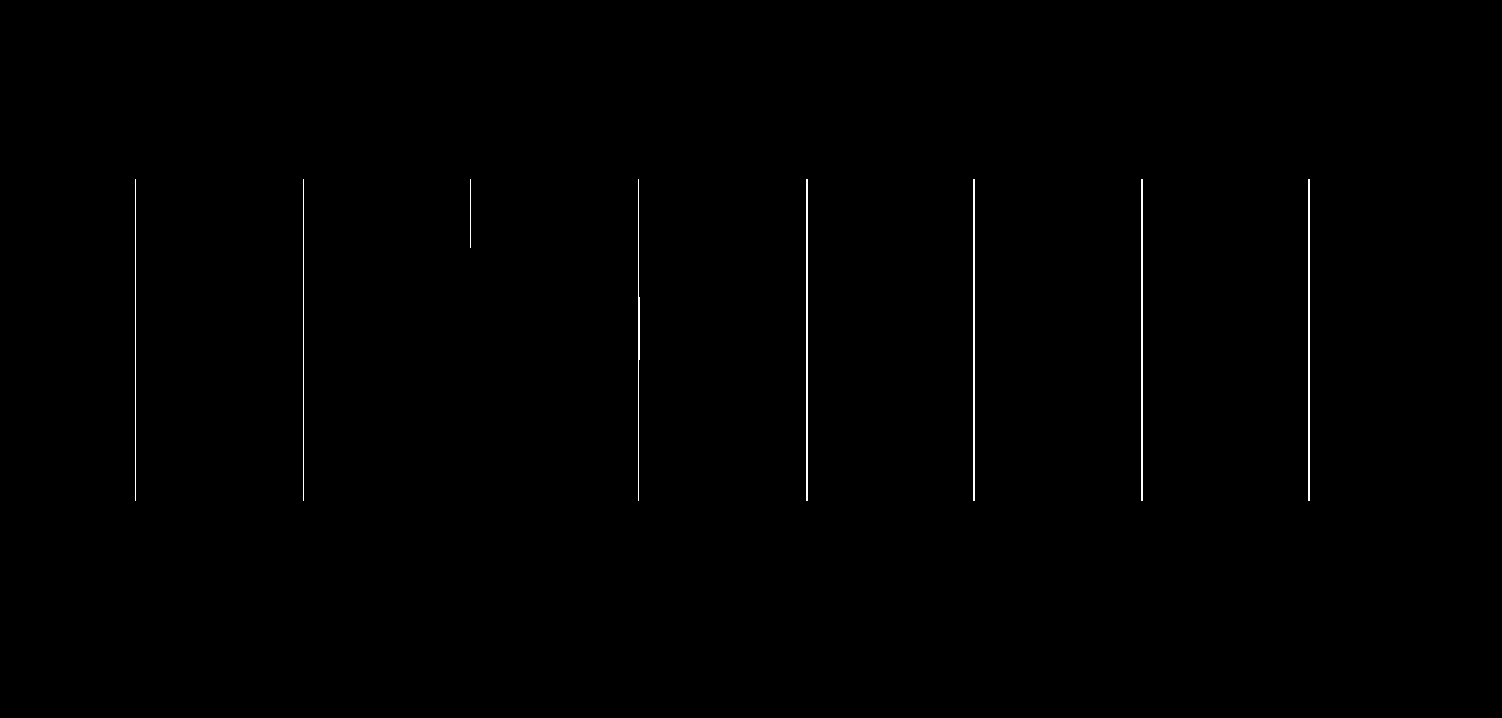

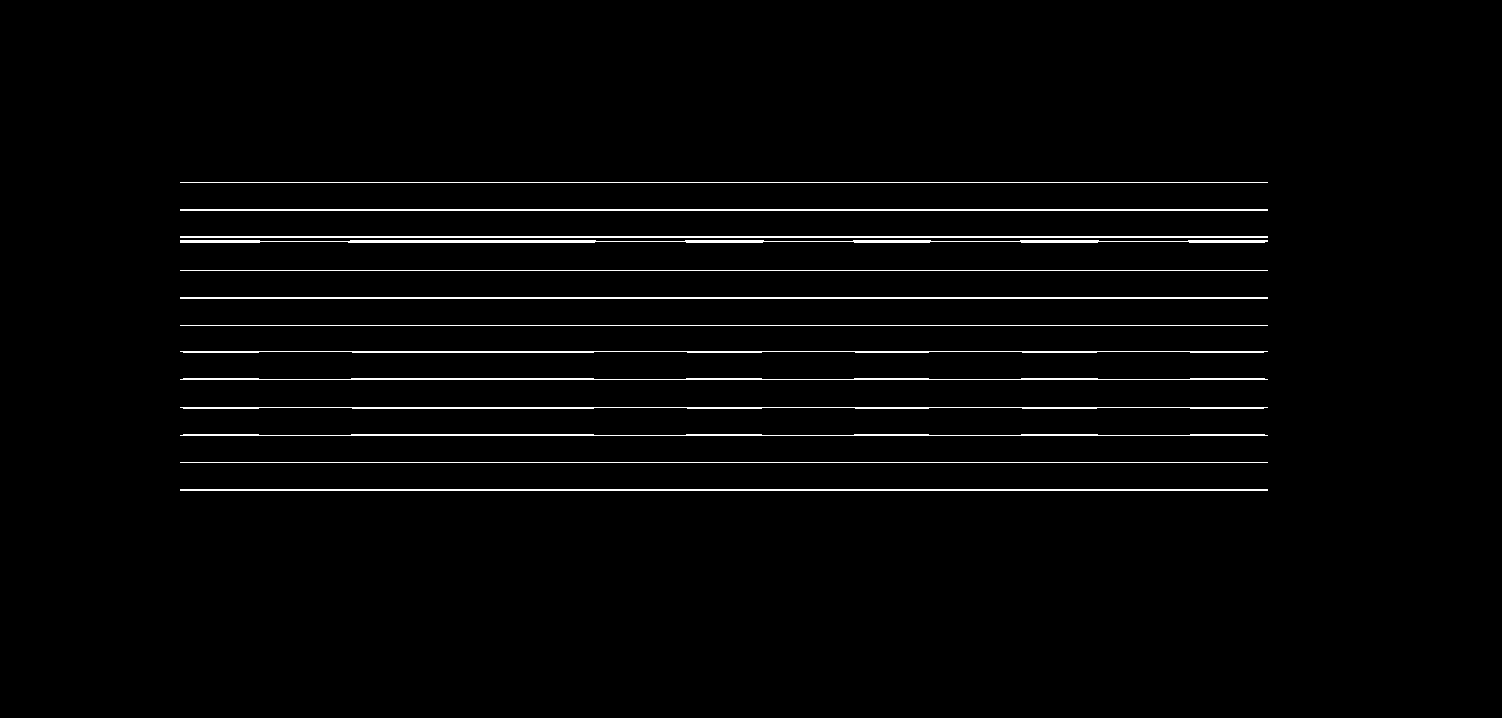

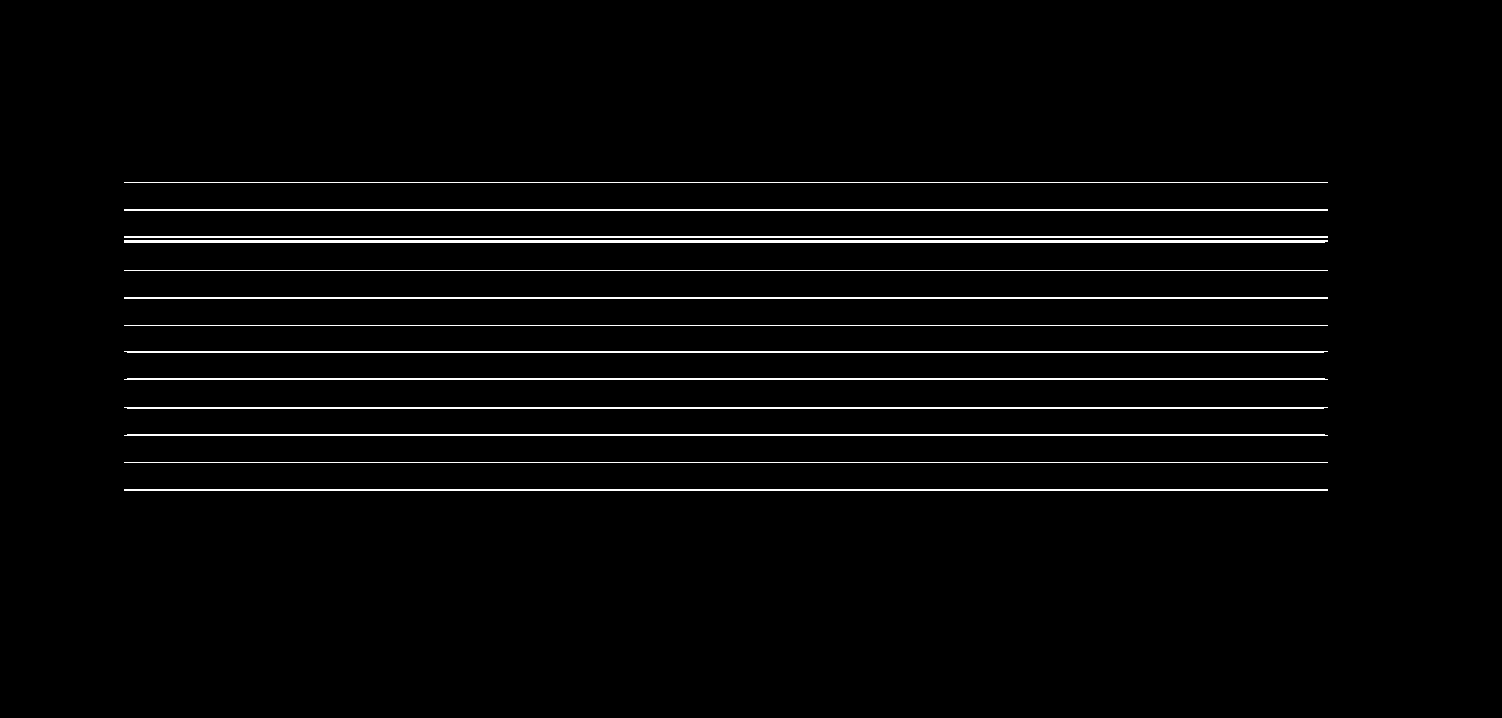

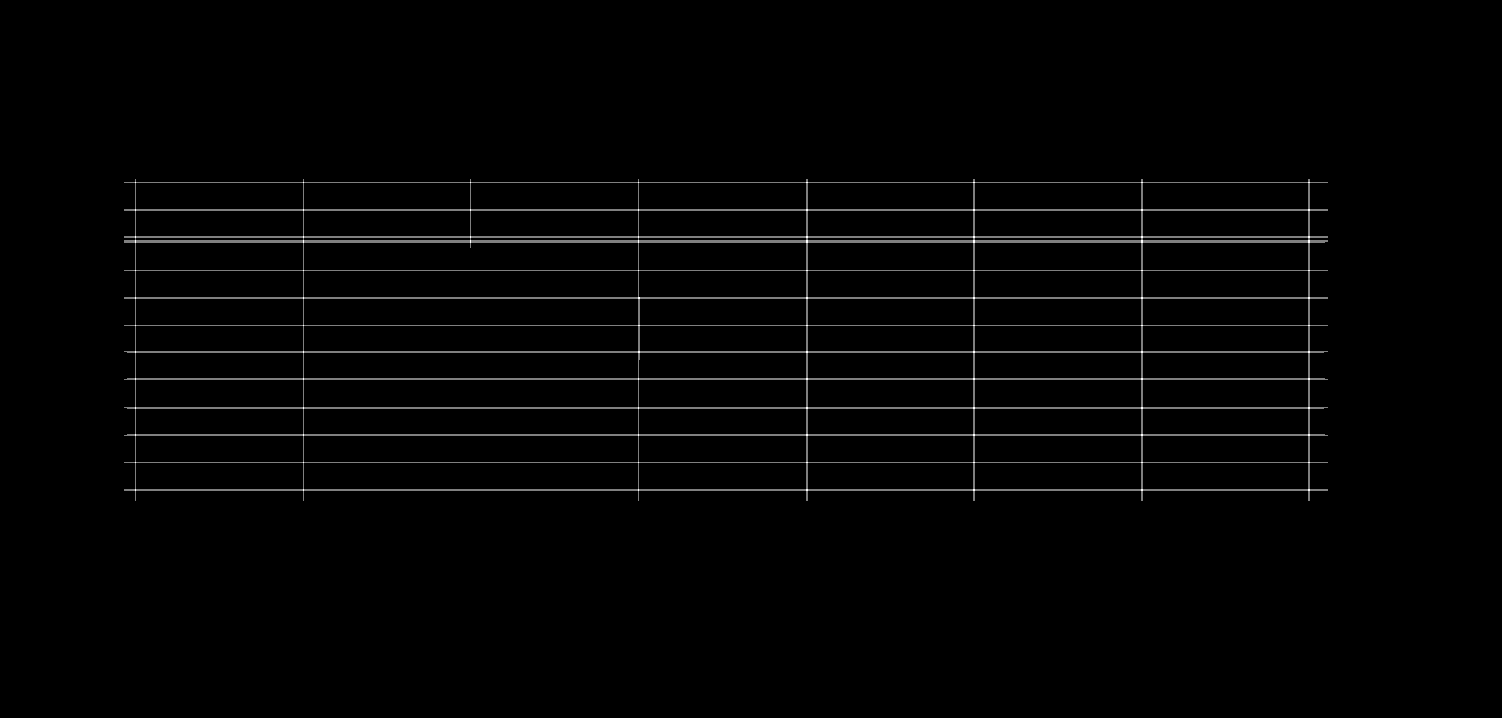

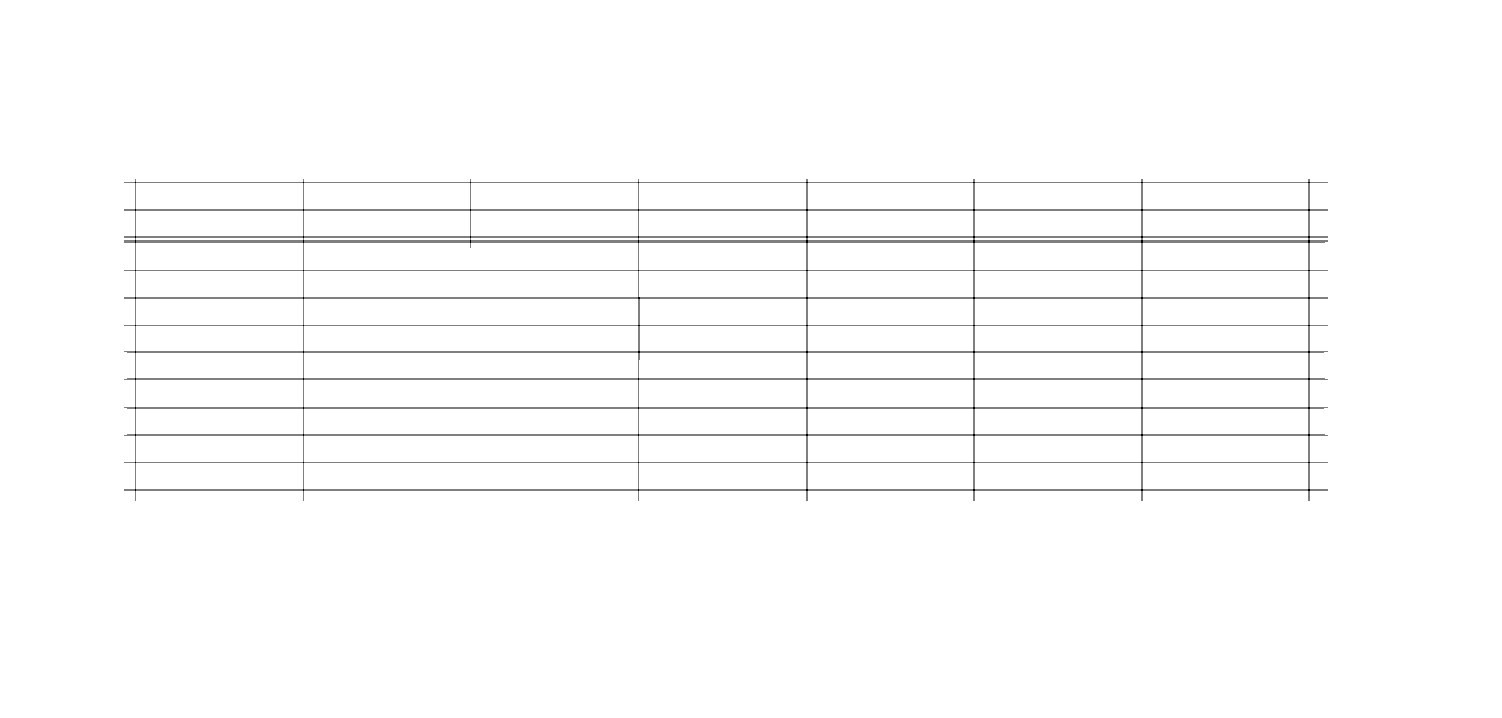

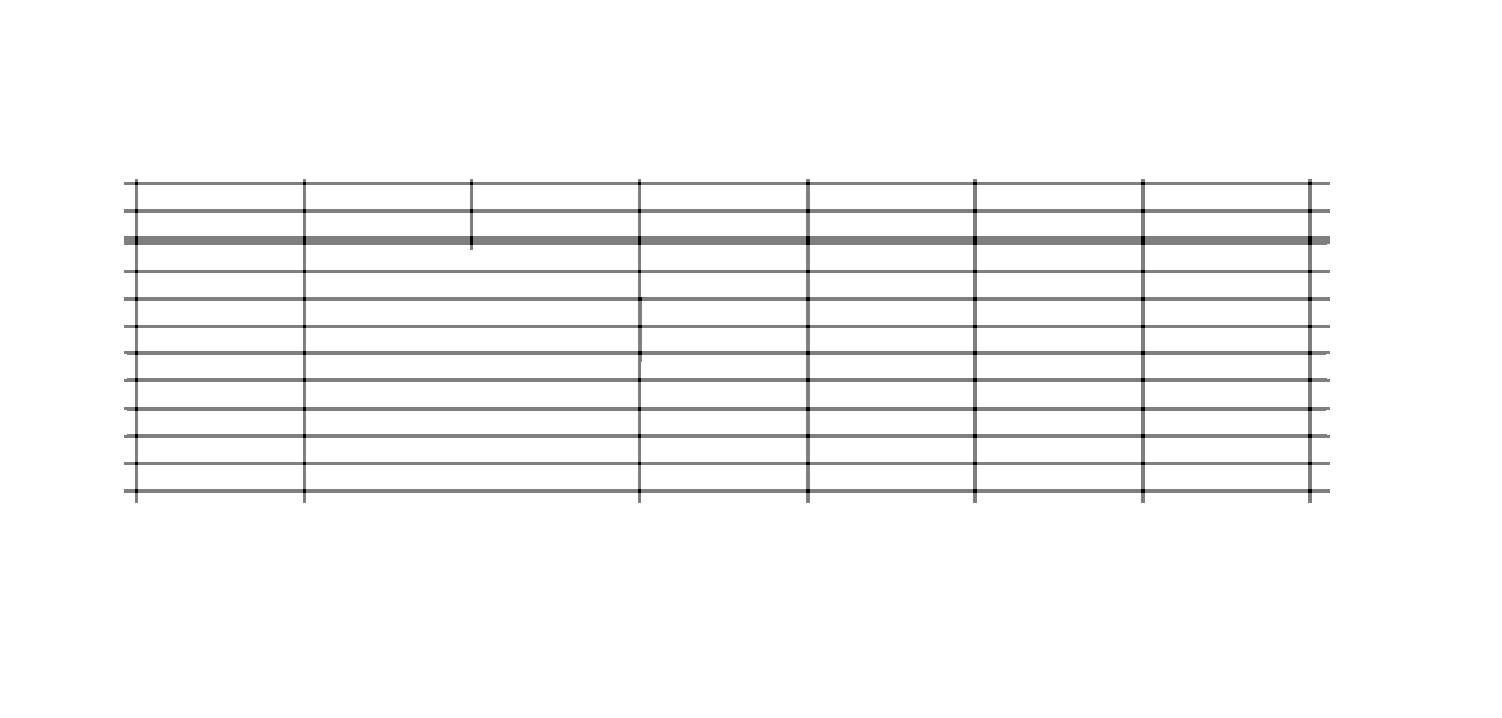

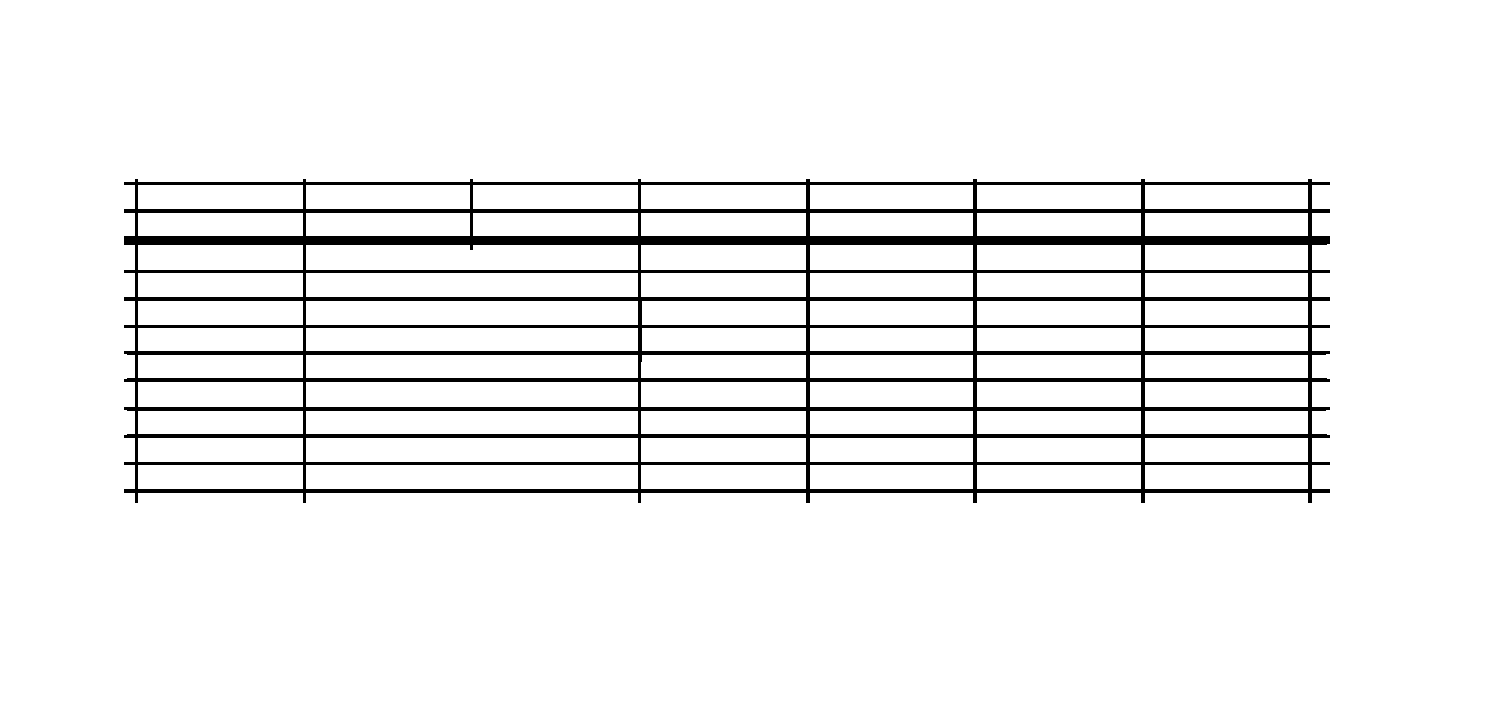

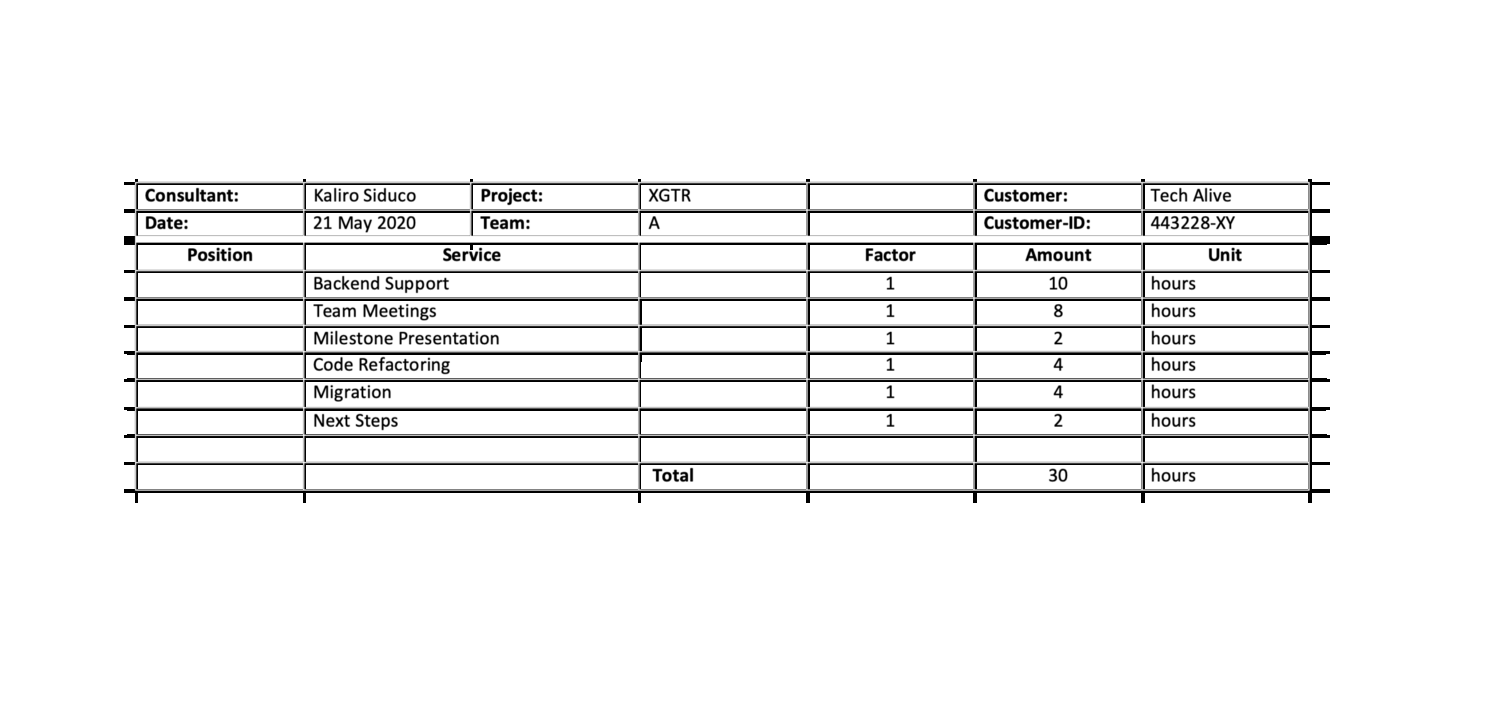

x 0 y 0 w 1502 h 718
x 123 y 178 w 1208 h 326
x 1145 y 185 w 163 h 24
x 977 y 185 w 164 h 24
x 810 y 185 w 163 h 24
x 641 y 185 w 165 h 24
x 473 y 185 w 165 h 24
x 306 y 185 w 164 h 24
x 138 y 185 w 165 h 24
x 1145 y 213 w 163 h 23
x 977 y 213 w 164 h 23
x 810 y 213 w 163 h 23
x 641 y 213 w 165 h 23
x 473 y 213 w 165 h 23
x 306 y 213 w 164 h 23
x 138 y 213 w 165 h 23
x 1145 y 245 w 163 h 25
x 977 y 245 w 164 h 25
x 810 y 245 w 163 h 25
x 641 y 245 w 165 h 25
x 306 y 245 w 332 h 25
x 138 y 245 w 165 h 25
x 1145 y 273 w 163 h 24
x 977 y 273 w 164 h 24
x 810 y 273 w 163 h 24
x 641 y 273 w 165 h 24
x 306 y 273 w 332 h 24
x 138 y 273 w 165 h 24
x 1145 y 301 w 163 h 24
x 977 y 301 w 164 h 24
x 810 y 301 w 163 h 24
x 642 y 301 w 164 h 24
x 306 y 301 w 332 h 24
x 138 y 301 w 165 h 24
x 1145 y 328 w 163 h 23
x 977 y 328 w 164 h 23
x 810 y 328 w 163 h 23
x 642 y 328 w 164 h 23
x 306 y 328 w 332 h 23
x 138 y 328 w 165 h 23
x 1145 y 355 w 163 h 23
x 977 y 355 w 164 h 23
x 810 y 355 w 163 h 23
x 64

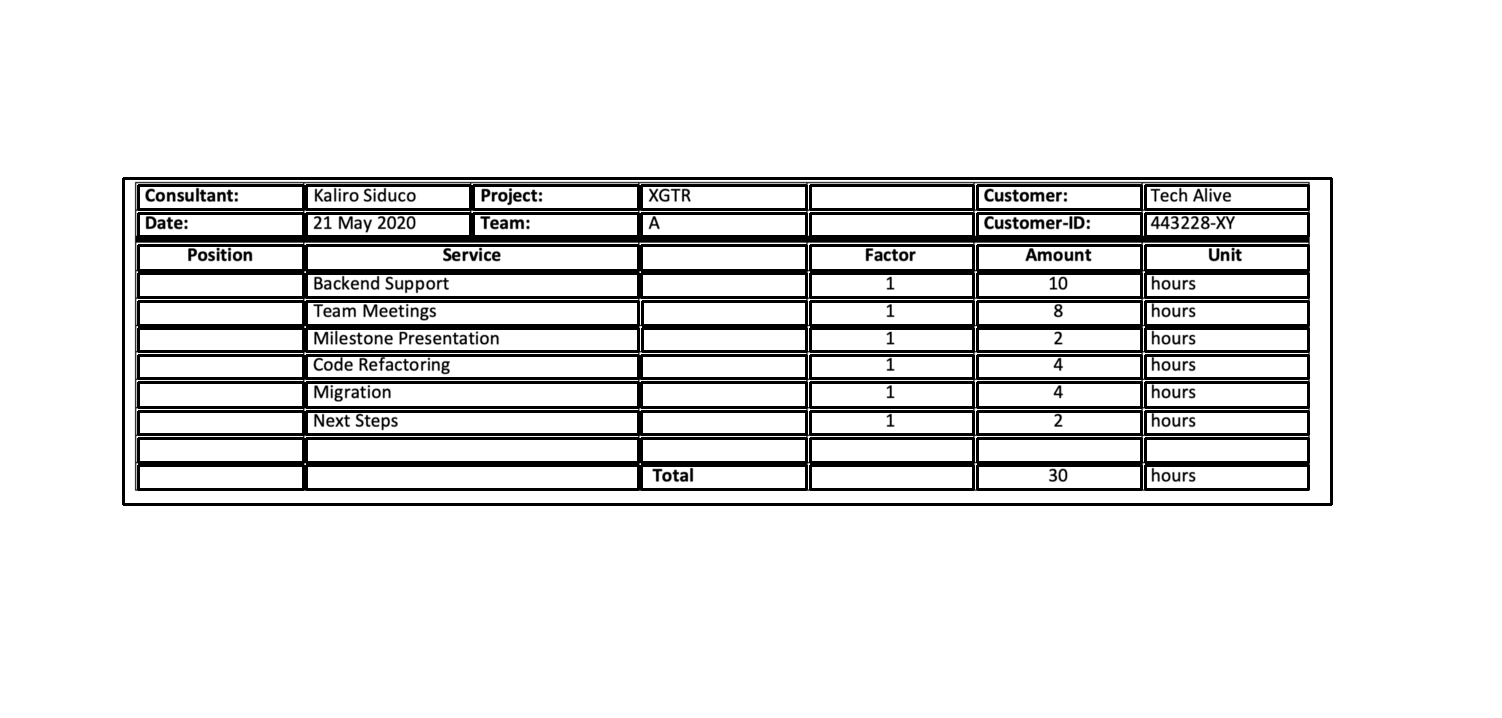

len 8
len 7
len 6
len 6
len 6
len 6
len 6
len 6
len 6
len 6
len 6


In [2]:
bordered_table = cv2.imread("/content/Multi_Type_TD_TSR/images/bordered_example.png")
list_table_boxes = []

table_list = [bordered_table]

for table in table_list:
    finalboxes, output_img = tsrl.recognize_structure(table)
    list_table_boxes.append(finalboxes)

# Table Structure Recognition Unbordered Tables

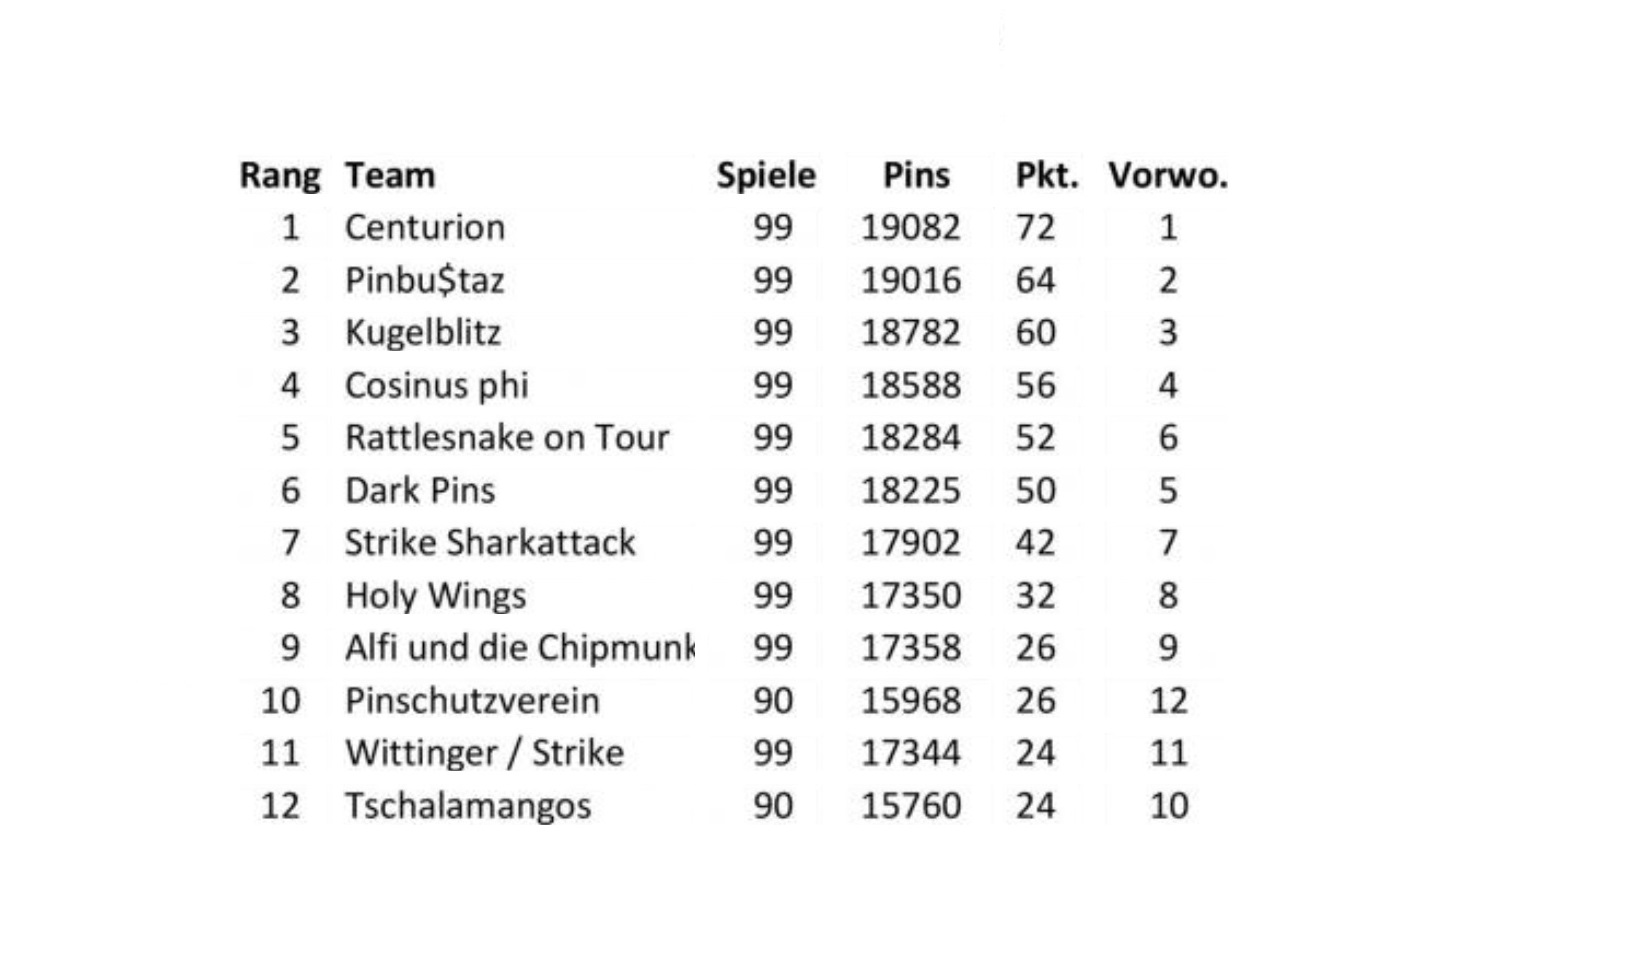

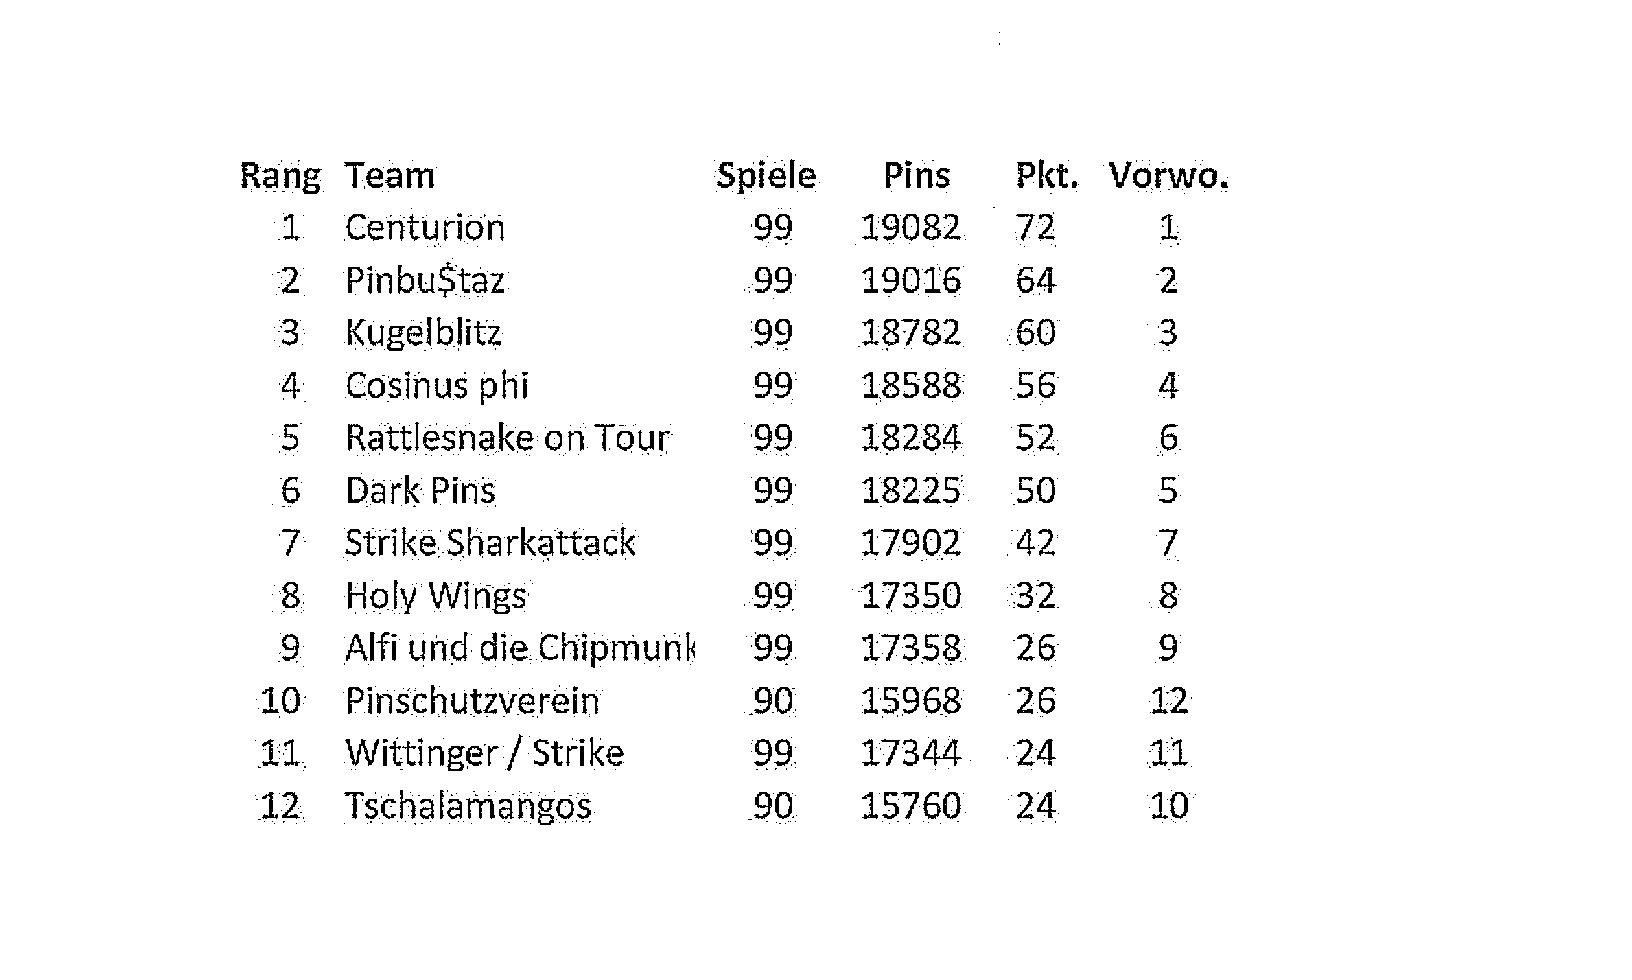

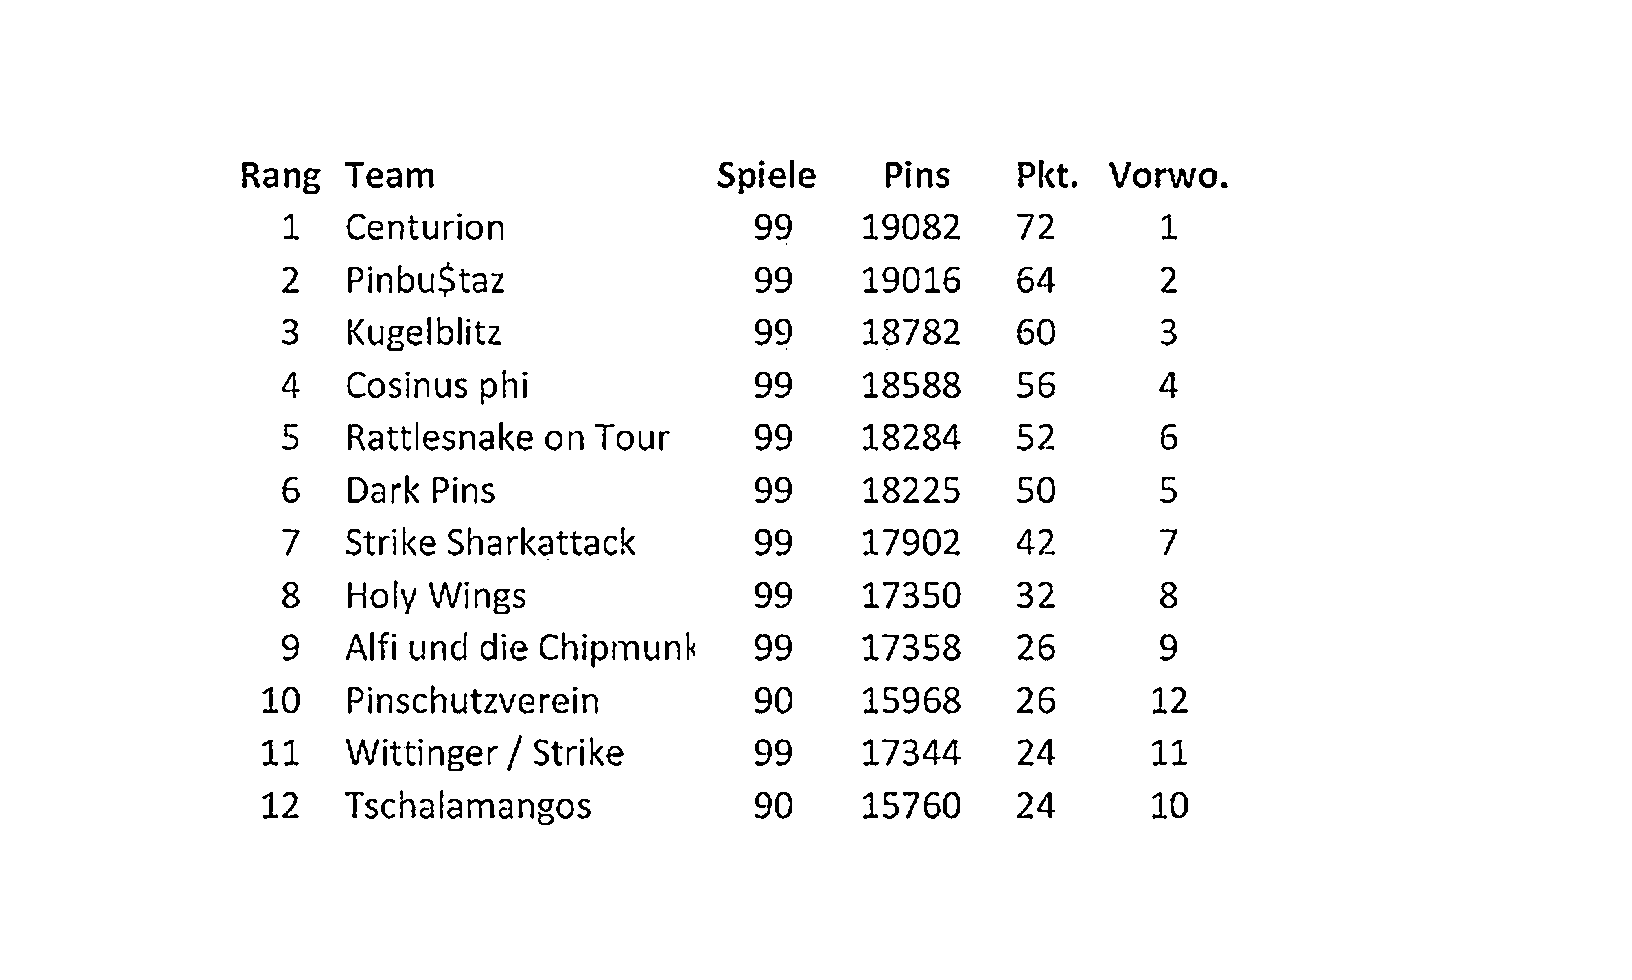

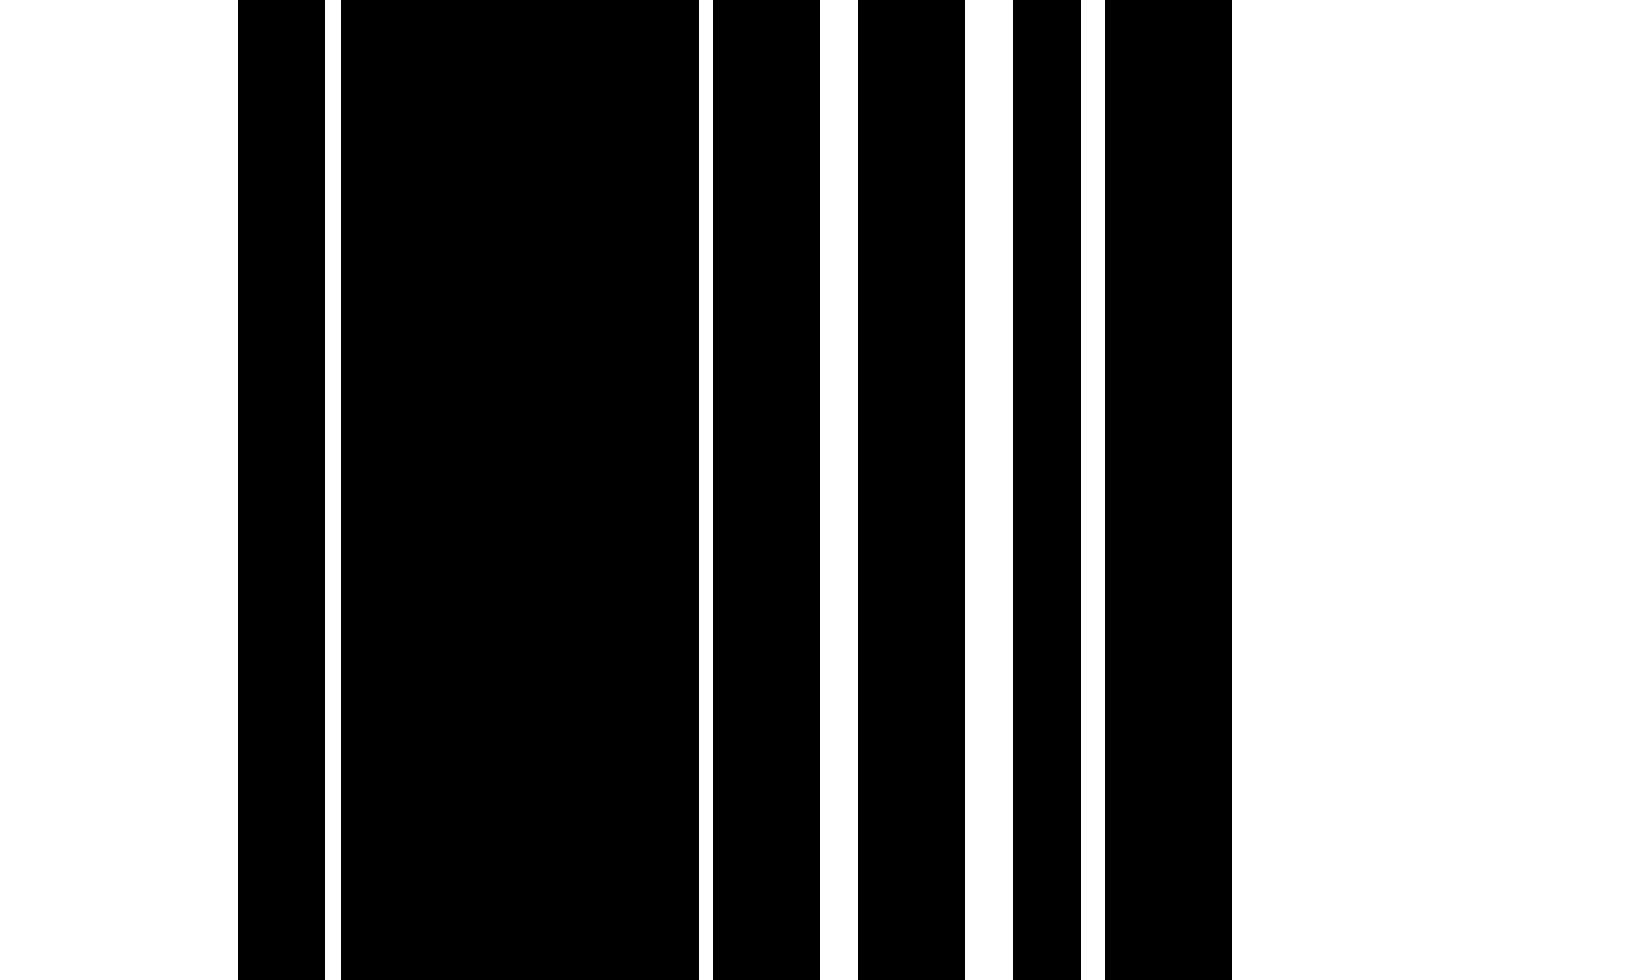

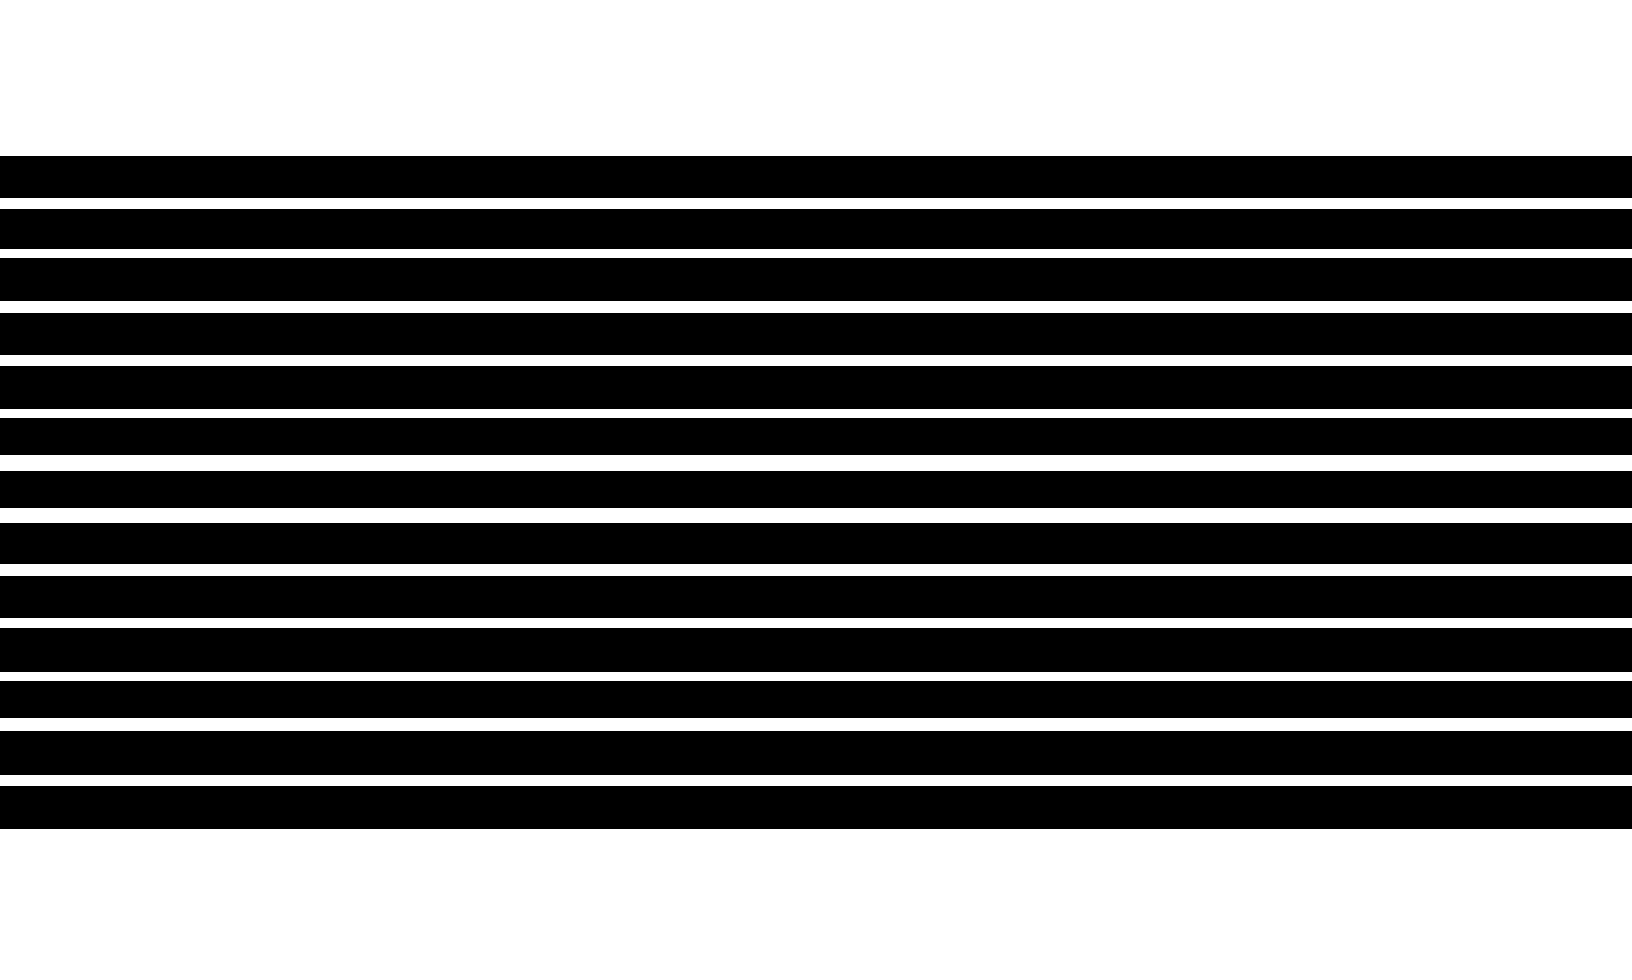

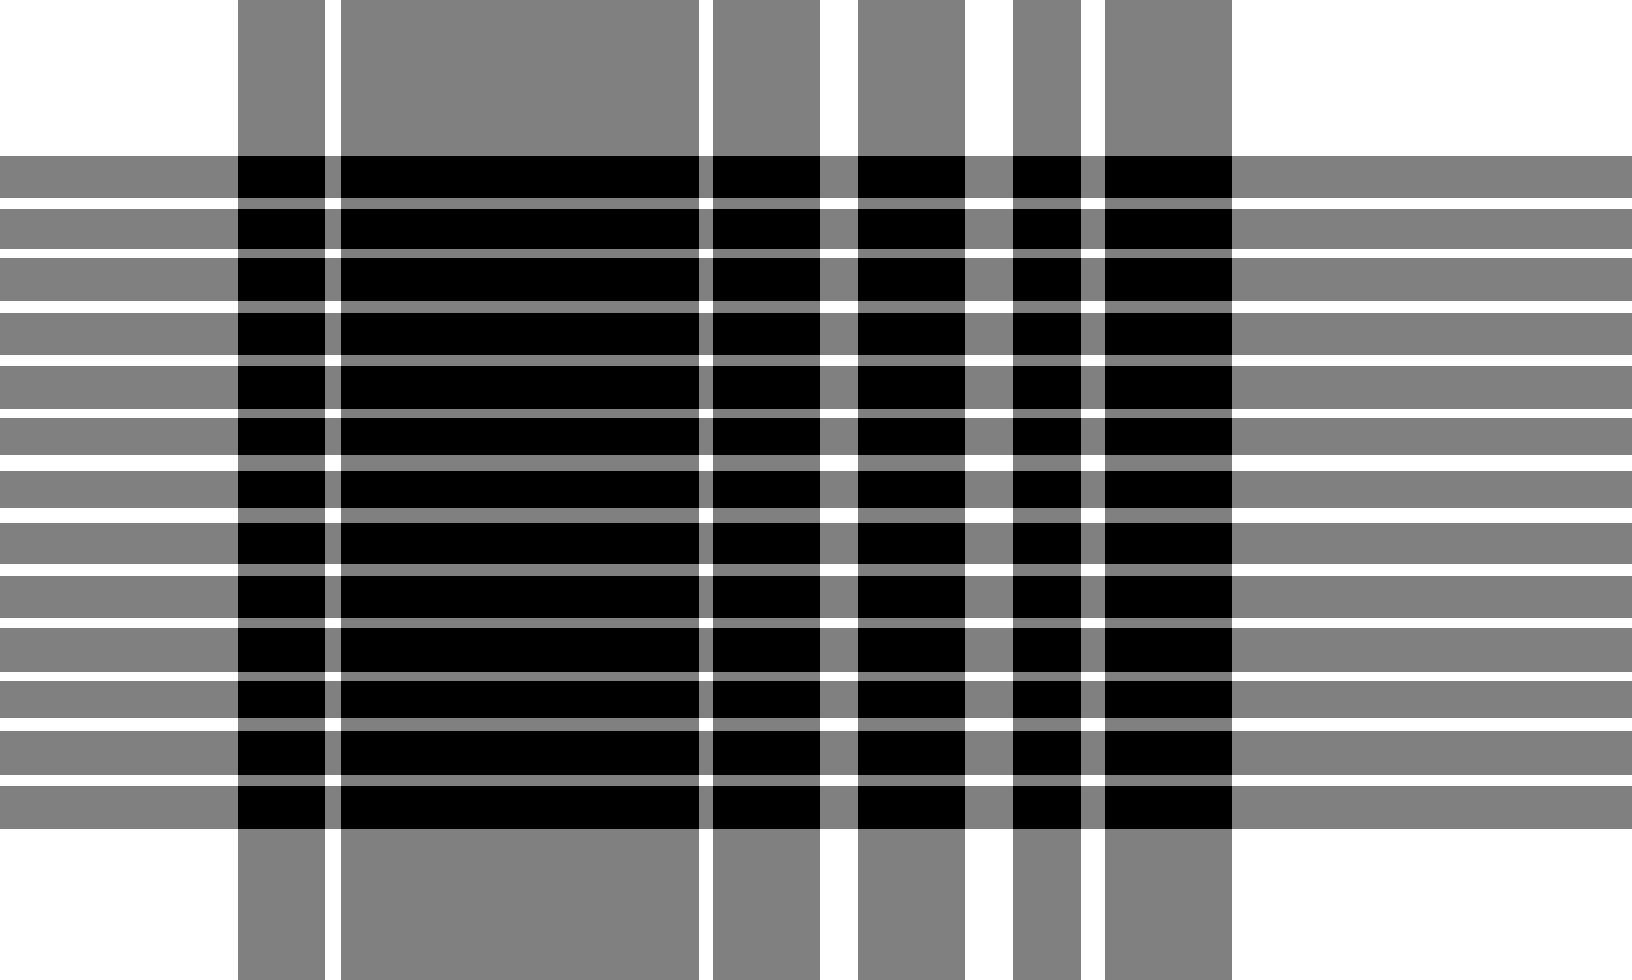

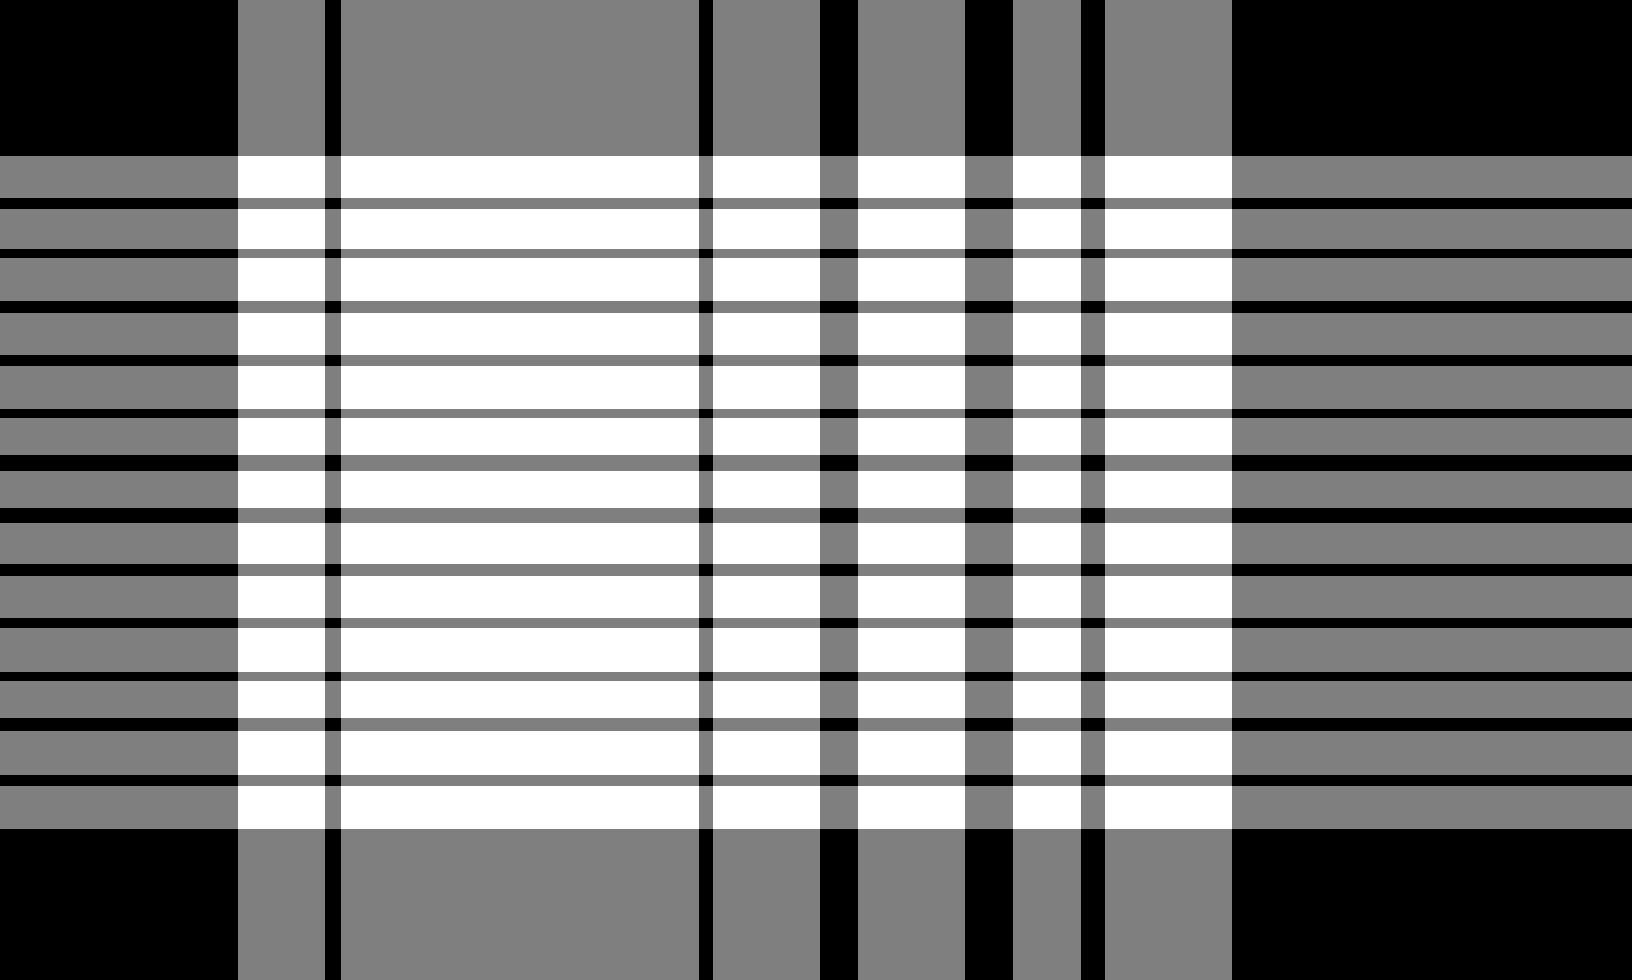

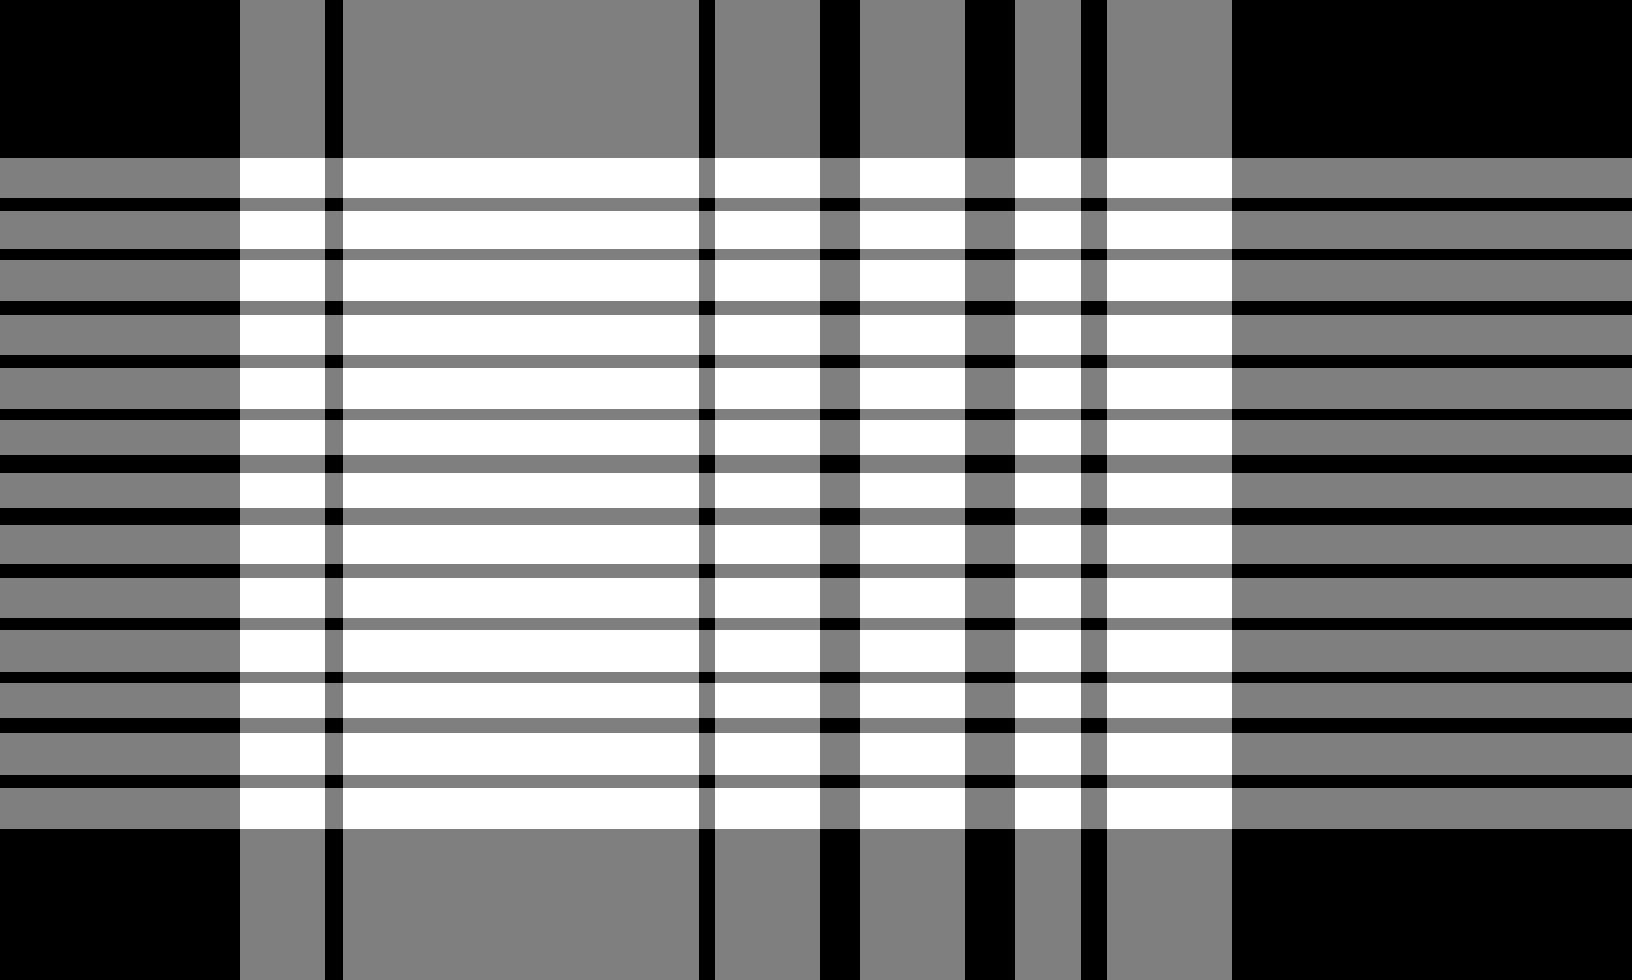

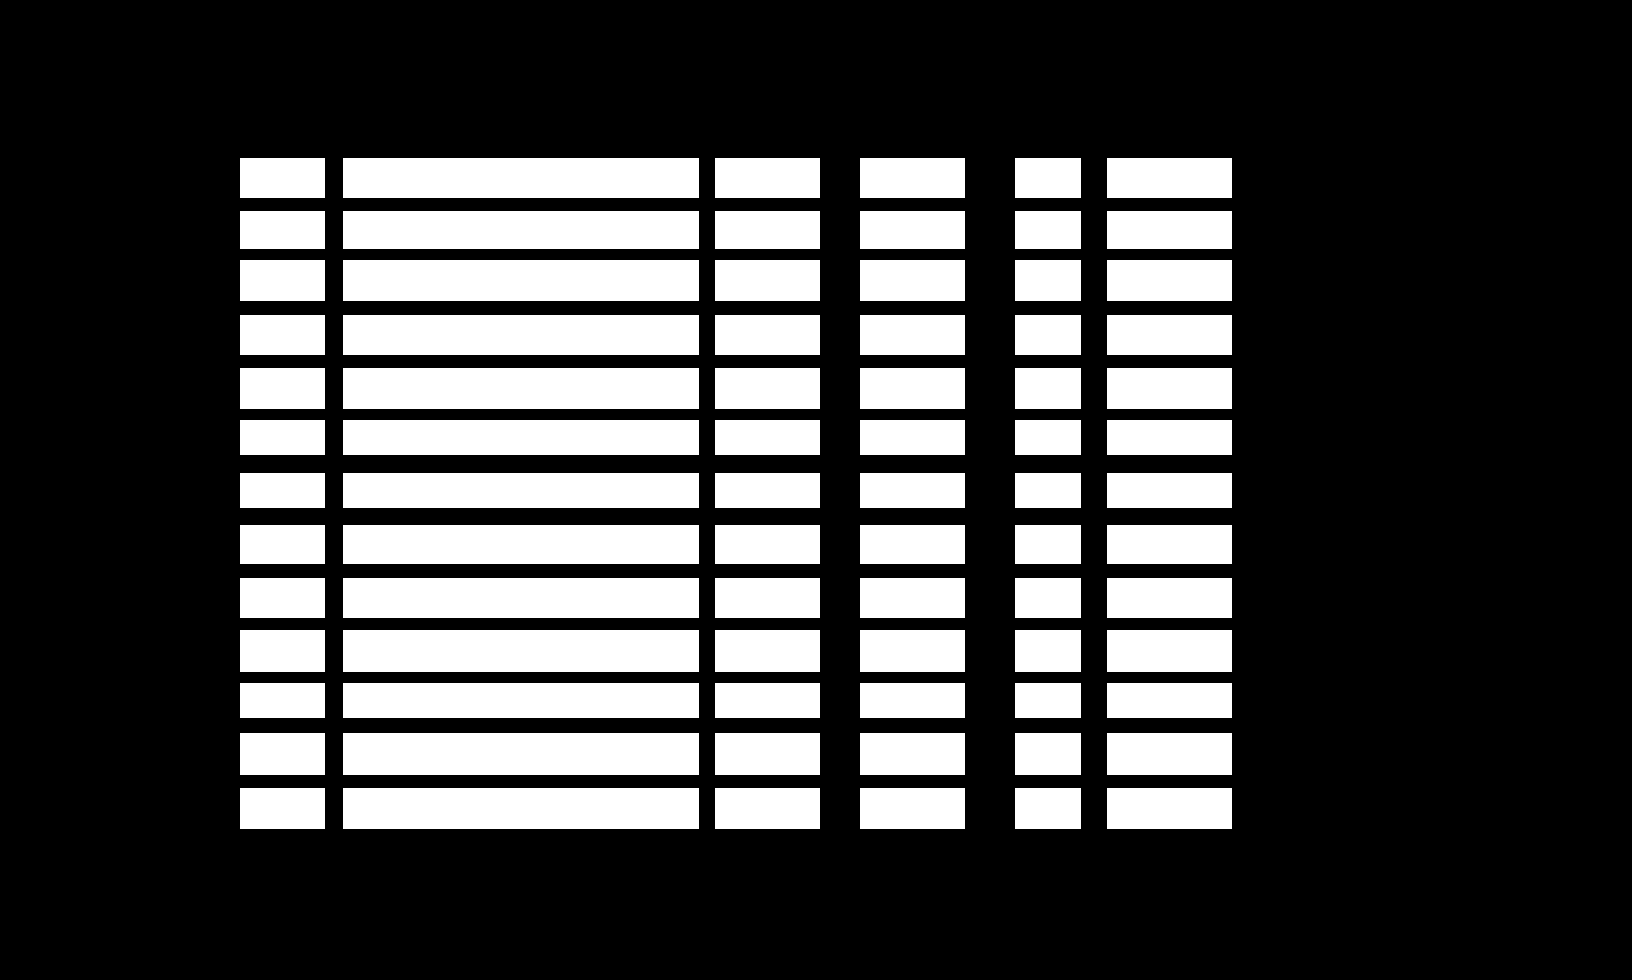

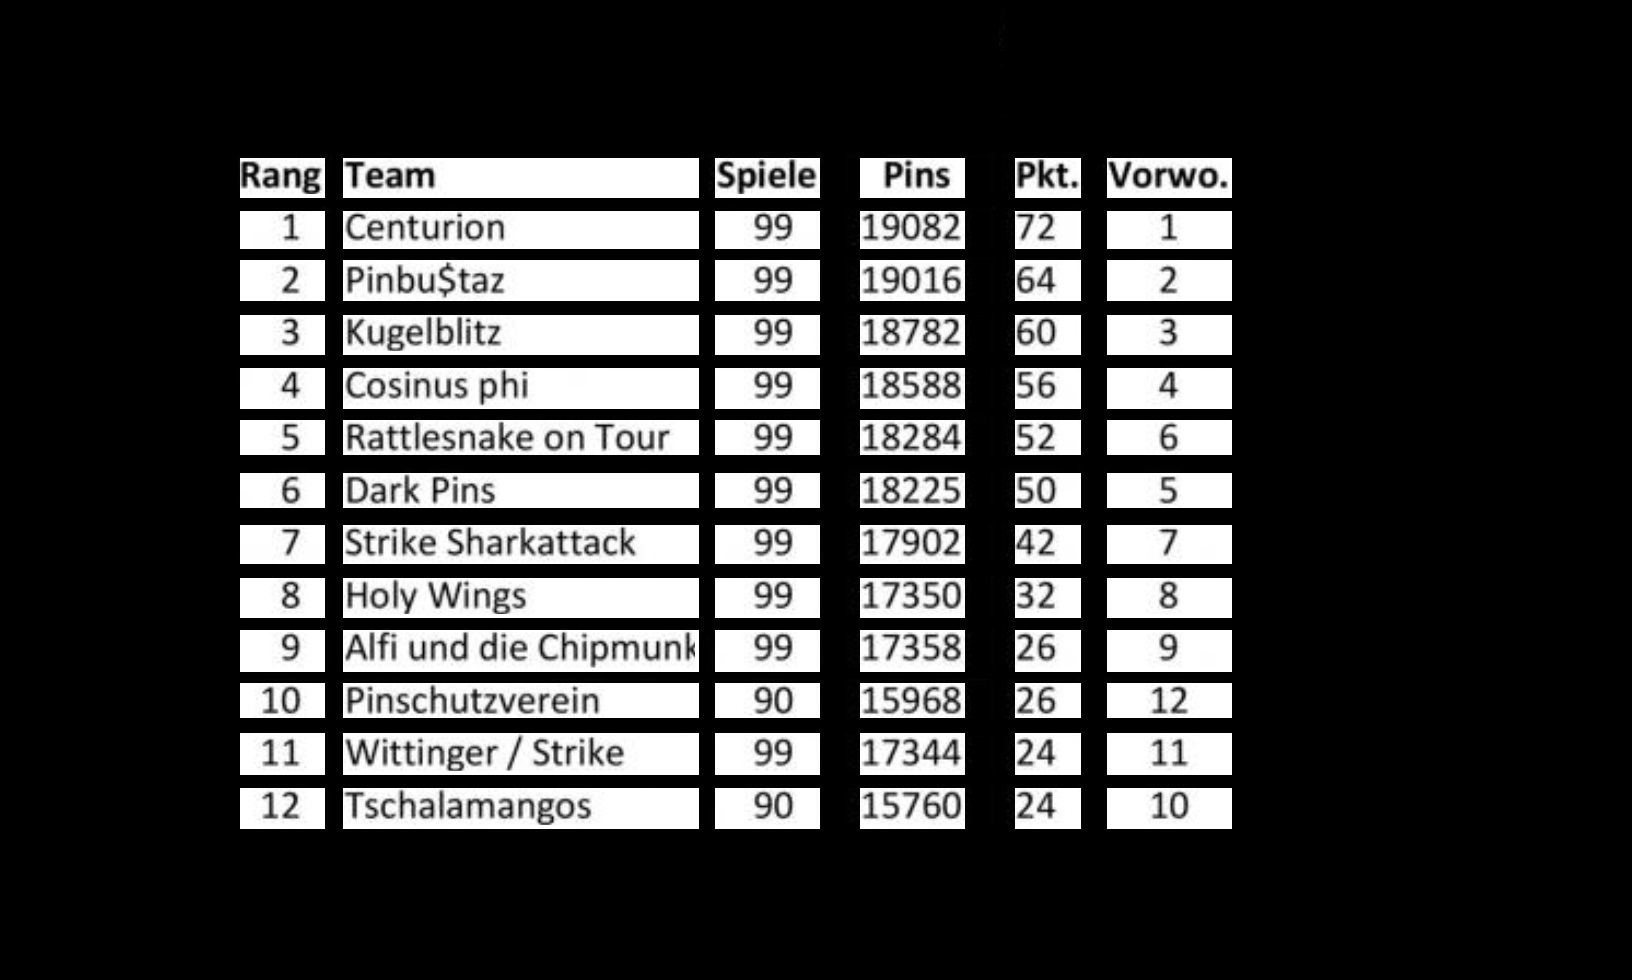

In [ ]:
unbordered_table = cv2.imread("/content/Multi_Type_TD_TSR/images/unbordered_example.jpg")
list_table_boxes = []

table_list = [unbordered_table]

for table in table_list:
    finalboxes, output_img = tsrwol.recognize_structure(table)
    list_table_boxes.append(finalboxes)

#Table Structure Recognition Partially Bordered Tables

TABLE 0 :


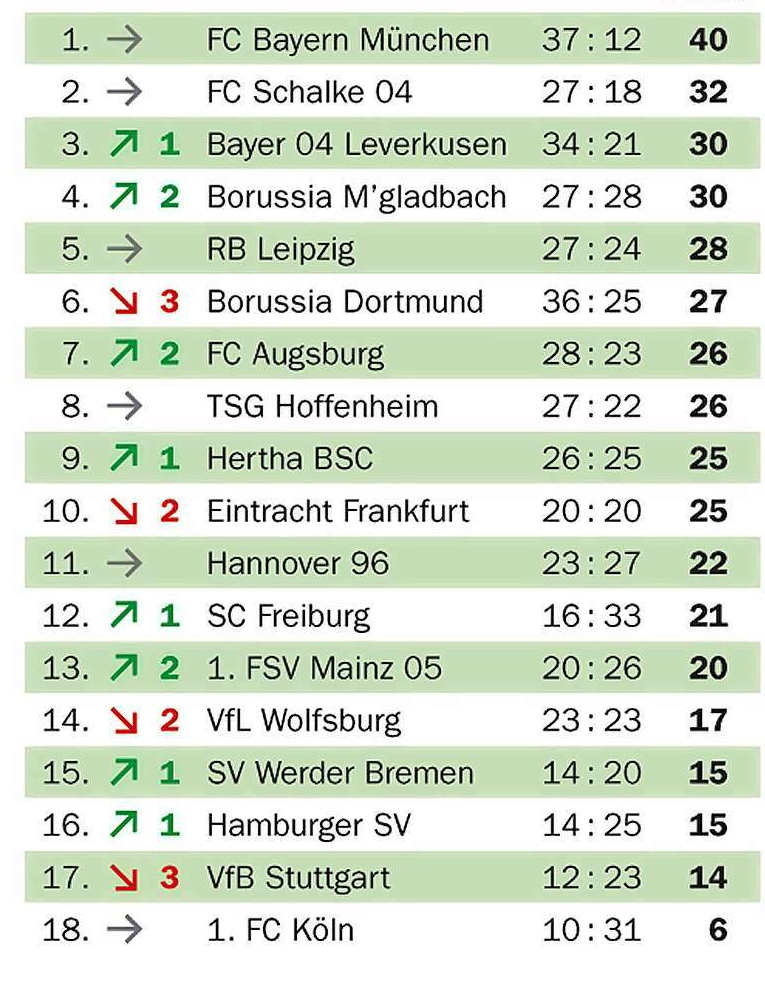


TABLE 1 :


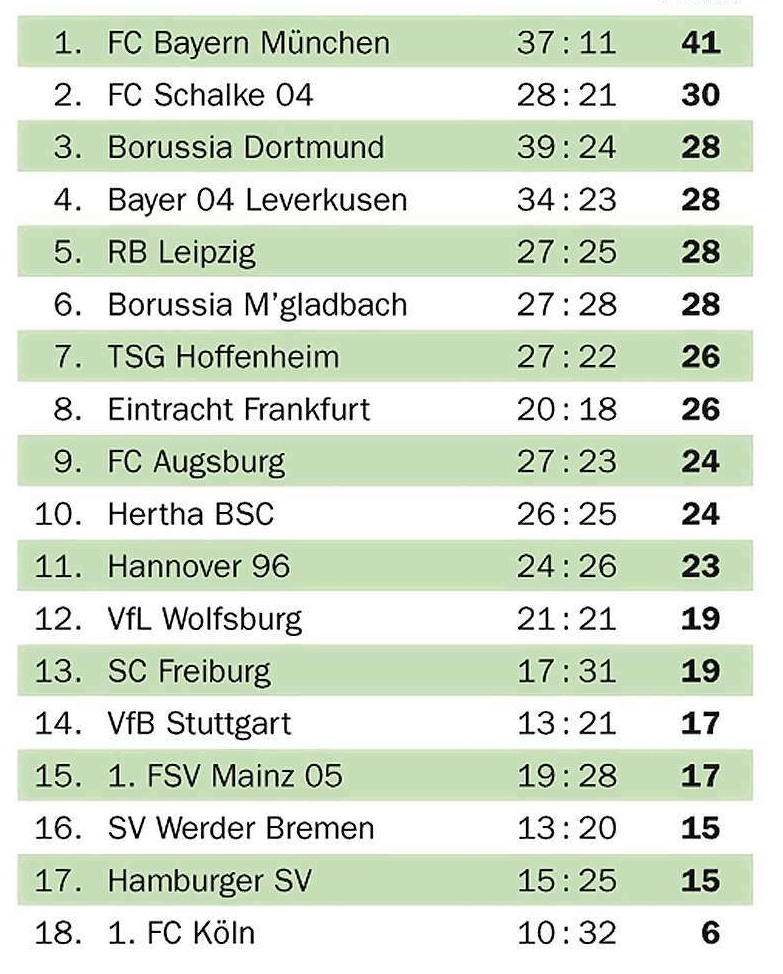

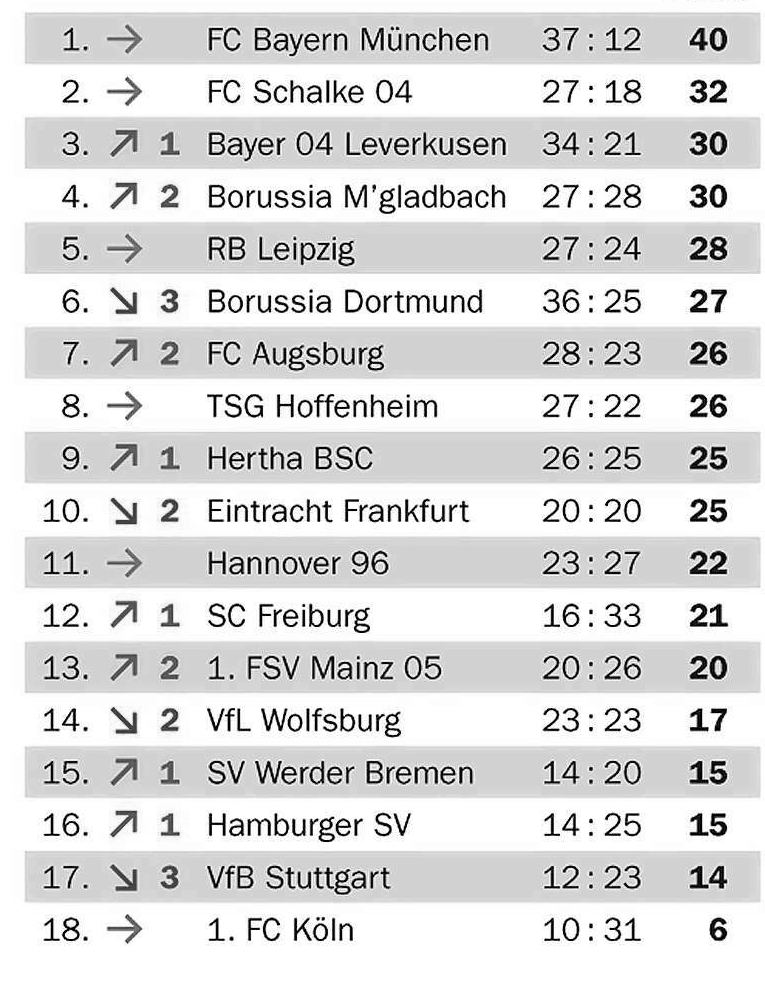

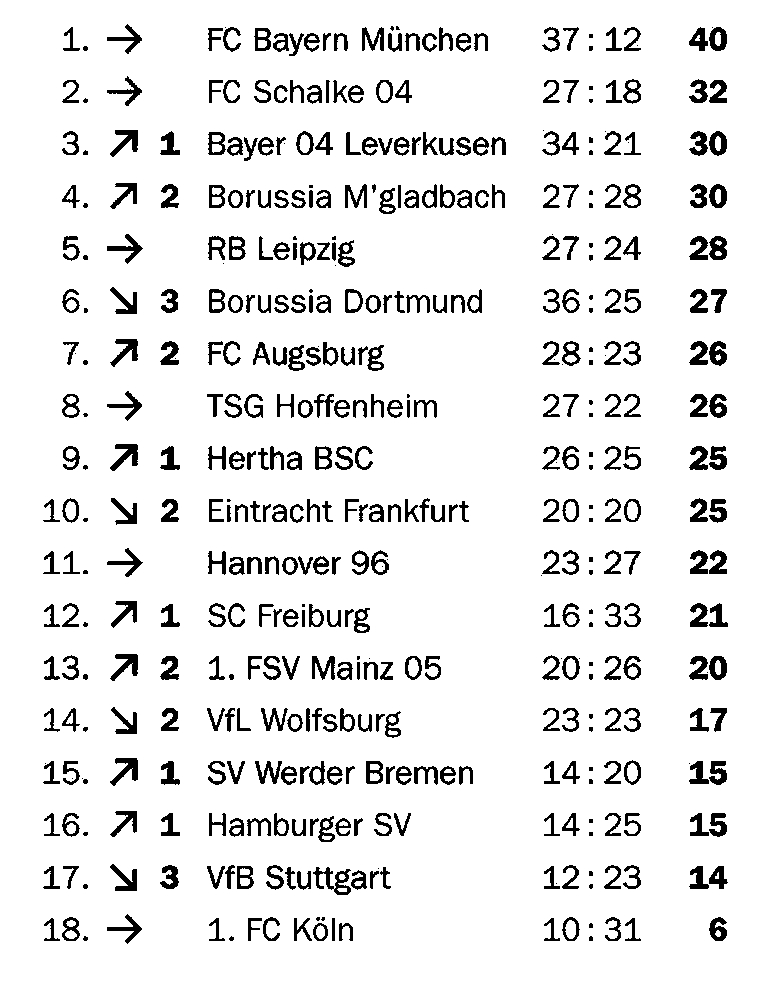

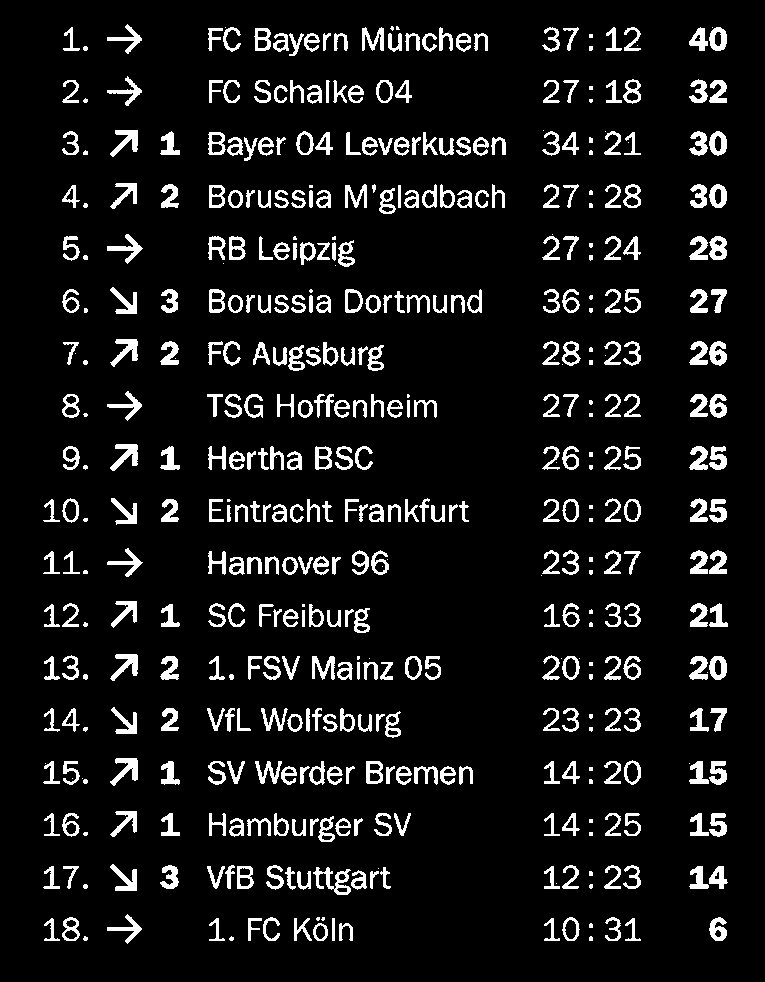

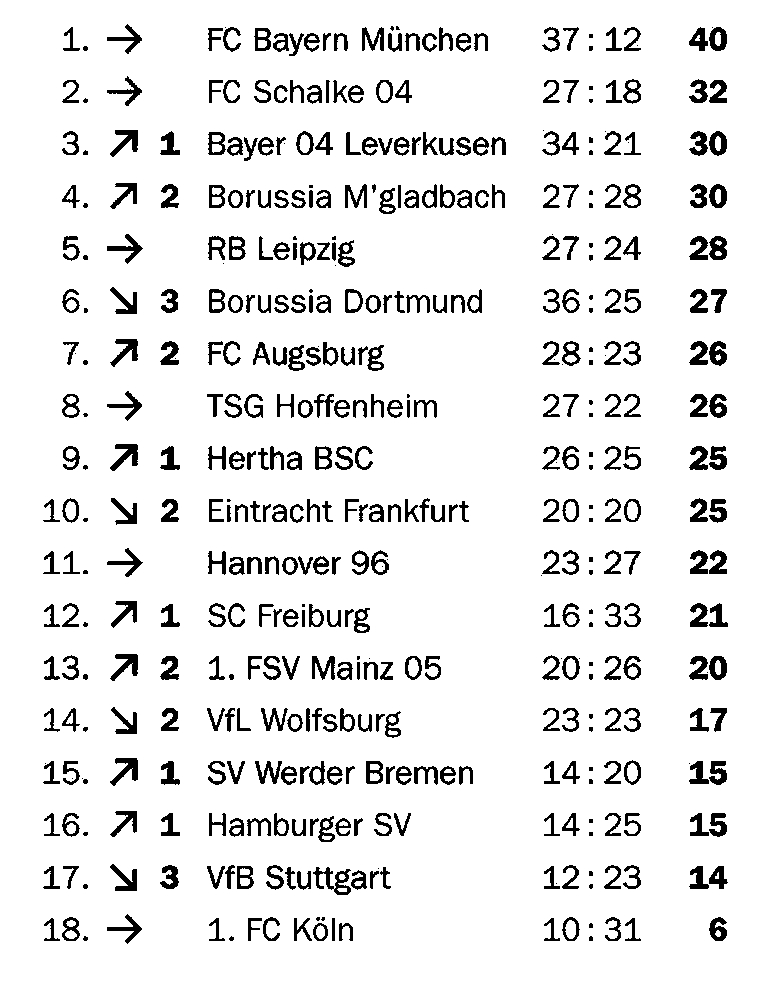

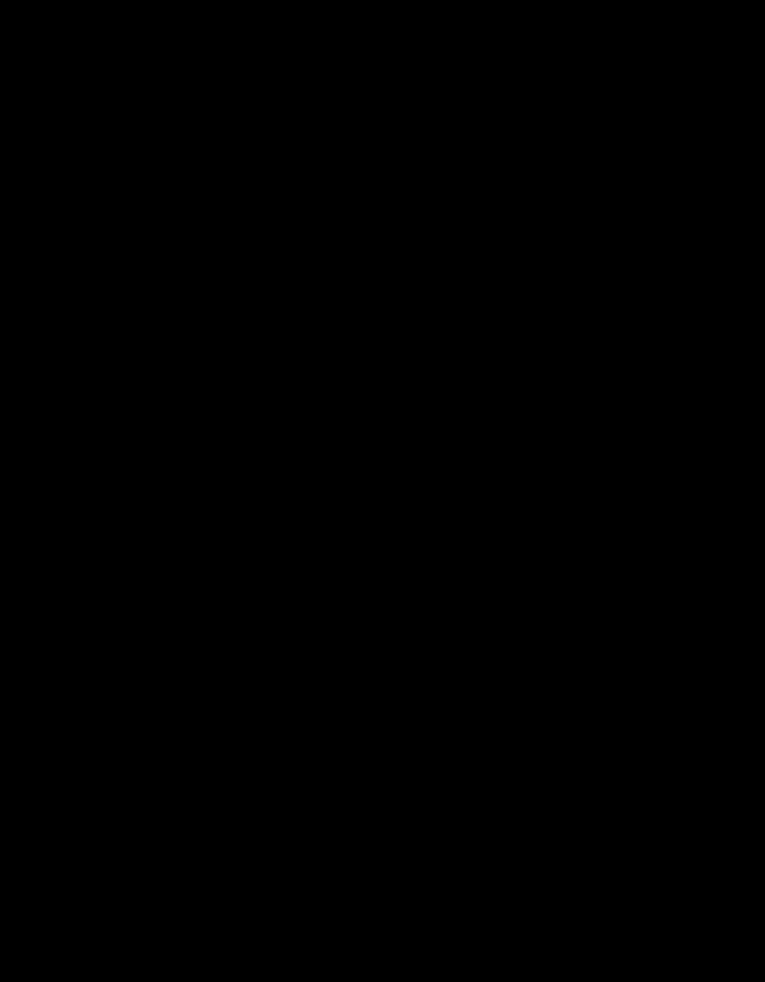

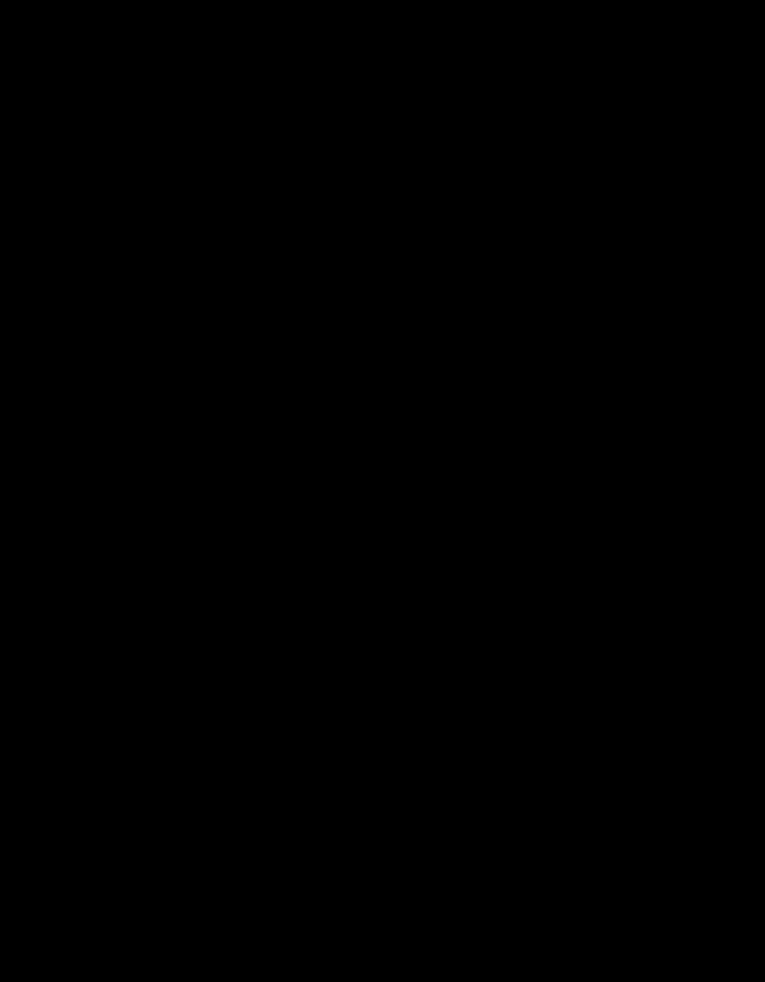

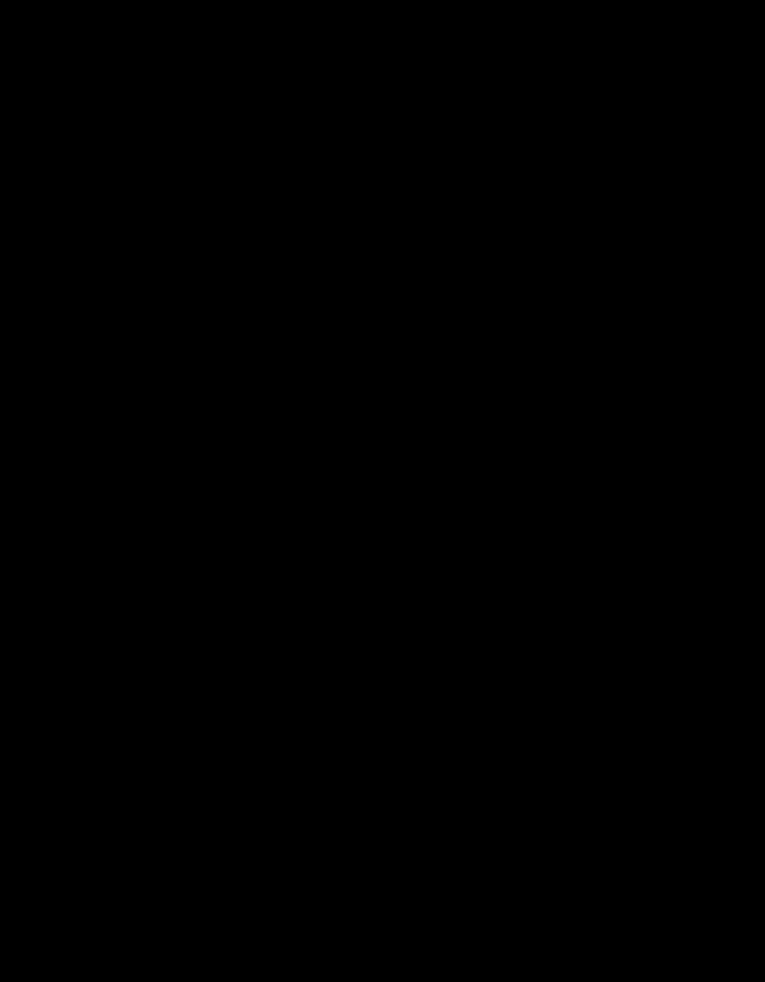

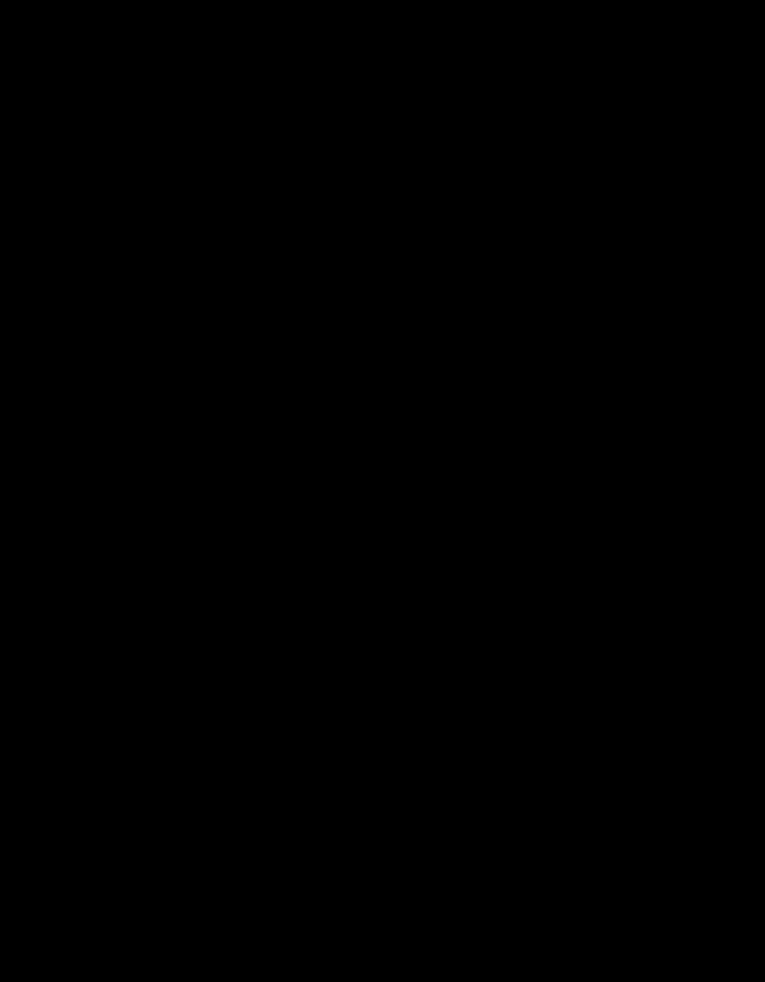

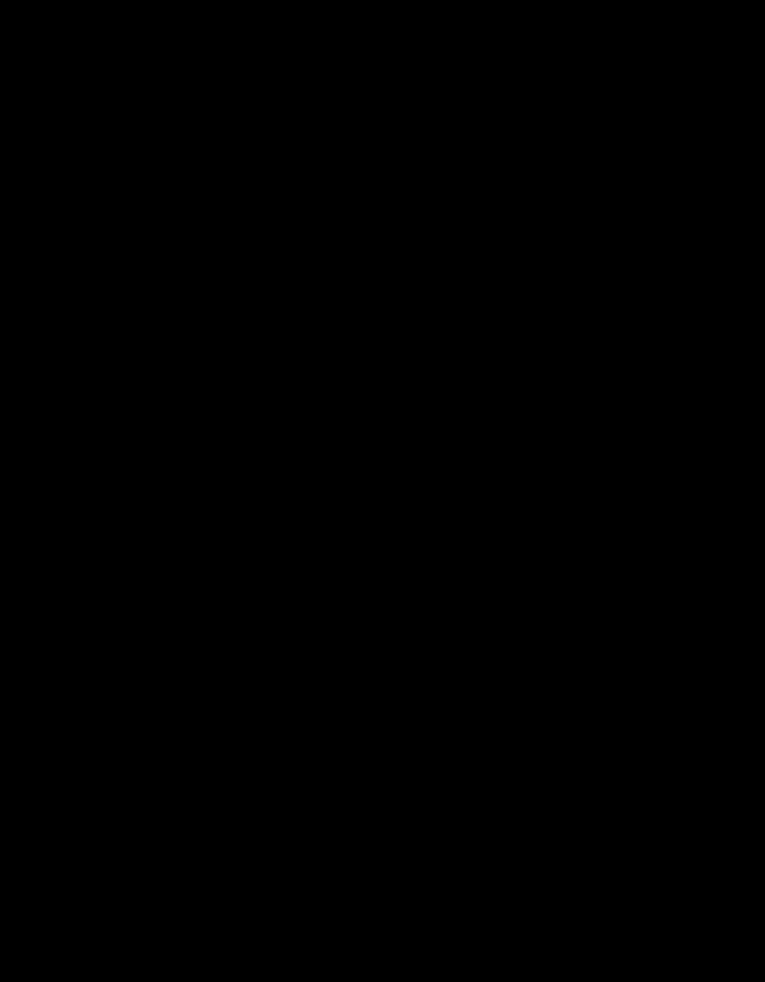

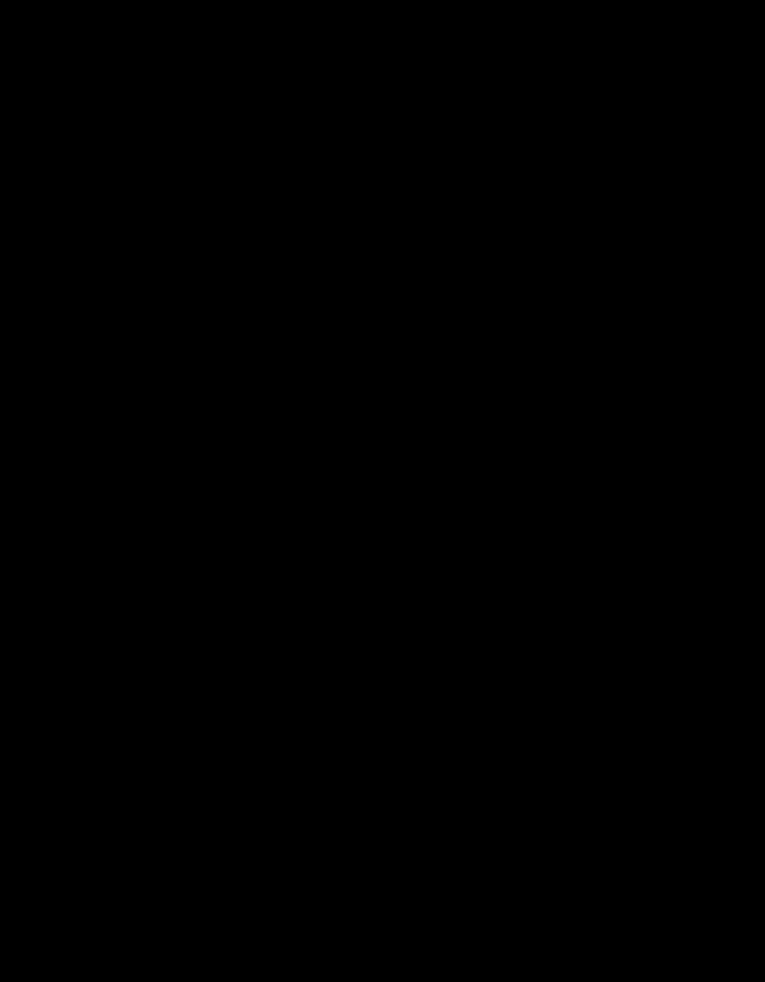

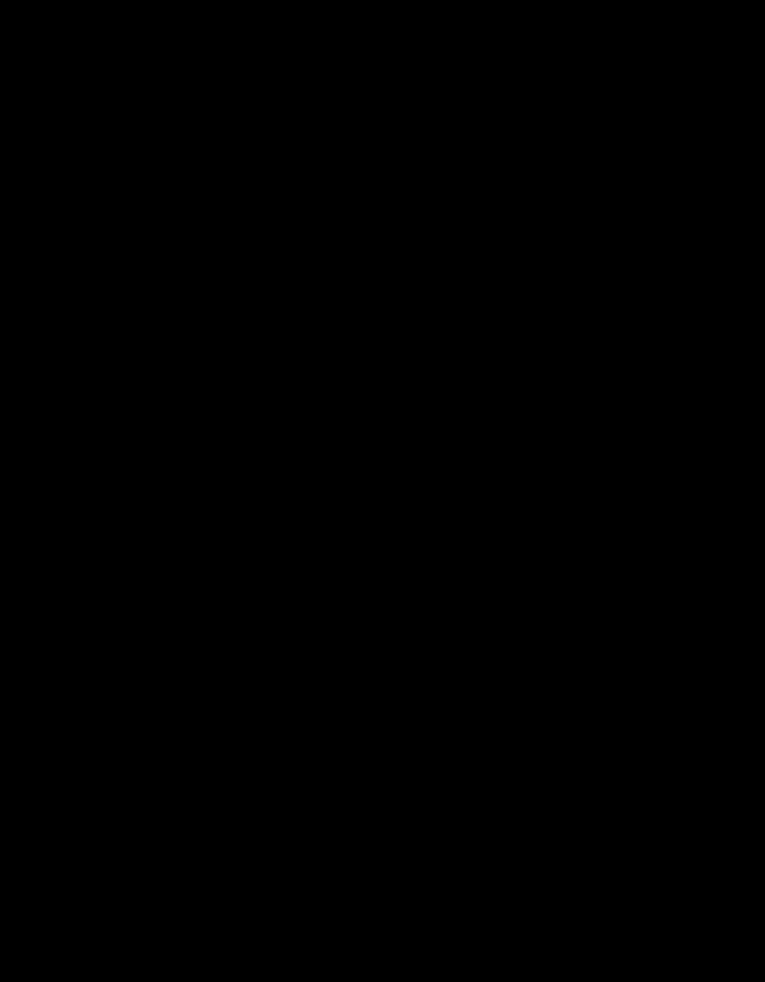

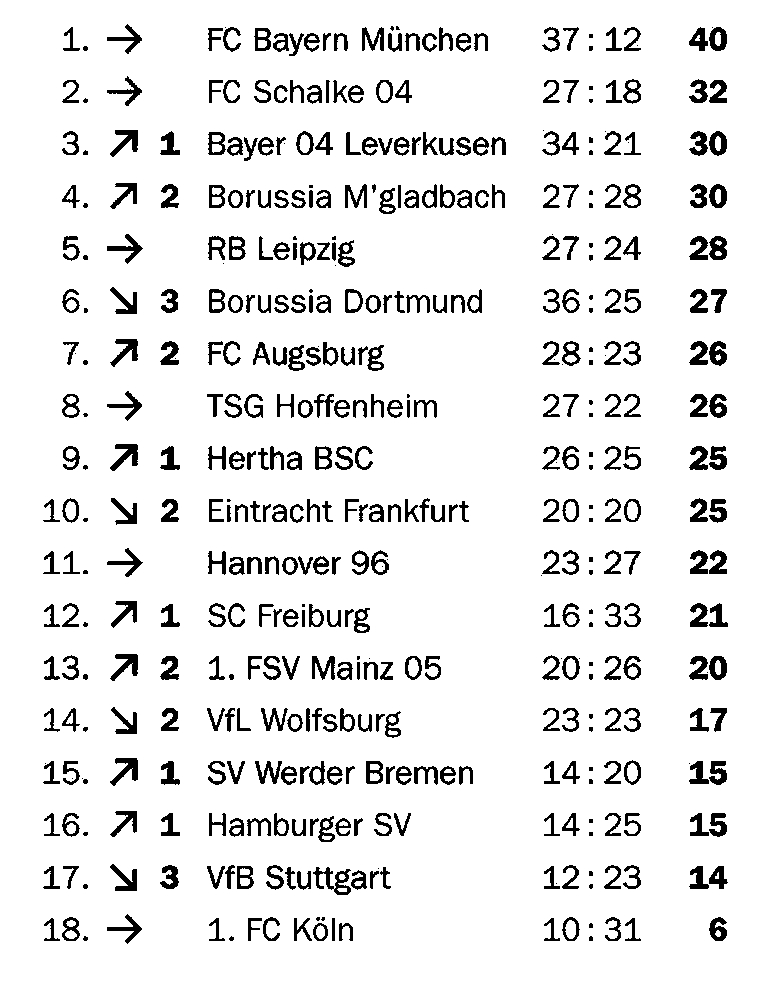

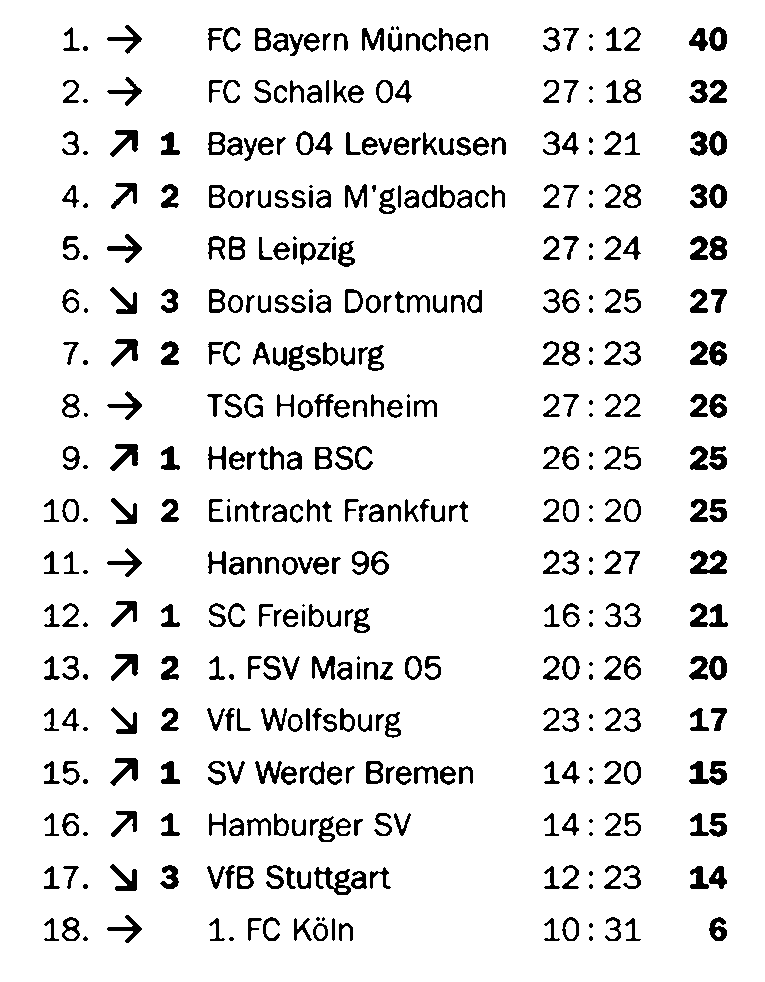

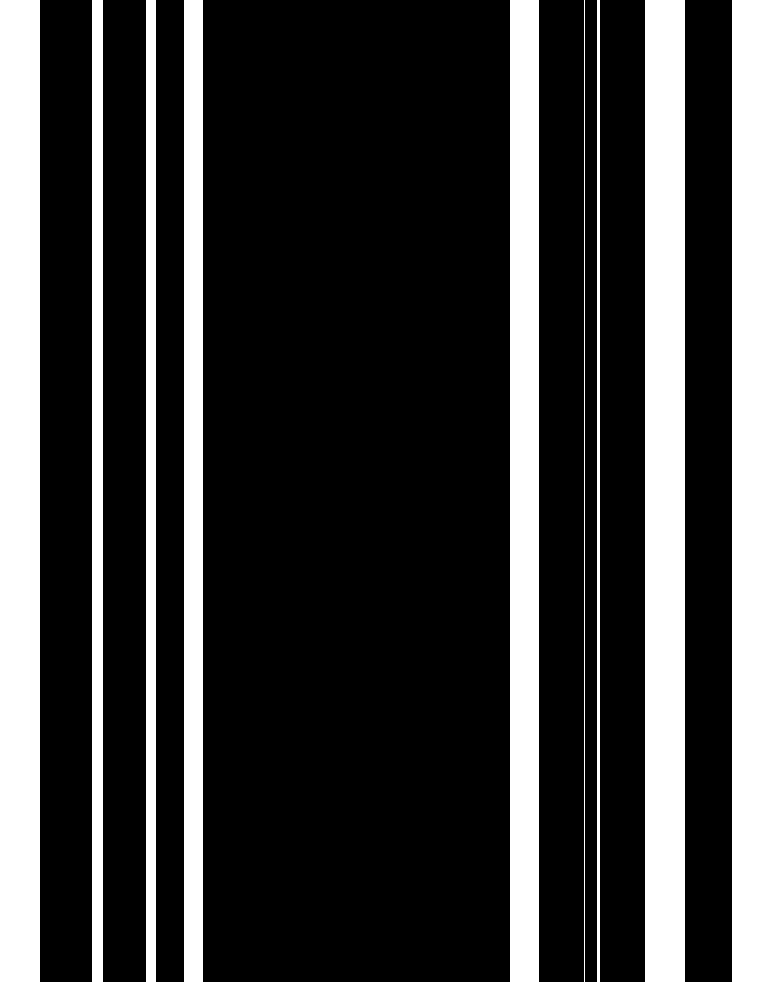

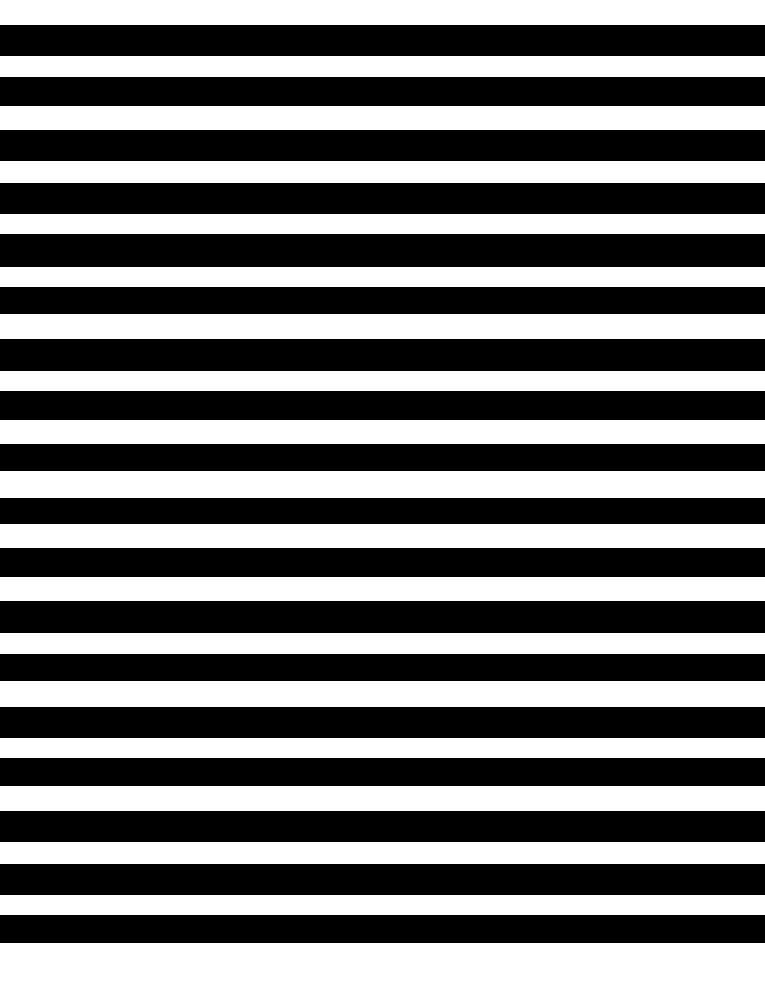

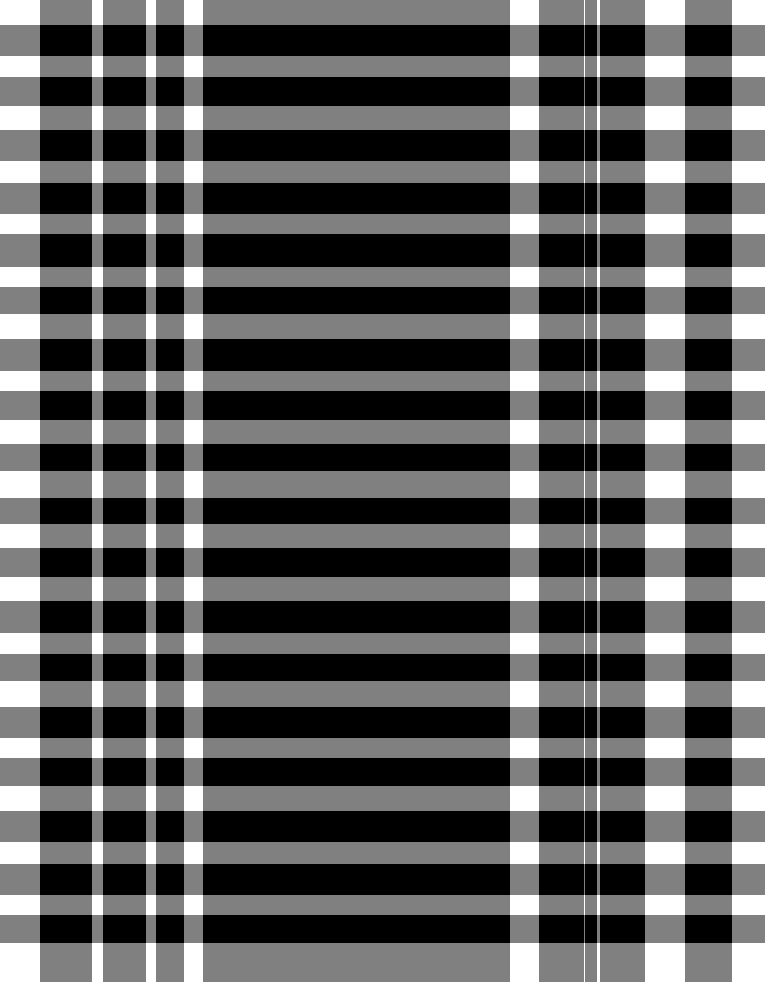

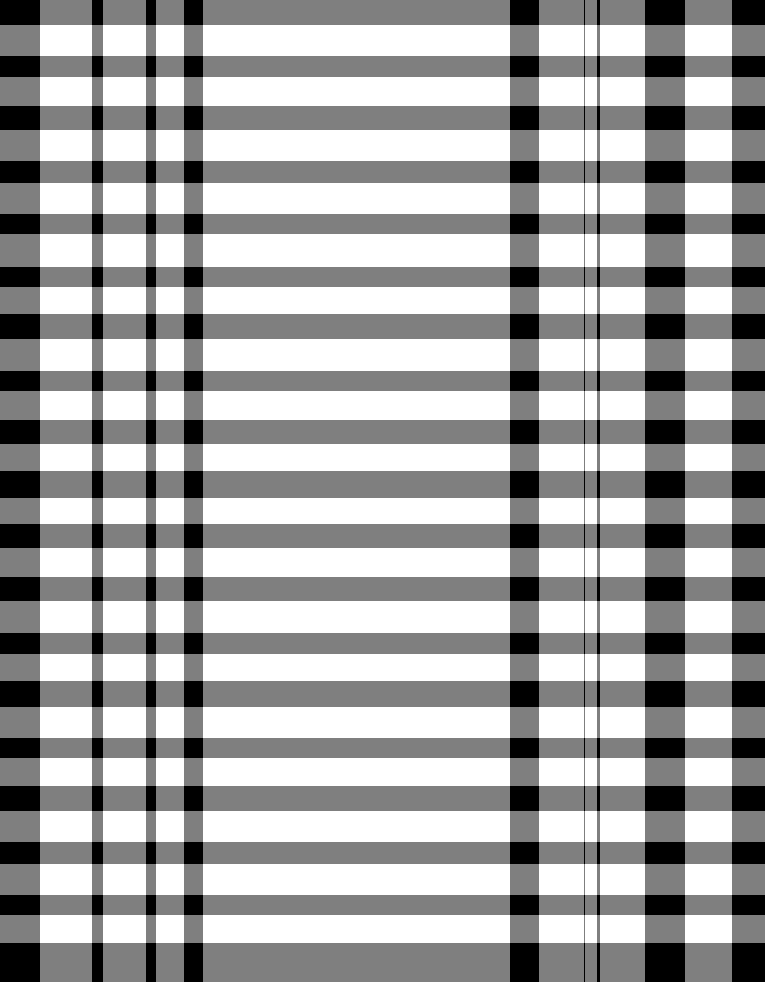

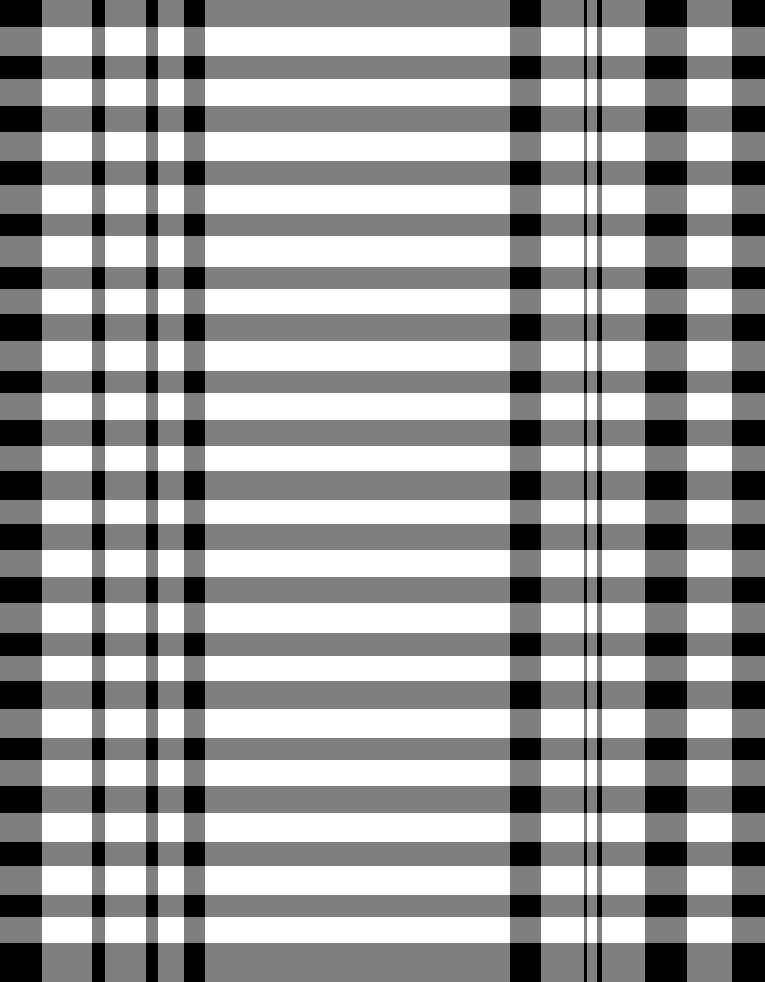

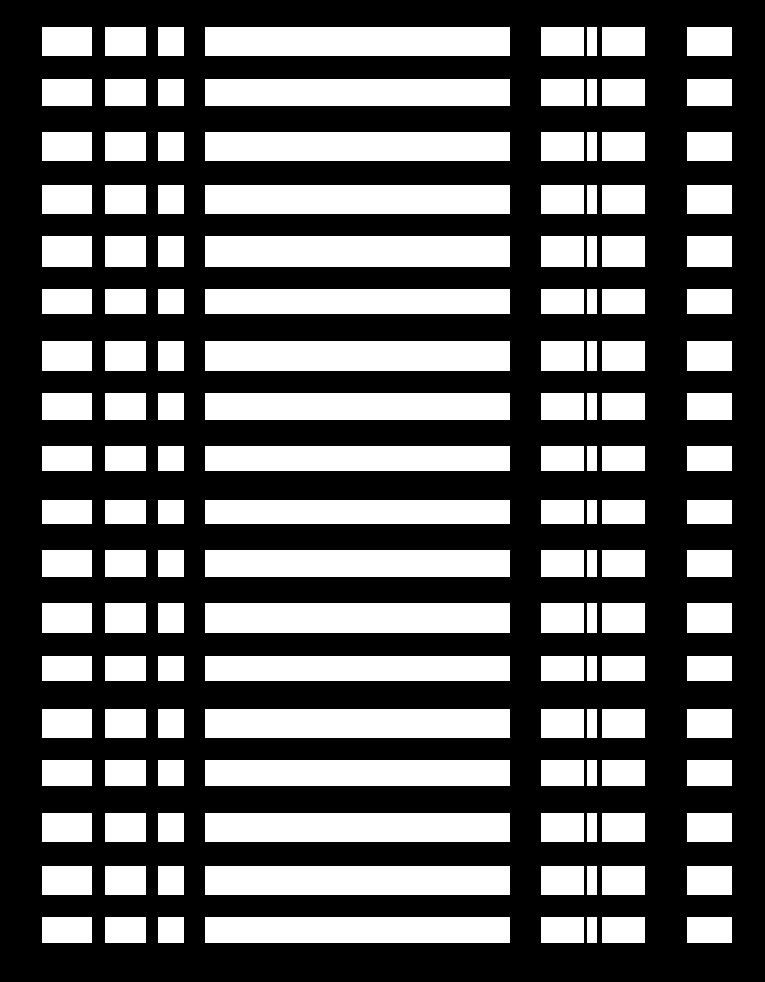

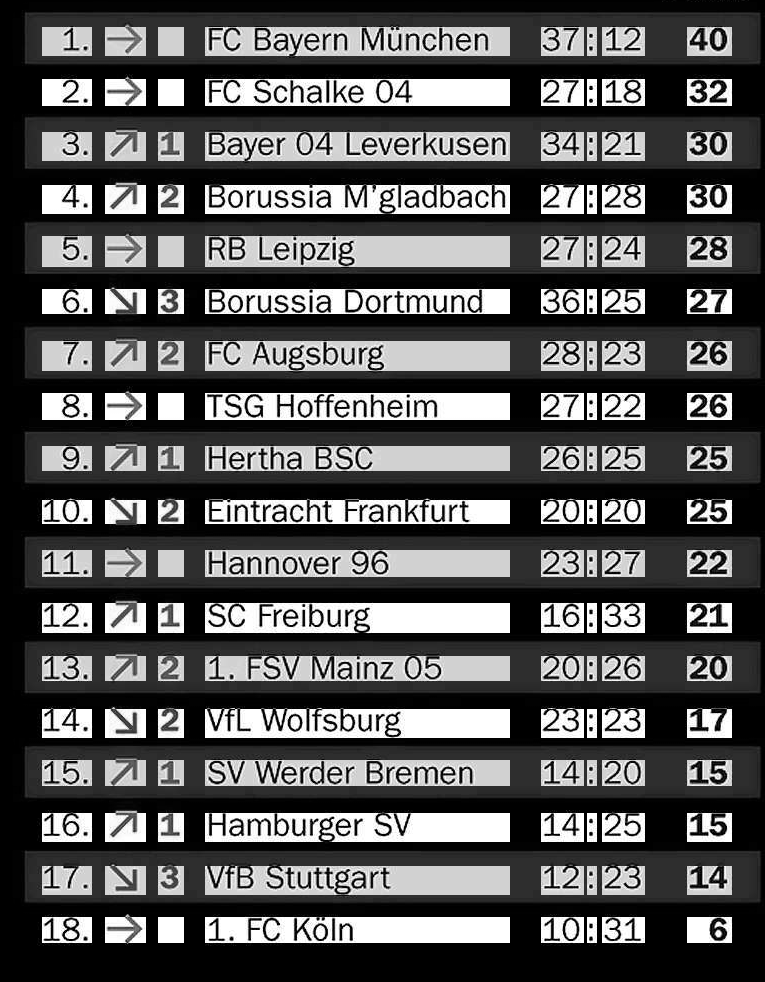

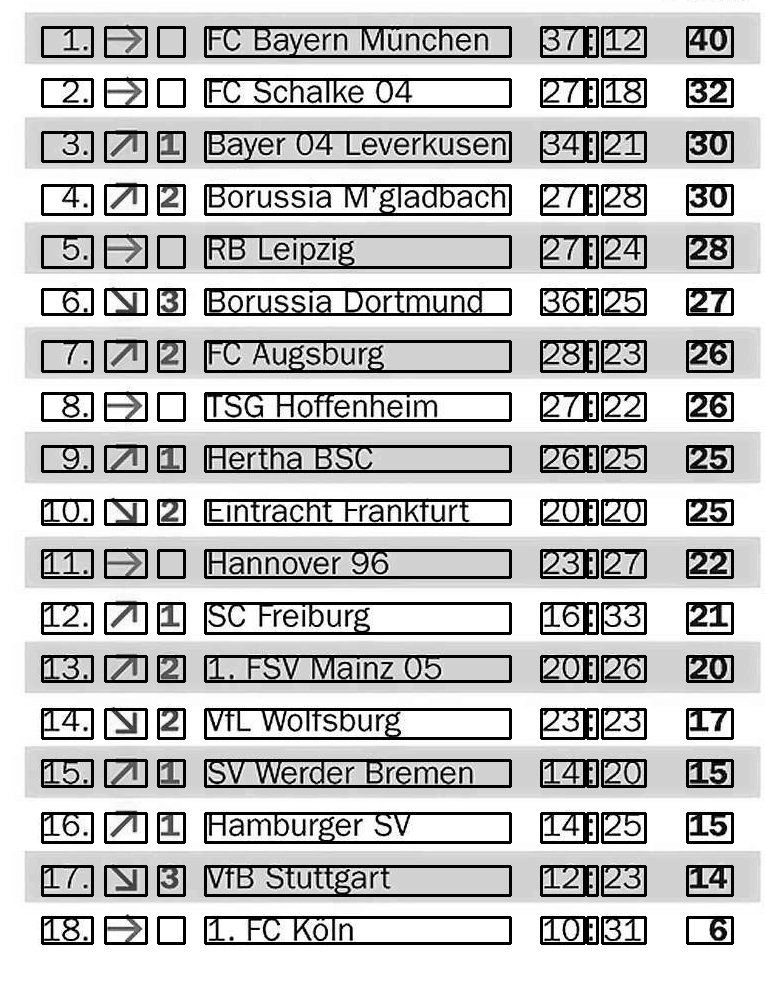

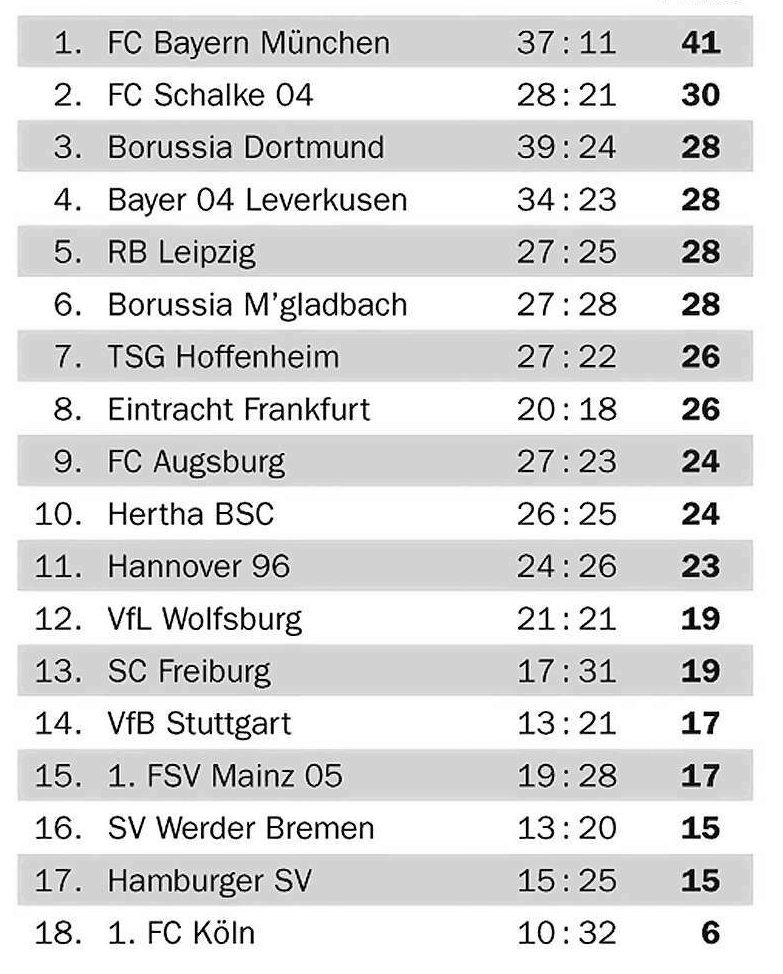

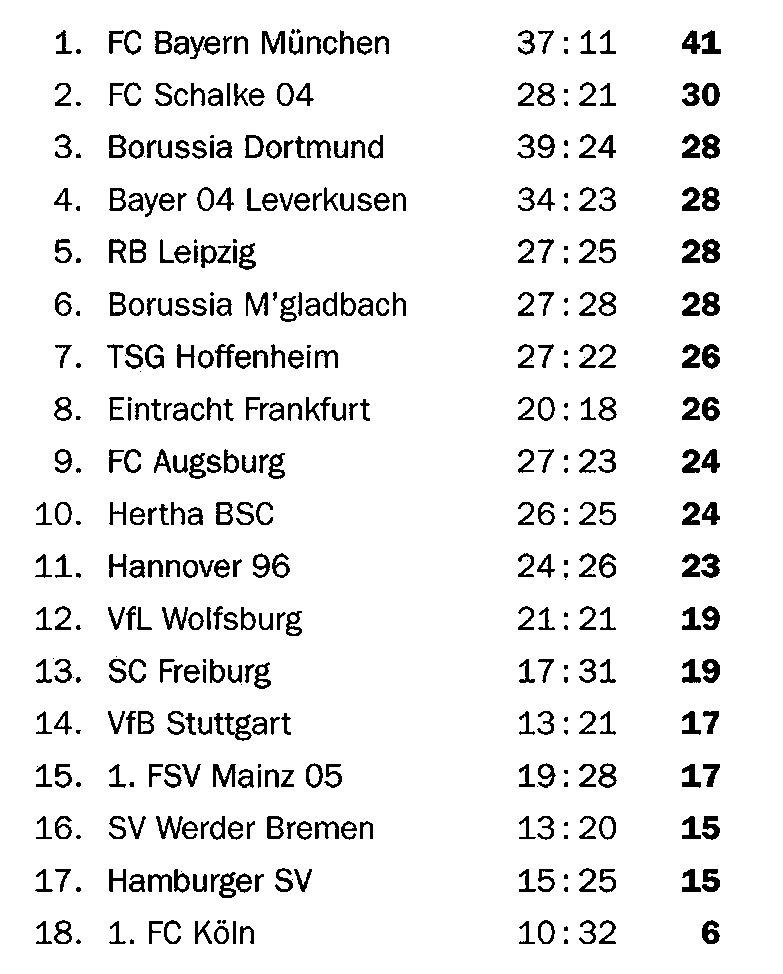

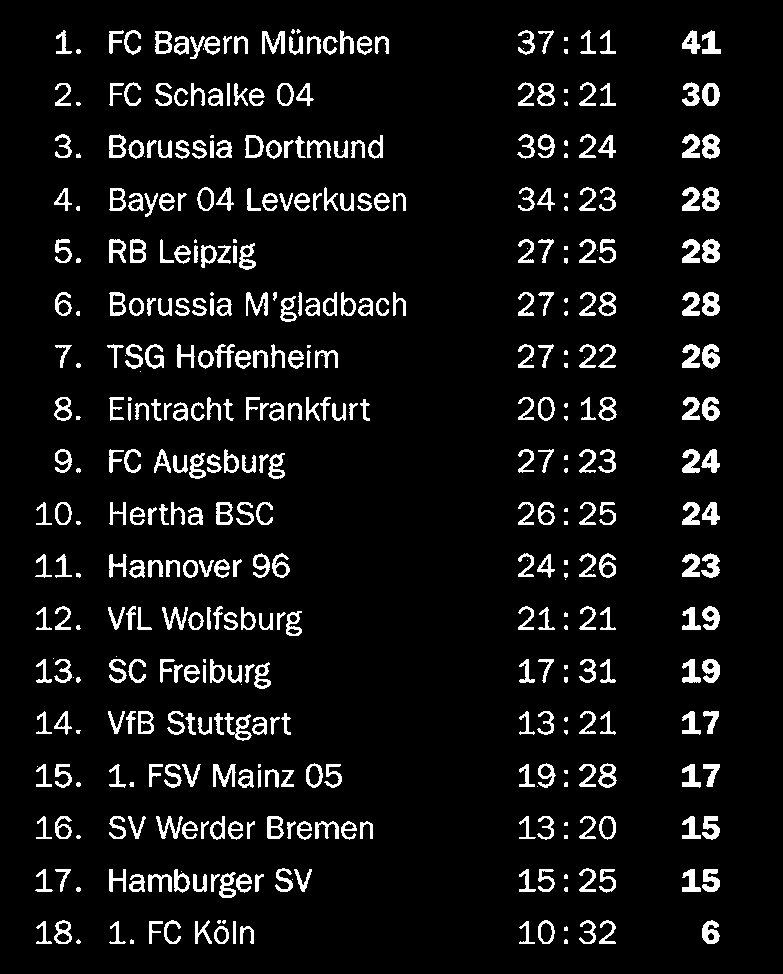

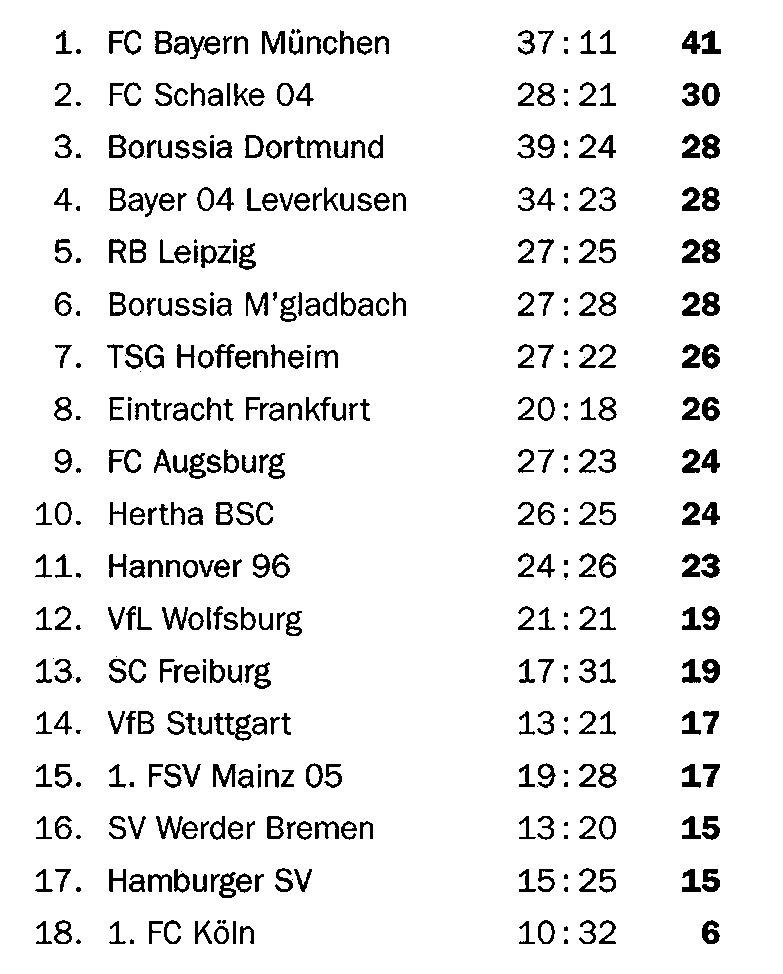

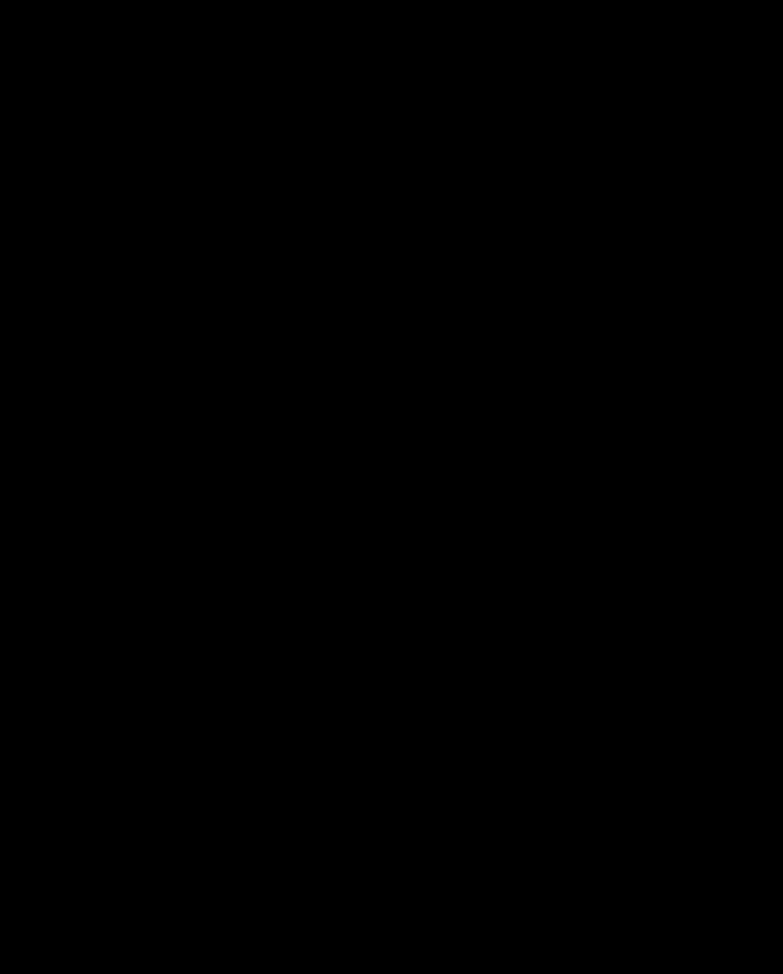

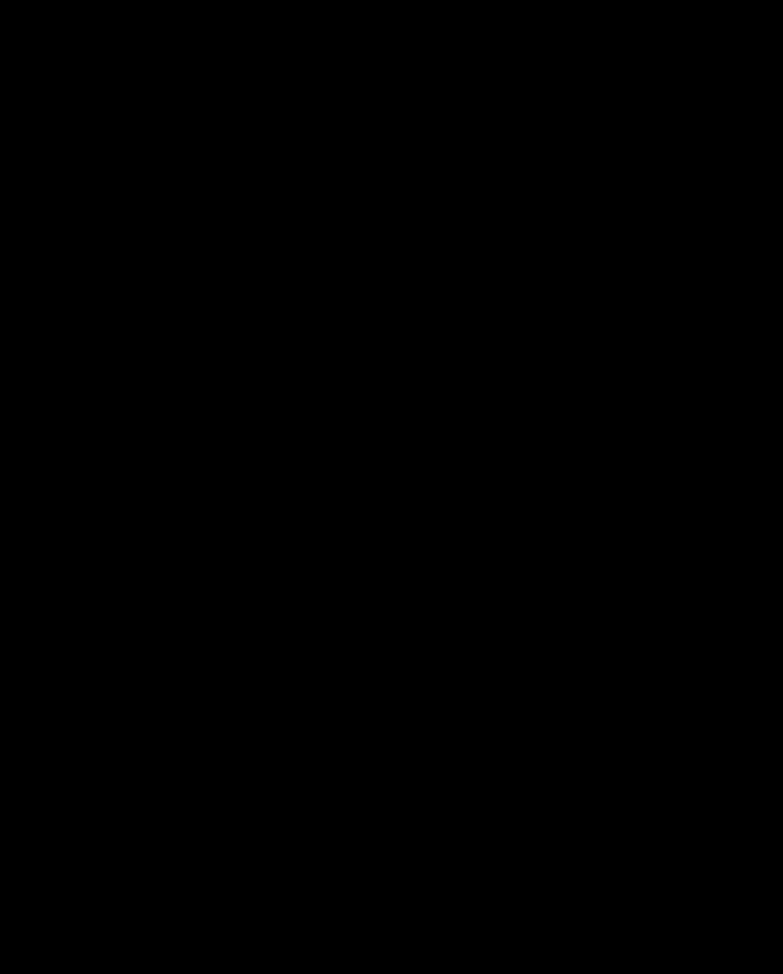

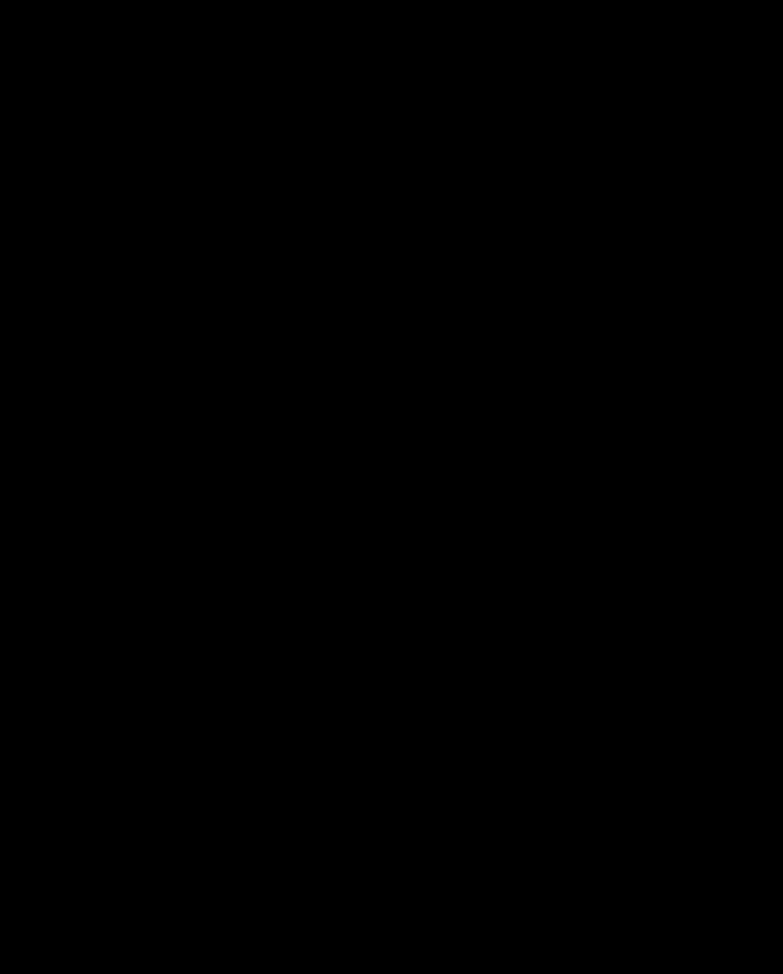

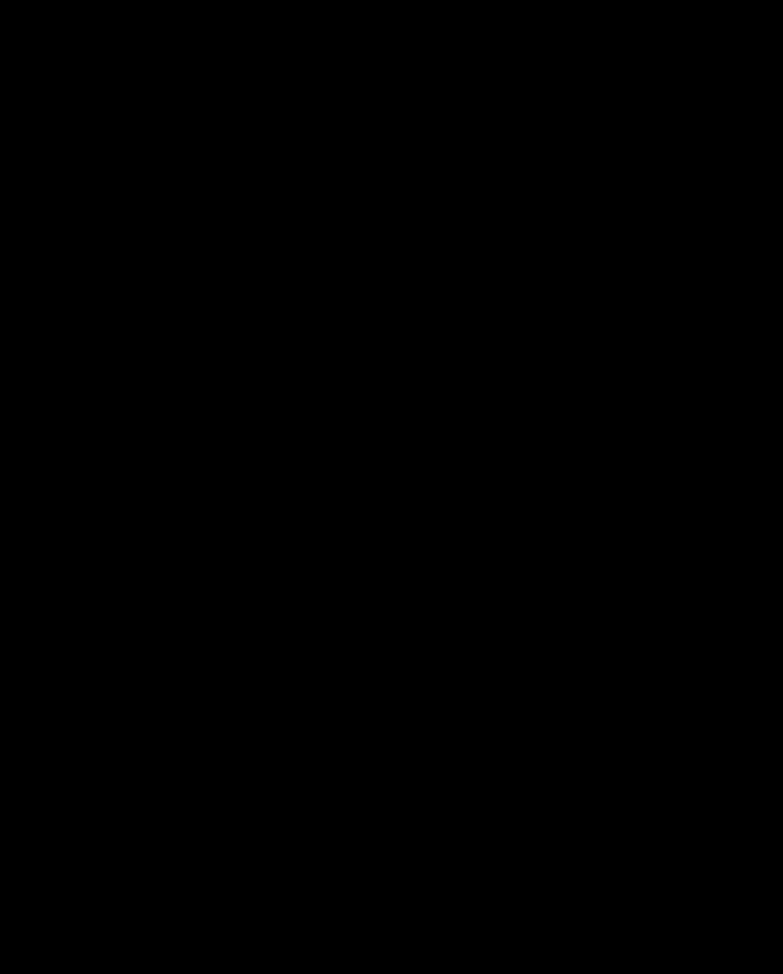

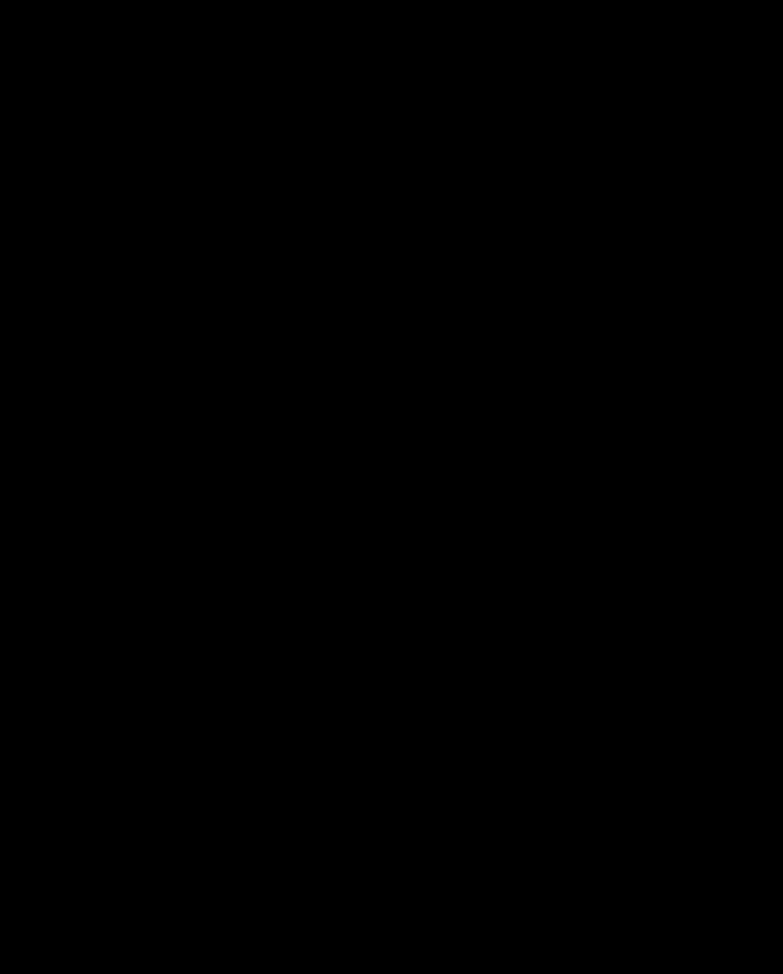

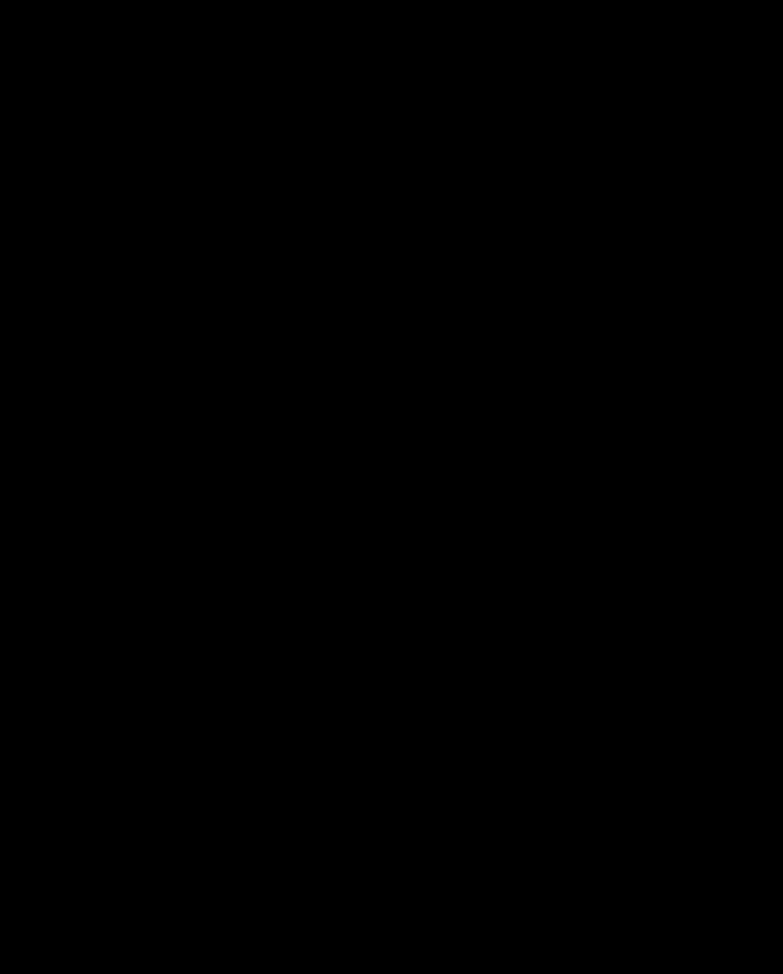

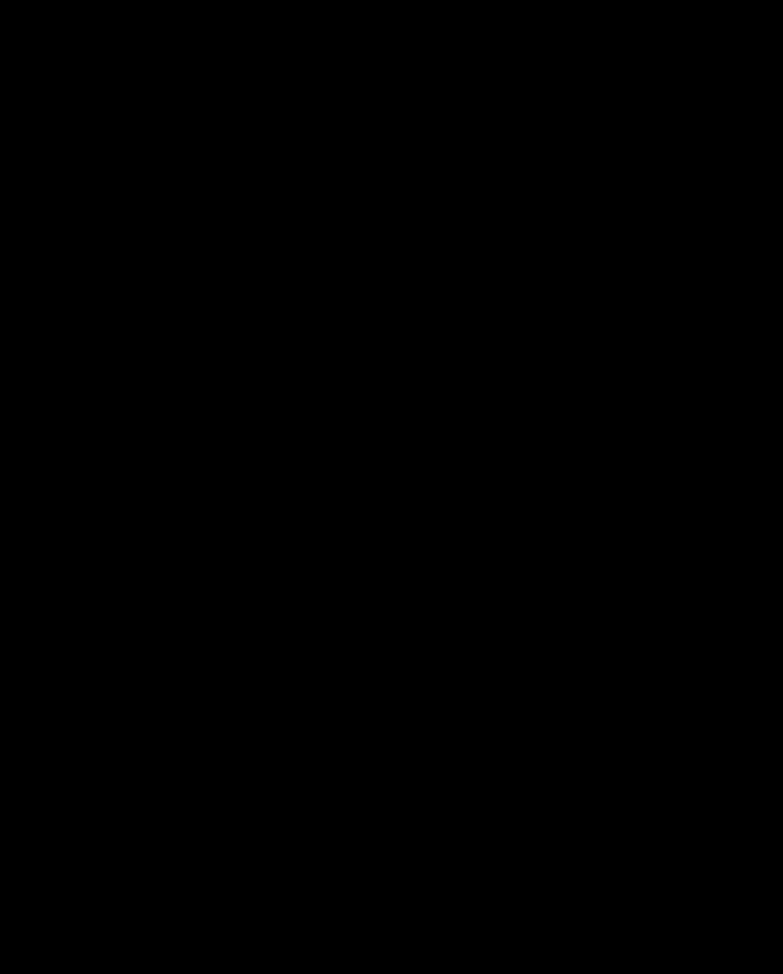

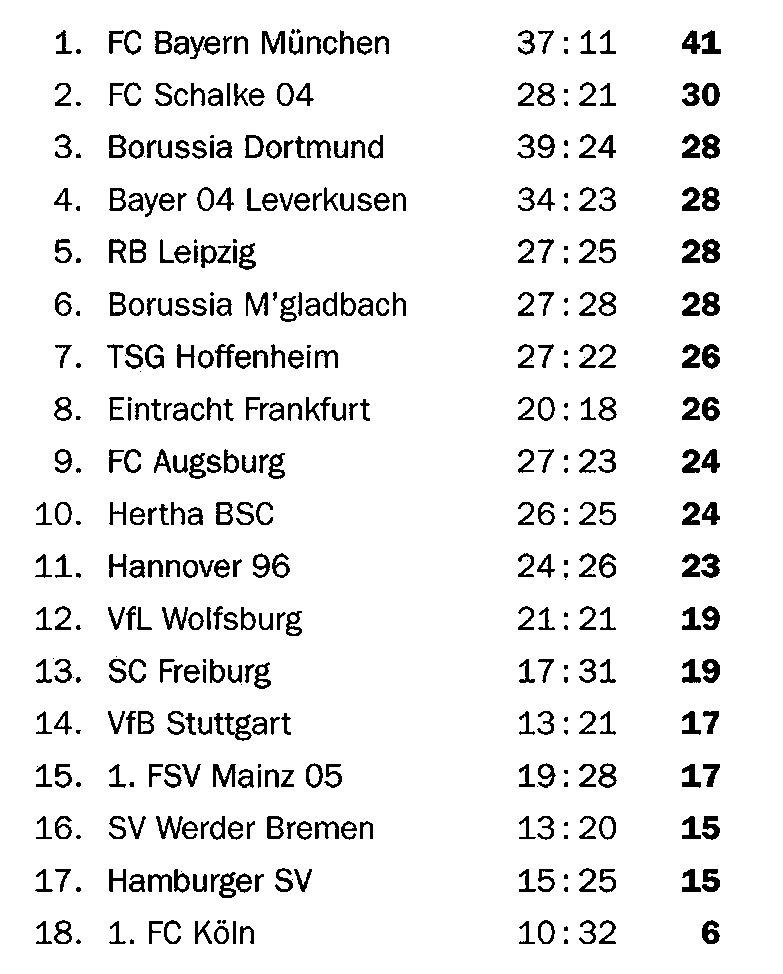

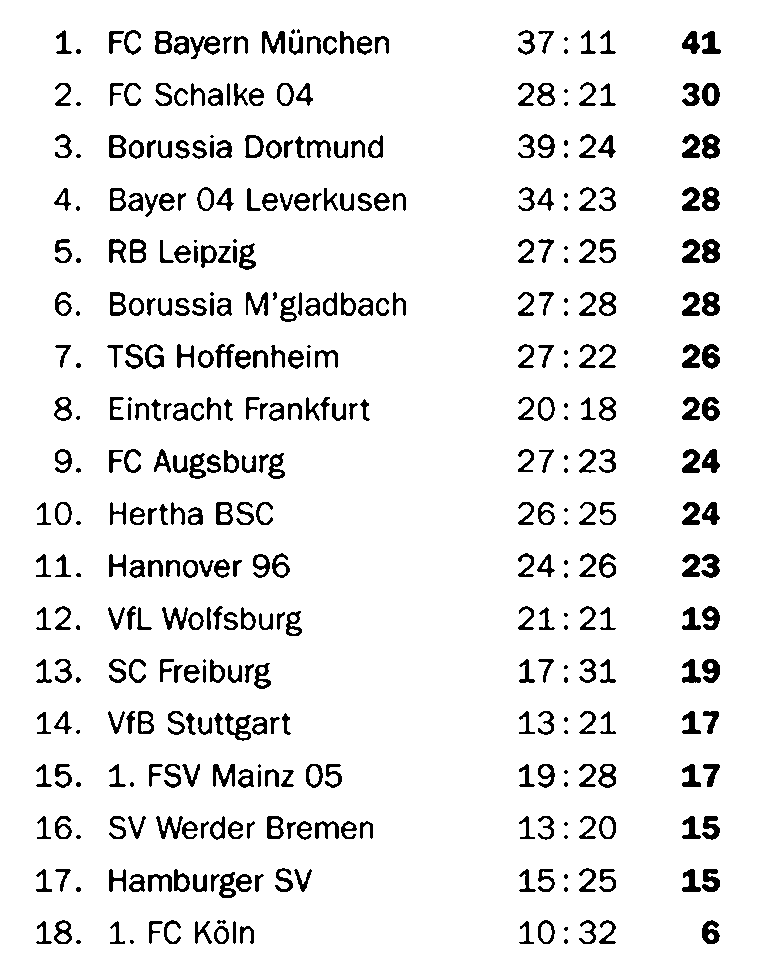

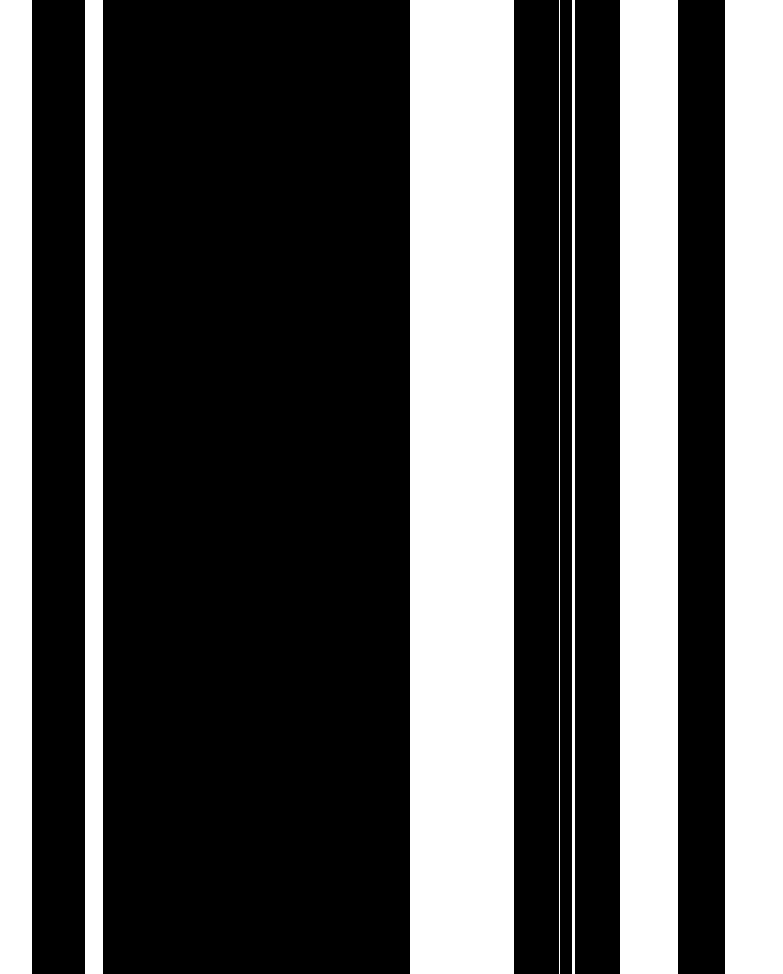

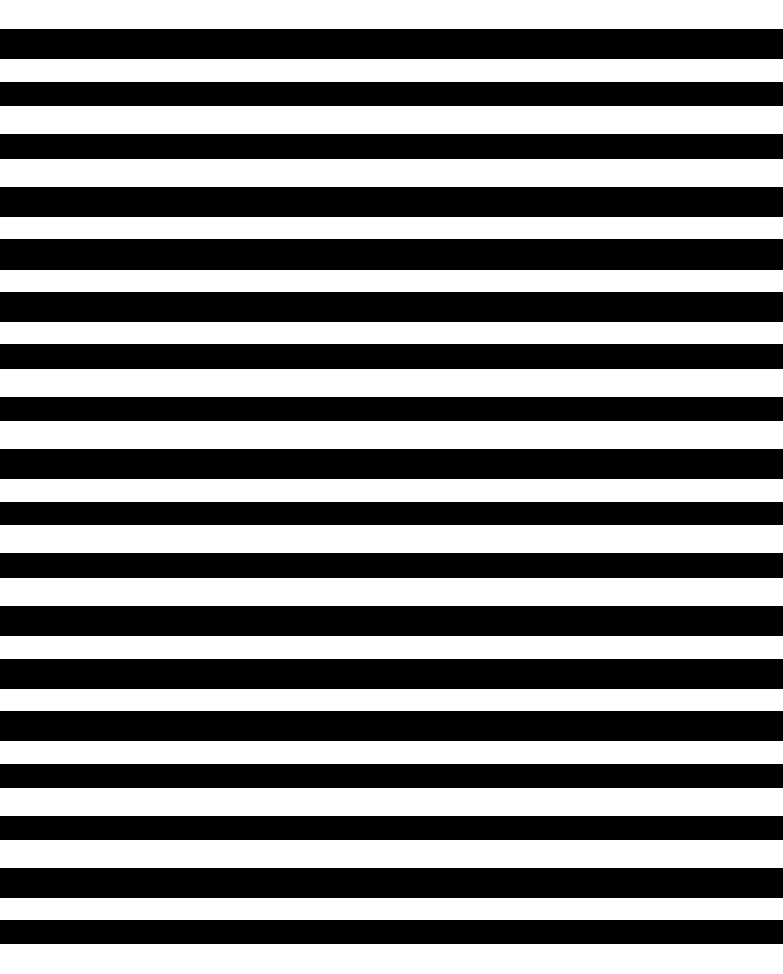

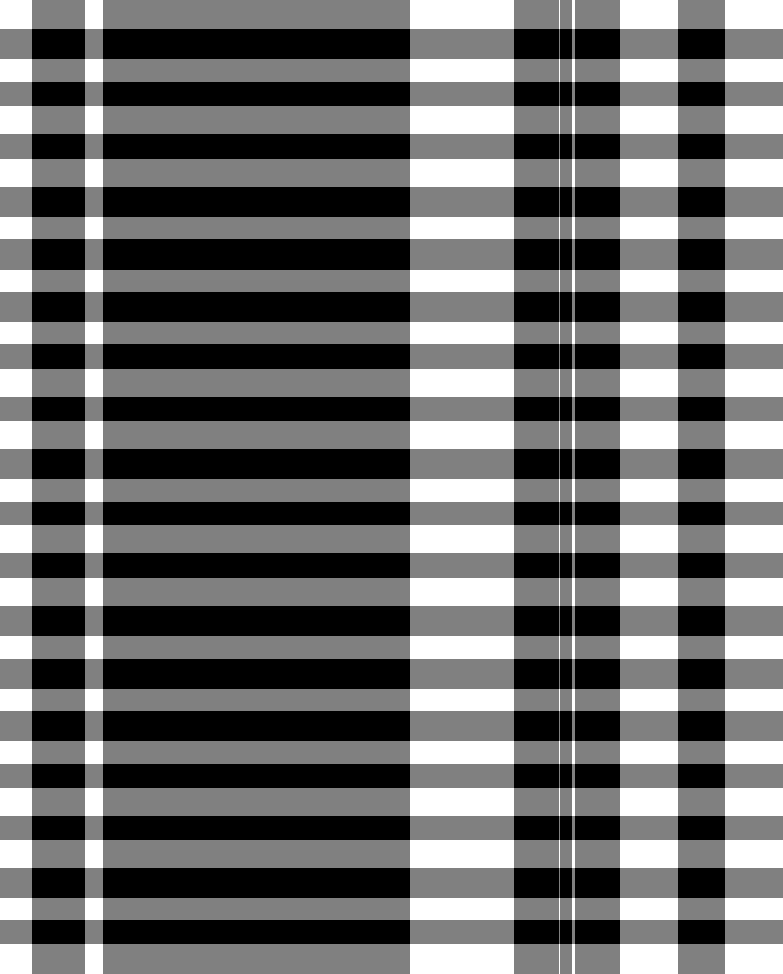

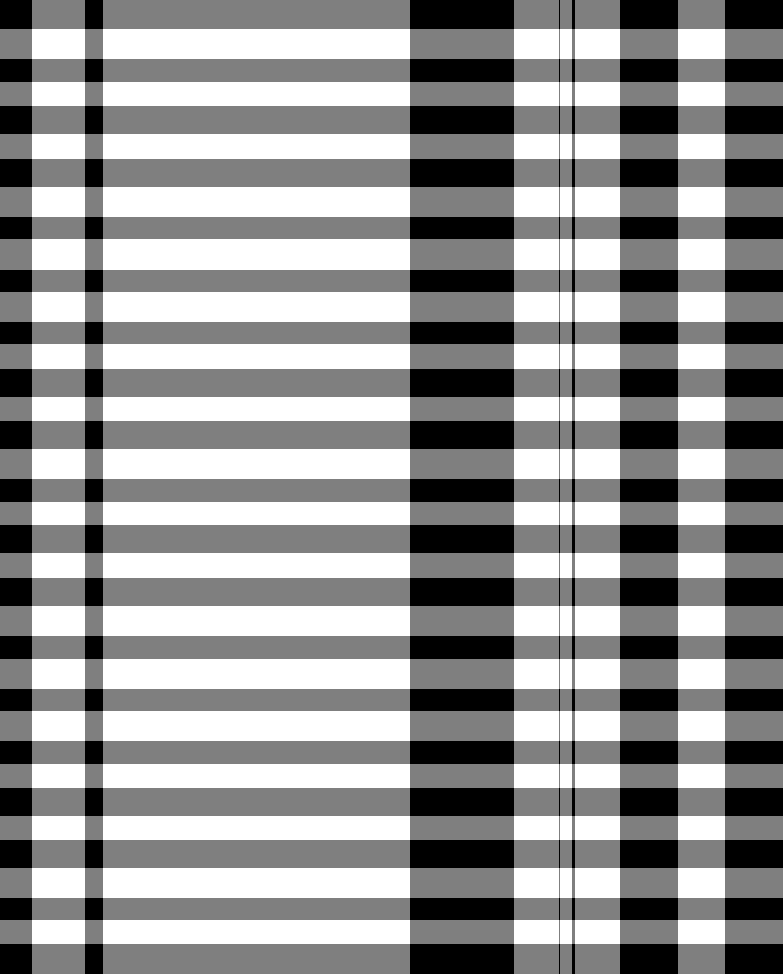

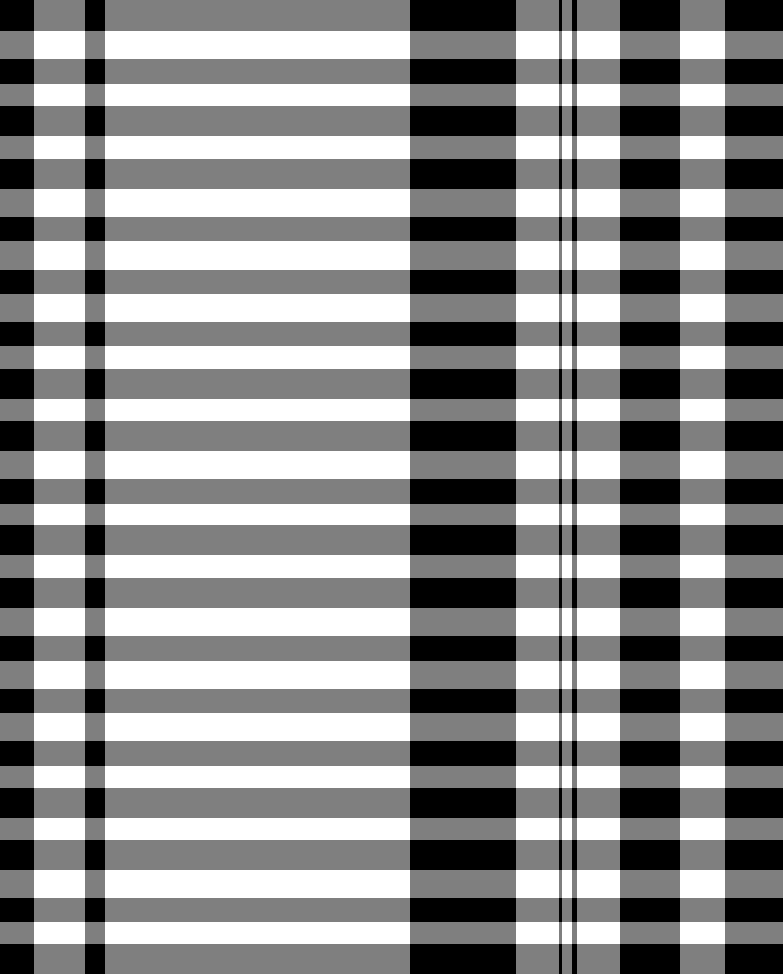

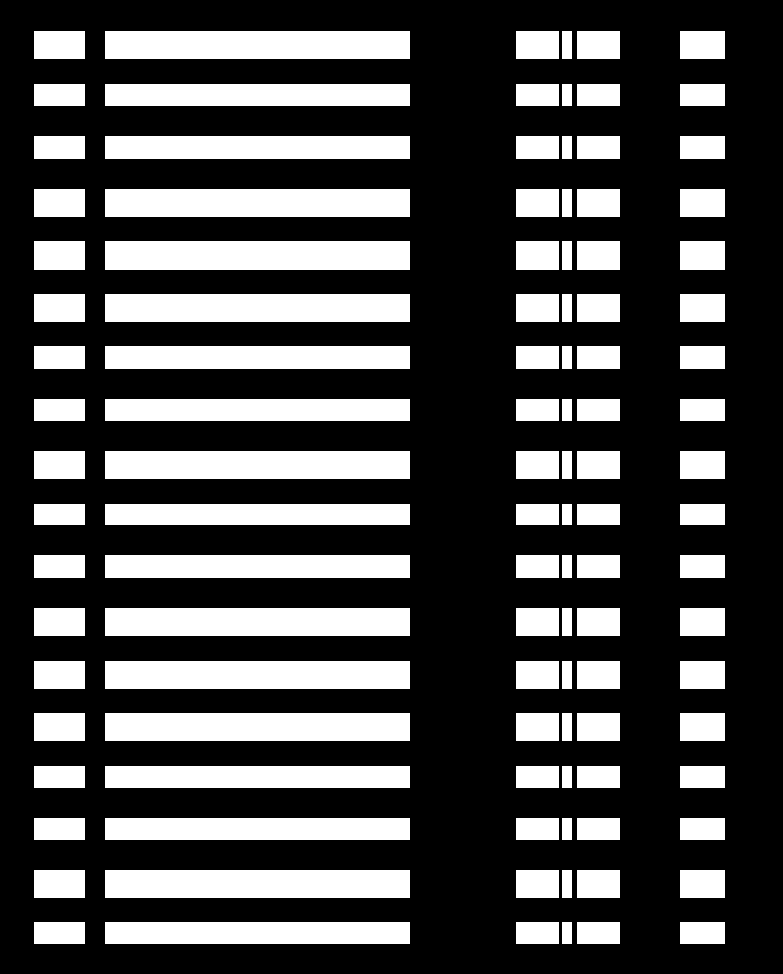

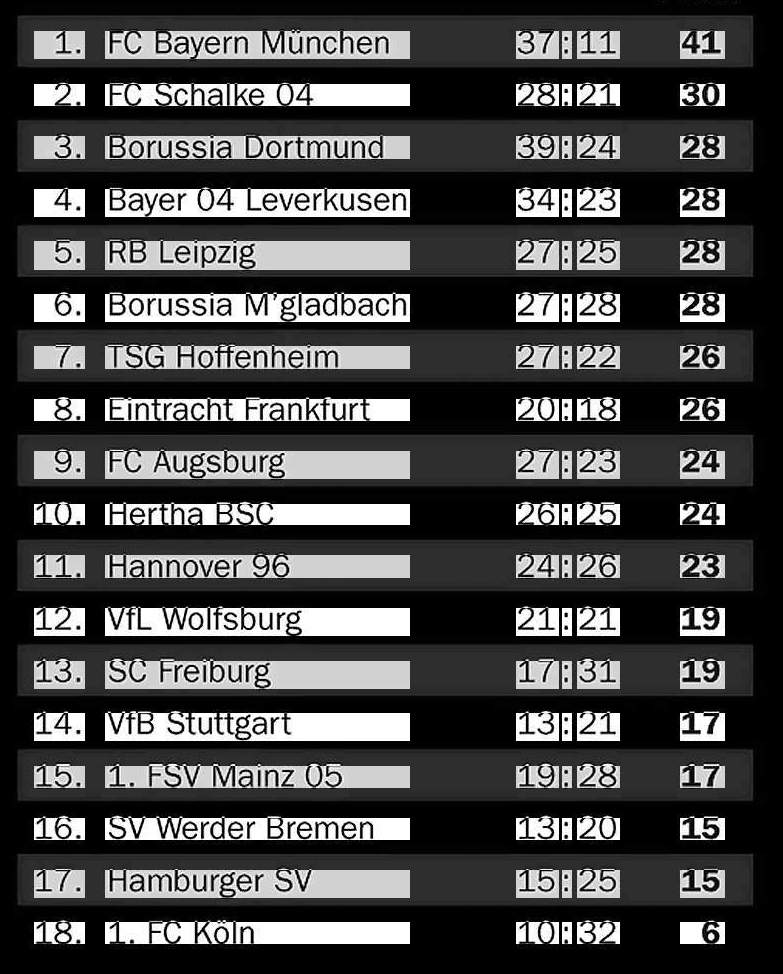

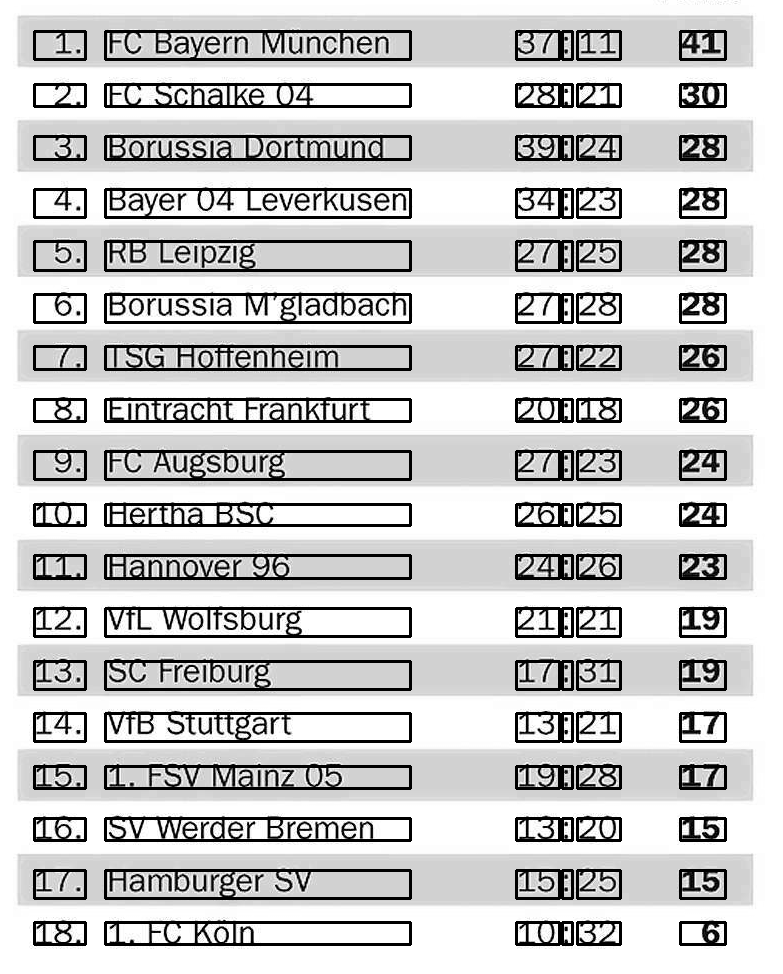

In [ ]:
document_example = cv2.imread("/content/Multi_Type_TD_TSR/images/example.jpg")

table_list, table_coords = table_detection.make_prediction(document_example, predictor)

for table in table_list:
    finalboxes, output_img = tsrlwol.recognize_structure(table)
    list_table_boxes.append(finalboxes)

#Additional Feature: OCR with PyTesserect (Output in CSV)

In [3]:
tocr.output_to_csv(list_table_boxes[0], output_img)

               0  ...            7
0    Consultant;  ...   Tech Alive
1                 ...   LOR UPL Ad
2                 ...             
3                 ...    aTelel RS
4                 ...        hours
5                 ...        hours
6                 ...        hours
7                 ...        hours
8                 ...        hours
9                 ...             
10                ...    aTelel RS

[11 rows x 8 columns]
